In [48]:
import torch
import torchvision
import os
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [86]:
root = './dataset/1'
os.listdir(root)

['input (31) resized.png',
 'input (32) resized.png',
 'input (23) resized.png',
 'input (6) resized.png',
 'input (29) resized.png',
 'input (26) resized.png',
 'input (3) resized.png',
 'input (9) resized.png',
 'input (1) resized.png',
 'input (8) resized.png',
 'input (33) resized.png',
 'input (11) resized.png',
 'input (21) resized.png',
 'input (28) resized.png',
 'input (30) resized.png',
 'input (5) resized.png',
 'input (22) resized.png',
 'input (7) resized.png',
 'input (2) resized.png',
 'input (27) resized.png',
 'input (20) resized.png',
 'input (15) resized.png',
 'input (24) resized.png',
 'input (10) resized.png',
 'input (19) resized.png',
 'input (4) resized.png',
 'input (16) resized.png',
 'input (25) resized.png',
 'input (12) resized.png',
 'input (13) resized.png',
 'input (17) resized.png',
 'input (18) resized.png',
 'input (14) resized.png']

In [94]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), 
])
transform

Compose(
    Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [95]:
train_ds = torchvision.datasets.ImageFolder('./dataset', transform=transform)

In [96]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=4)

In [97]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


# Data Visualization

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8,1))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis(False)
    plt.show()
    
dataiter = iter(train_dl)
images, labels = dataiter.next()

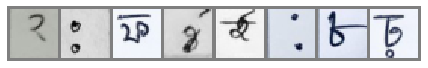

In [100]:
collage = torchvision.utils.make_grid(images)
imshow(collage)
# print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [101]:
## Need to change this appropriately
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=32, kernel_size=5)
        self.fc1 = nn.Linear(in_features=32*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=81)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*5*5)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [102]:

model = Net()
model.to(device)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=81, bias=True)
)

In [103]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
epochs = 30

In [108]:
def fit (epochs, model, train_dl, loss_func, optimizer):
    for epoch in range(epochs):         #One epoch runs over the whole image set
        running_loss = 0.0
        for i, data in enumerate(train_dl, start=0):
            xb, yb = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()

            # Forward  + backward + optimize
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optimizer.step()

            #print statistics
            running_loss += loss.item()
            print('[Epoch: %d, Batch: %5d]  average loss: %.3f' %(epoch, i+1, loss.item()/8))

    print('Finished Training :) ')

In [110]:
fit (100, model, train_dl, loss_func, optimizer)

[Epoch: 0, Batch:     1] loss: 0.553
[Epoch: 0, Batch:     2] loss: 0.552
[Epoch: 0, Batch:     3] loss: 0.550
[Epoch: 0, Batch:     4] loss: 0.550
[Epoch: 0, Batch:     5] loss: 0.550
[Epoch: 0, Batch:     6] loss: 0.546
[Epoch: 0, Batch:     7] loss: 0.548
[Epoch: 0, Batch:     8] loss: 0.552
[Epoch: 0, Batch:     9] loss: 0.548
[Epoch: 0, Batch:    10] loss: 0.545
[Epoch: 0, Batch:    11] loss: 0.549
[Epoch: 0, Batch:    12] loss: 0.545
[Epoch: 0, Batch:    13] loss: 0.550
[Epoch: 0, Batch:    14] loss: 0.544
[Epoch: 0, Batch:    15] loss: 0.552
[Epoch: 0, Batch:    16] loss: 0.547
[Epoch: 0, Batch:    17] loss: 0.550
[Epoch: 0, Batch:    18] loss: 0.551
[Epoch: 0, Batch:    19] loss: 0.545
[Epoch: 0, Batch:    20] loss: 0.549
[Epoch: 0, Batch:    21] loss: 0.551
[Epoch: 0, Batch:    22] loss: 0.545
[Epoch: 0, Batch:    23] loss: 0.548
[Epoch: 0, Batch:    24] loss: 0.544
[Epoch: 0, Batch:    25] loss: 0.548
[Epoch: 0, Batch:    26] loss: 0.551
[Epoch: 0, Batch:    27] loss: 0.549
[

[Epoch: 0, Batch:   237] loss: 0.553
[Epoch: 0, Batch:   238] loss: 0.547
[Epoch: 0, Batch:   239] loss: 0.548
[Epoch: 0, Batch:   240] loss: 0.550
[Epoch: 0, Batch:   241] loss: 0.551
[Epoch: 0, Batch:   242] loss: 0.545
[Epoch: 0, Batch:   243] loss: 0.547
[Epoch: 0, Batch:   244] loss: 0.549
[Epoch: 0, Batch:   245] loss: 0.549
[Epoch: 0, Batch:   246] loss: 0.553
[Epoch: 0, Batch:   247] loss: 0.546
[Epoch: 0, Batch:   248] loss: 0.547
[Epoch: 0, Batch:   249] loss: 0.548
[Epoch: 0, Batch:   250] loss: 0.545
[Epoch: 0, Batch:   251] loss: 0.552
[Epoch: 0, Batch:   252] loss: 0.546
[Epoch: 0, Batch:   253] loss: 0.549
[Epoch: 0, Batch:   254] loss: 0.551
[Epoch: 0, Batch:   255] loss: 0.547
[Epoch: 0, Batch:   256] loss: 0.547
[Epoch: 0, Batch:   257] loss: 0.548
[Epoch: 0, Batch:   258] loss: 0.549
[Epoch: 0, Batch:   259] loss: 0.547
[Epoch: 0, Batch:   260] loss: 0.546
[Epoch: 0, Batch:   261] loss: 0.554
[Epoch: 0, Batch:   262] loss: 0.552
[Epoch: 0, Batch:   263] loss: 0.550
[

[Epoch: 1, Batch:   142] loss: 0.546
[Epoch: 1, Batch:   143] loss: 0.546
[Epoch: 1, Batch:   144] loss: 0.549
[Epoch: 1, Batch:   145] loss: 0.549
[Epoch: 1, Batch:   146] loss: 0.544
[Epoch: 1, Batch:   147] loss: 0.548
[Epoch: 1, Batch:   148] loss: 0.549
[Epoch: 1, Batch:   149] loss: 0.550
[Epoch: 1, Batch:   150] loss: 0.546
[Epoch: 1, Batch:   151] loss: 0.547
[Epoch: 1, Batch:   152] loss: 0.552
[Epoch: 1, Batch:   153] loss: 0.543
[Epoch: 1, Batch:   154] loss: 0.547
[Epoch: 1, Batch:   155] loss: 0.547
[Epoch: 1, Batch:   156] loss: 0.547
[Epoch: 1, Batch:   157] loss: 0.546
[Epoch: 1, Batch:   158] loss: 0.547
[Epoch: 1, Batch:   159] loss: 0.549
[Epoch: 1, Batch:   160] loss: 0.545
[Epoch: 1, Batch:   161] loss: 0.550
[Epoch: 1, Batch:   162] loss: 0.549
[Epoch: 1, Batch:   163] loss: 0.544
[Epoch: 1, Batch:   164] loss: 0.549
[Epoch: 1, Batch:   165] loss: 0.548
[Epoch: 1, Batch:   166] loss: 0.543
[Epoch: 1, Batch:   167] loss: 0.554
[Epoch: 1, Batch:   168] loss: 0.551
[

[Epoch: 2, Batch:    34] loss: 0.545
[Epoch: 2, Batch:    35] loss: 0.545
[Epoch: 2, Batch:    36] loss: 0.542
[Epoch: 2, Batch:    37] loss: 0.547
[Epoch: 2, Batch:    38] loss: 0.537
[Epoch: 2, Batch:    39] loss: 0.541
[Epoch: 2, Batch:    40] loss: 0.543
[Epoch: 2, Batch:    41] loss: 0.543
[Epoch: 2, Batch:    42] loss: 0.544
[Epoch: 2, Batch:    43] loss: 0.540
[Epoch: 2, Batch:    44] loss: 0.549
[Epoch: 2, Batch:    45] loss: 0.544
[Epoch: 2, Batch:    46] loss: 0.545
[Epoch: 2, Batch:    47] loss: 0.540
[Epoch: 2, Batch:    48] loss: 0.548
[Epoch: 2, Batch:    49] loss: 0.551
[Epoch: 2, Batch:    50] loss: 0.548
[Epoch: 2, Batch:    51] loss: 0.545
[Epoch: 2, Batch:    52] loss: 0.545
[Epoch: 2, Batch:    53] loss: 0.543
[Epoch: 2, Batch:    54] loss: 0.546
[Epoch: 2, Batch:    55] loss: 0.548
[Epoch: 2, Batch:    56] loss: 0.549
[Epoch: 2, Batch:    57] loss: 0.541
[Epoch: 2, Batch:    58] loss: 0.536
[Epoch: 2, Batch:    59] loss: 0.541
[Epoch: 2, Batch:    60] loss: 0.539
[

[Epoch: 2, Batch:   270] loss: 0.535
[Epoch: 2, Batch:   271] loss: 0.545
[Epoch: 2, Batch:   272] loss: 0.537
[Epoch: 2, Batch:   273] loss: 0.544
[Epoch: 2, Batch:   274] loss: 0.542
[Epoch: 2, Batch:   275] loss: 0.544
[Epoch: 2, Batch:   276] loss: 0.542
[Epoch: 2, Batch:   277] loss: 0.529
[Epoch: 2, Batch:   278] loss: 0.540
[Epoch: 2, Batch:   279] loss: 0.549
[Epoch: 2, Batch:   280] loss: 0.530
[Epoch: 2, Batch:   281] loss: 0.543
[Epoch: 2, Batch:   282] loss: 0.538
[Epoch: 2, Batch:   283] loss: 0.542
[Epoch: 2, Batch:   284] loss: 0.531
[Epoch: 2, Batch:   285] loss: 0.542
[Epoch: 2, Batch:   286] loss: 0.537
[Epoch: 2, Batch:   287] loss: 0.541
[Epoch: 2, Batch:   288] loss: 0.543
[Epoch: 2, Batch:   289] loss: 0.538
[Epoch: 2, Batch:   290] loss: 0.553
[Epoch: 2, Batch:   291] loss: 0.547
[Epoch: 2, Batch:   292] loss: 0.542
[Epoch: 2, Batch:   293] loss: 0.527
[Epoch: 2, Batch:   294] loss: 0.543
[Epoch: 2, Batch:   295] loss: 0.537
[Epoch: 2, Batch:   296] loss: 0.529
[

[Epoch: 3, Batch:   164] loss: 0.489
[Epoch: 3, Batch:   165] loss: 0.531
[Epoch: 3, Batch:   166] loss: 0.518
[Epoch: 3, Batch:   167] loss: 0.525
[Epoch: 3, Batch:   168] loss: 0.536
[Epoch: 3, Batch:   169] loss: 0.518
[Epoch: 3, Batch:   170] loss: 0.528
[Epoch: 3, Batch:   171] loss: 0.524
[Epoch: 3, Batch:   172] loss: 0.540
[Epoch: 3, Batch:   173] loss: 0.502
[Epoch: 3, Batch:   174] loss: 0.541
[Epoch: 3, Batch:   175] loss: 0.515
[Epoch: 3, Batch:   176] loss: 0.543
[Epoch: 3, Batch:   177] loss: 0.527
[Epoch: 3, Batch:   178] loss: 0.491
[Epoch: 3, Batch:   179] loss: 0.516
[Epoch: 3, Batch:   180] loss: 0.528
[Epoch: 3, Batch:   181] loss: 0.527
[Epoch: 3, Batch:   182] loss: 0.522
[Epoch: 3, Batch:   183] loss: 0.523
[Epoch: 3, Batch:   184] loss: 0.491
[Epoch: 3, Batch:   185] loss: 0.519
[Epoch: 3, Batch:   186] loss: 0.516
[Epoch: 3, Batch:   187] loss: 0.536
[Epoch: 3, Batch:   188] loss: 0.533
[Epoch: 3, Batch:   189] loss: 0.524
[Epoch: 3, Batch:   190] loss: 0.494
[

[Epoch: 4, Batch:    91] loss: 0.478
[Epoch: 4, Batch:    92] loss: 0.448
[Epoch: 4, Batch:    93] loss: 0.507
[Epoch: 4, Batch:    94] loss: 0.535
[Epoch: 4, Batch:    95] loss: 0.503
[Epoch: 4, Batch:    96] loss: 0.484
[Epoch: 4, Batch:    97] loss: 0.492
[Epoch: 4, Batch:    98] loss: 0.512
[Epoch: 4, Batch:    99] loss: 0.519
[Epoch: 4, Batch:   100] loss: 0.463
[Epoch: 4, Batch:   101] loss: 0.546
[Epoch: 4, Batch:   102] loss: 0.524
[Epoch: 4, Batch:   103] loss: 0.484
[Epoch: 4, Batch:   104] loss: 0.523
[Epoch: 4, Batch:   105] loss: 0.521
[Epoch: 4, Batch:   106] loss: 0.493
[Epoch: 4, Batch:   107] loss: 0.491
[Epoch: 4, Batch:   108] loss: 0.514
[Epoch: 4, Batch:   109] loss: 0.468
[Epoch: 4, Batch:   110] loss: 0.484
[Epoch: 4, Batch:   111] loss: 0.504
[Epoch: 4, Batch:   112] loss: 0.499
[Epoch: 4, Batch:   113] loss: 0.528
[Epoch: 4, Batch:   114] loss: 0.464
[Epoch: 4, Batch:   115] loss: 0.493
[Epoch: 4, Batch:   116] loss: 0.450
[Epoch: 4, Batch:   117] loss: 0.484
[

[Epoch: 4, Batch:   324] loss: 0.511
[Epoch: 4, Batch:   325] loss: 0.503
[Epoch: 4, Batch:   326] loss: 0.448
[Epoch: 4, Batch:   327] loss: 0.442
[Epoch: 4, Batch:   328] loss: 0.484
[Epoch: 4, Batch:   329] loss: 0.457
[Epoch: 4, Batch:   330] loss: 0.461
[Epoch: 4, Batch:   331] loss: 0.442
[Epoch: 4, Batch:   332] loss: 0.500
[Epoch: 4, Batch:   333] loss: 0.532
[Epoch: 4, Batch:   334] loss: 0.465
[Epoch: 4, Batch:   335] loss: 0.538
[Epoch: 5, Batch:     1] loss: 0.492
[Epoch: 5, Batch:     2] loss: 0.452
[Epoch: 5, Batch:     3] loss: 0.488
[Epoch: 5, Batch:     4] loss: 0.569
[Epoch: 5, Batch:     5] loss: 0.458
[Epoch: 5, Batch:     6] loss: 0.444
[Epoch: 5, Batch:     7] loss: 0.482
[Epoch: 5, Batch:     8] loss: 0.449
[Epoch: 5, Batch:     9] loss: 0.511
[Epoch: 5, Batch:    10] loss: 0.501
[Epoch: 5, Batch:    11] loss: 0.492
[Epoch: 5, Batch:    12] loss: 0.533
[Epoch: 5, Batch:    13] loss: 0.483
[Epoch: 5, Batch:    14] loss: 0.452
[Epoch: 5, Batch:    15] loss: 0.422
[

[Epoch: 5, Batch:   235] loss: 0.498
[Epoch: 5, Batch:   236] loss: 0.539
[Epoch: 5, Batch:   237] loss: 0.493
[Epoch: 5, Batch:   238] loss: 0.604
[Epoch: 5, Batch:   239] loss: 0.536
[Epoch: 5, Batch:   240] loss: 0.482
[Epoch: 5, Batch:   241] loss: 0.472
[Epoch: 5, Batch:   242] loss: 0.525
[Epoch: 5, Batch:   243] loss: 0.517
[Epoch: 5, Batch:   244] loss: 0.481
[Epoch: 5, Batch:   245] loss: 0.500
[Epoch: 5, Batch:   246] loss: 0.472
[Epoch: 5, Batch:   247] loss: 0.442
[Epoch: 5, Batch:   248] loss: 0.481
[Epoch: 5, Batch:   249] loss: 0.469
[Epoch: 5, Batch:   250] loss: 0.478
[Epoch: 5, Batch:   251] loss: 0.488
[Epoch: 5, Batch:   252] loss: 0.478
[Epoch: 5, Batch:   253] loss: 0.438
[Epoch: 5, Batch:   254] loss: 0.439
[Epoch: 5, Batch:   255] loss: 0.424
[Epoch: 5, Batch:   256] loss: 0.397
[Epoch: 5, Batch:   257] loss: 0.423
[Epoch: 5, Batch:   258] loss: 0.453
[Epoch: 5, Batch:   259] loss: 0.537
[Epoch: 5, Batch:   260] loss: 0.484
[Epoch: 5, Batch:   261] loss: 0.513
[

[Epoch: 6, Batch:   129] loss: 0.368
[Epoch: 6, Batch:   130] loss: 0.453
[Epoch: 6, Batch:   131] loss: 0.432
[Epoch: 6, Batch:   132] loss: 0.552
[Epoch: 6, Batch:   133] loss: 0.390
[Epoch: 6, Batch:   134] loss: 0.377
[Epoch: 6, Batch:   135] loss: 0.412
[Epoch: 6, Batch:   136] loss: 0.451
[Epoch: 6, Batch:   137] loss: 0.480
[Epoch: 6, Batch:   138] loss: 0.512
[Epoch: 6, Batch:   139] loss: 0.523
[Epoch: 6, Batch:   140] loss: 0.454
[Epoch: 6, Batch:   141] loss: 0.446
[Epoch: 6, Batch:   142] loss: 0.498
[Epoch: 6, Batch:   143] loss: 0.513
[Epoch: 6, Batch:   144] loss: 0.533
[Epoch: 6, Batch:   145] loss: 0.392
[Epoch: 6, Batch:   146] loss: 0.504
[Epoch: 6, Batch:   147] loss: 0.345
[Epoch: 6, Batch:   148] loss: 0.416
[Epoch: 6, Batch:   149] loss: 0.534
[Epoch: 6, Batch:   150] loss: 0.389
[Epoch: 6, Batch:   151] loss: 0.390
[Epoch: 6, Batch:   152] loss: 0.477
[Epoch: 6, Batch:   153] loss: 0.482
[Epoch: 6, Batch:   154] loss: 0.438
[Epoch: 6, Batch:   155] loss: 0.507
[

[Epoch: 7, Batch:    41] loss: 0.477
[Epoch: 7, Batch:    42] loss: 0.454
[Epoch: 7, Batch:    43] loss: 0.407
[Epoch: 7, Batch:    44] loss: 0.462
[Epoch: 7, Batch:    45] loss: 0.389
[Epoch: 7, Batch:    46] loss: 0.439
[Epoch: 7, Batch:    47] loss: 0.459
[Epoch: 7, Batch:    48] loss: 0.428
[Epoch: 7, Batch:    49] loss: 0.399
[Epoch: 7, Batch:    50] loss: 0.353
[Epoch: 7, Batch:    51] loss: 0.387
[Epoch: 7, Batch:    52] loss: 0.401
[Epoch: 7, Batch:    53] loss: 0.510
[Epoch: 7, Batch:    54] loss: 0.452
[Epoch: 7, Batch:    55] loss: 0.470
[Epoch: 7, Batch:    56] loss: 0.452
[Epoch: 7, Batch:    57] loss: 0.448
[Epoch: 7, Batch:    58] loss: 0.446
[Epoch: 7, Batch:    59] loss: 0.537
[Epoch: 7, Batch:    60] loss: 0.470
[Epoch: 7, Batch:    61] loss: 0.449
[Epoch: 7, Batch:    62] loss: 0.463
[Epoch: 7, Batch:    63] loss: 0.482
[Epoch: 7, Batch:    64] loss: 0.394
[Epoch: 7, Batch:    65] loss: 0.352
[Epoch: 7, Batch:    66] loss: 0.383
[Epoch: 7, Batch:    67] loss: 0.439
[

[Epoch: 7, Batch:   289] loss: 0.395
[Epoch: 7, Batch:   290] loss: 0.472
[Epoch: 7, Batch:   291] loss: 0.477
[Epoch: 7, Batch:   292] loss: 0.479
[Epoch: 7, Batch:   293] loss: 0.426
[Epoch: 7, Batch:   294] loss: 0.374
[Epoch: 7, Batch:   295] loss: 0.423
[Epoch: 7, Batch:   296] loss: 0.378
[Epoch: 7, Batch:   297] loss: 0.385
[Epoch: 7, Batch:   298] loss: 0.438
[Epoch: 7, Batch:   299] loss: 0.465
[Epoch: 7, Batch:   300] loss: 0.470
[Epoch: 7, Batch:   301] loss: 0.509
[Epoch: 7, Batch:   302] loss: 0.422
[Epoch: 7, Batch:   303] loss: 0.419
[Epoch: 7, Batch:   304] loss: 0.359
[Epoch: 7, Batch:   305] loss: 0.436
[Epoch: 7, Batch:   306] loss: 0.451
[Epoch: 7, Batch:   307] loss: 0.507
[Epoch: 7, Batch:   308] loss: 0.463
[Epoch: 7, Batch:   309] loss: 0.404
[Epoch: 7, Batch:   310] loss: 0.420
[Epoch: 7, Batch:   311] loss: 0.487
[Epoch: 7, Batch:   312] loss: 0.333
[Epoch: 7, Batch:   313] loss: 0.558
[Epoch: 7, Batch:   314] loss: 0.484
[Epoch: 7, Batch:   315] loss: 0.466
[

[Epoch: 8, Batch:   177] loss: 0.317
[Epoch: 8, Batch:   178] loss: 0.429
[Epoch: 8, Batch:   179] loss: 0.399
[Epoch: 8, Batch:   180] loss: 0.412
[Epoch: 8, Batch:   181] loss: 0.379
[Epoch: 8, Batch:   182] loss: 0.389
[Epoch: 8, Batch:   183] loss: 0.440
[Epoch: 8, Batch:   184] loss: 0.441
[Epoch: 8, Batch:   185] loss: 0.345
[Epoch: 8, Batch:   186] loss: 0.407
[Epoch: 8, Batch:   187] loss: 0.358
[Epoch: 8, Batch:   188] loss: 0.326
[Epoch: 8, Batch:   189] loss: 0.421
[Epoch: 8, Batch:   190] loss: 0.340
[Epoch: 8, Batch:   191] loss: 0.283
[Epoch: 8, Batch:   192] loss: 0.536
[Epoch: 8, Batch:   193] loss: 0.327
[Epoch: 8, Batch:   194] loss: 0.360
[Epoch: 8, Batch:   195] loss: 0.403
[Epoch: 8, Batch:   196] loss: 0.317
[Epoch: 8, Batch:   197] loss: 0.388
[Epoch: 8, Batch:   198] loss: 0.433
[Epoch: 8, Batch:   199] loss: 0.369
[Epoch: 8, Batch:   200] loss: 0.396
[Epoch: 8, Batch:   201] loss: 0.364
[Epoch: 8, Batch:   202] loss: 0.461
[Epoch: 8, Batch:   203] loss: 0.378
[

[Epoch: 9, Batch:    88] loss: 0.362
[Epoch: 9, Batch:    89] loss: 0.310
[Epoch: 9, Batch:    90] loss: 0.329
[Epoch: 9, Batch:    91] loss: 0.352
[Epoch: 9, Batch:    92] loss: 0.514
[Epoch: 9, Batch:    93] loss: 0.425
[Epoch: 9, Batch:    94] loss: 0.380
[Epoch: 9, Batch:    95] loss: 0.293
[Epoch: 9, Batch:    96] loss: 0.542
[Epoch: 9, Batch:    97] loss: 0.369
[Epoch: 9, Batch:    98] loss: 0.444
[Epoch: 9, Batch:    99] loss: 0.289
[Epoch: 9, Batch:   100] loss: 0.352
[Epoch: 9, Batch:   101] loss: 0.275
[Epoch: 9, Batch:   102] loss: 0.413
[Epoch: 9, Batch:   103] loss: 0.380
[Epoch: 9, Batch:   104] loss: 0.222
[Epoch: 9, Batch:   105] loss: 0.321
[Epoch: 9, Batch:   106] loss: 0.343
[Epoch: 9, Batch:   107] loss: 0.350
[Epoch: 9, Batch:   108] loss: 0.337
[Epoch: 9, Batch:   109] loss: 0.428
[Epoch: 9, Batch:   110] loss: 0.349
[Epoch: 9, Batch:   111] loss: 0.481
[Epoch: 9, Batch:   112] loss: 0.392
[Epoch: 9, Batch:   113] loss: 0.414
[Epoch: 9, Batch:   114] loss: 0.390
[

[Epoch: 9, Batch:   330] loss: 0.361
[Epoch: 9, Batch:   331] loss: 0.458
[Epoch: 9, Batch:   332] loss: 0.300
[Epoch: 9, Batch:   333] loss: 0.364
[Epoch: 9, Batch:   334] loss: 0.316
[Epoch: 9, Batch:   335] loss: 0.392
[Epoch: 10, Batch:     1] loss: 0.406
[Epoch: 10, Batch:     2] loss: 0.365
[Epoch: 10, Batch:     3] loss: 0.315
[Epoch: 10, Batch:     4] loss: 0.345
[Epoch: 10, Batch:     5] loss: 0.325
[Epoch: 10, Batch:     6] loss: 0.328
[Epoch: 10, Batch:     7] loss: 0.261
[Epoch: 10, Batch:     8] loss: 0.502
[Epoch: 10, Batch:     9] loss: 0.313
[Epoch: 10, Batch:    10] loss: 0.307
[Epoch: 10, Batch:    11] loss: 0.365
[Epoch: 10, Batch:    12] loss: 0.341
[Epoch: 10, Batch:    13] loss: 0.365
[Epoch: 10, Batch:    14] loss: 0.243
[Epoch: 10, Batch:    15] loss: 0.392
[Epoch: 10, Batch:    16] loss: 0.283
[Epoch: 10, Batch:    17] loss: 0.471
[Epoch: 10, Batch:    18] loss: 0.430
[Epoch: 10, Batch:    19] loss: 0.330
[Epoch: 10, Batch:    20] loss: 0.332
[Epoch: 10, Batch:

[Epoch: 10, Batch:   212] loss: 0.301
[Epoch: 10, Batch:   213] loss: 0.335
[Epoch: 10, Batch:   214] loss: 0.326
[Epoch: 10, Batch:   215] loss: 0.269
[Epoch: 10, Batch:   216] loss: 0.369
[Epoch: 10, Batch:   217] loss: 0.348
[Epoch: 10, Batch:   218] loss: 0.414
[Epoch: 10, Batch:   219] loss: 0.278
[Epoch: 10, Batch:   220] loss: 0.297
[Epoch: 10, Batch:   221] loss: 0.280
[Epoch: 10, Batch:   222] loss: 0.396
[Epoch: 10, Batch:   223] loss: 0.262
[Epoch: 10, Batch:   224] loss: 0.296
[Epoch: 10, Batch:   225] loss: 0.308
[Epoch: 10, Batch:   226] loss: 0.294
[Epoch: 10, Batch:   227] loss: 0.264
[Epoch: 10, Batch:   228] loss: 0.221
[Epoch: 10, Batch:   229] loss: 0.455
[Epoch: 10, Batch:   230] loss: 0.322
[Epoch: 10, Batch:   231] loss: 0.405
[Epoch: 10, Batch:   232] loss: 0.458
[Epoch: 10, Batch:   233] loss: 0.308
[Epoch: 10, Batch:   234] loss: 0.225
[Epoch: 10, Batch:   235] loss: 0.279
[Epoch: 10, Batch:   236] loss: 0.210
[Epoch: 10, Batch:   237] loss: 0.303
[Epoch: 10, 

[Epoch: 11, Batch:    93] loss: 0.170
[Epoch: 11, Batch:    94] loss: 0.383
[Epoch: 11, Batch:    95] loss: 0.358
[Epoch: 11, Batch:    96] loss: 0.287
[Epoch: 11, Batch:    97] loss: 0.224
[Epoch: 11, Batch:    98] loss: 0.233
[Epoch: 11, Batch:    99] loss: 0.213
[Epoch: 11, Batch:   100] loss: 0.336
[Epoch: 11, Batch:   101] loss: 0.334
[Epoch: 11, Batch:   102] loss: 0.246
[Epoch: 11, Batch:   103] loss: 0.224
[Epoch: 11, Batch:   104] loss: 0.320
[Epoch: 11, Batch:   105] loss: 0.151
[Epoch: 11, Batch:   106] loss: 0.351
[Epoch: 11, Batch:   107] loss: 0.306
[Epoch: 11, Batch:   108] loss: 0.229
[Epoch: 11, Batch:   109] loss: 0.401
[Epoch: 11, Batch:   110] loss: 0.214
[Epoch: 11, Batch:   111] loss: 0.231
[Epoch: 11, Batch:   112] loss: 0.280
[Epoch: 11, Batch:   113] loss: 0.183
[Epoch: 11, Batch:   114] loss: 0.387
[Epoch: 11, Batch:   115] loss: 0.403
[Epoch: 11, Batch:   116] loss: 0.212
[Epoch: 11, Batch:   117] loss: 0.210
[Epoch: 11, Batch:   118] loss: 0.352
[Epoch: 11, 

[Epoch: 12, Batch:     1] loss: 0.197
[Epoch: 12, Batch:     2] loss: 0.281
[Epoch: 12, Batch:     3] loss: 0.218
[Epoch: 12, Batch:     4] loss: 0.231
[Epoch: 12, Batch:     5] loss: 0.158
[Epoch: 12, Batch:     6] loss: 0.293
[Epoch: 12, Batch:     7] loss: 0.214
[Epoch: 12, Batch:     8] loss: 0.317
[Epoch: 12, Batch:     9] loss: 0.350
[Epoch: 12, Batch:    10] loss: 0.291
[Epoch: 12, Batch:    11] loss: 0.325
[Epoch: 12, Batch:    12] loss: 0.341
[Epoch: 12, Batch:    13] loss: 0.217
[Epoch: 12, Batch:    14] loss: 0.270
[Epoch: 12, Batch:    15] loss: 0.268
[Epoch: 12, Batch:    16] loss: 0.211
[Epoch: 12, Batch:    17] loss: 0.256
[Epoch: 12, Batch:    18] loss: 0.190
[Epoch: 12, Batch:    19] loss: 0.300
[Epoch: 12, Batch:    20] loss: 0.195
[Epoch: 12, Batch:    21] loss: 0.265
[Epoch: 12, Batch:    22] loss: 0.387
[Epoch: 12, Batch:    23] loss: 0.228
[Epoch: 12, Batch:    24] loss: 0.325
[Epoch: 12, Batch:    25] loss: 0.284
[Epoch: 12, Batch:    26] loss: 0.089
[Epoch: 12, 

[Epoch: 12, Batch:   233] loss: 0.262
[Epoch: 12, Batch:   234] loss: 0.152
[Epoch: 12, Batch:   235] loss: 0.271
[Epoch: 12, Batch:   236] loss: 0.278
[Epoch: 12, Batch:   237] loss: 0.391
[Epoch: 12, Batch:   238] loss: 0.262
[Epoch: 12, Batch:   239] loss: 0.260
[Epoch: 12, Batch:   240] loss: 0.184
[Epoch: 12, Batch:   241] loss: 0.303
[Epoch: 12, Batch:   242] loss: 0.312
[Epoch: 12, Batch:   243] loss: 0.346
[Epoch: 12, Batch:   244] loss: 0.383
[Epoch: 12, Batch:   245] loss: 0.314
[Epoch: 12, Batch:   246] loss: 0.191
[Epoch: 12, Batch:   247] loss: 0.333
[Epoch: 12, Batch:   248] loss: 0.234
[Epoch: 12, Batch:   249] loss: 0.394
[Epoch: 12, Batch:   250] loss: 0.304
[Epoch: 12, Batch:   251] loss: 0.199
[Epoch: 12, Batch:   252] loss: 0.280
[Epoch: 12, Batch:   253] loss: 0.330
[Epoch: 12, Batch:   254] loss: 0.363
[Epoch: 12, Batch:   255] loss: 0.293
[Epoch: 12, Batch:   256] loss: 0.241
[Epoch: 12, Batch:   257] loss: 0.320
[Epoch: 12, Batch:   258] loss: 0.155
[Epoch: 12, 

[Epoch: 13, Batch:   151] loss: 0.133
[Epoch: 13, Batch:   152] loss: 0.252
[Epoch: 13, Batch:   153] loss: 0.248
[Epoch: 13, Batch:   154] loss: 0.404
[Epoch: 13, Batch:   155] loss: 0.295
[Epoch: 13, Batch:   156] loss: 0.195
[Epoch: 13, Batch:   157] loss: 0.334
[Epoch: 13, Batch:   158] loss: 0.092
[Epoch: 13, Batch:   159] loss: 0.280
[Epoch: 13, Batch:   160] loss: 0.366
[Epoch: 13, Batch:   161] loss: 0.221
[Epoch: 13, Batch:   162] loss: 0.139
[Epoch: 13, Batch:   163] loss: 0.239
[Epoch: 13, Batch:   164] loss: 0.222
[Epoch: 13, Batch:   165] loss: 0.339
[Epoch: 13, Batch:   166] loss: 0.199
[Epoch: 13, Batch:   167] loss: 0.235
[Epoch: 13, Batch:   168] loss: 0.244
[Epoch: 13, Batch:   169] loss: 0.306
[Epoch: 13, Batch:   170] loss: 0.372
[Epoch: 13, Batch:   171] loss: 0.356
[Epoch: 13, Batch:   172] loss: 0.215
[Epoch: 13, Batch:   173] loss: 0.237
[Epoch: 13, Batch:   174] loss: 0.240
[Epoch: 13, Batch:   175] loss: 0.220
[Epoch: 13, Batch:   176] loss: 0.404
[Epoch: 13, 

[Epoch: 14, Batch:    39] loss: 0.271
[Epoch: 14, Batch:    40] loss: 0.263
[Epoch: 14, Batch:    41] loss: 0.167
[Epoch: 14, Batch:    42] loss: 0.194
[Epoch: 14, Batch:    43] loss: 0.222
[Epoch: 14, Batch:    44] loss: 0.339
[Epoch: 14, Batch:    45] loss: 0.143
[Epoch: 14, Batch:    46] loss: 0.200
[Epoch: 14, Batch:    47] loss: 0.297
[Epoch: 14, Batch:    48] loss: 0.171
[Epoch: 14, Batch:    49] loss: 0.332
[Epoch: 14, Batch:    50] loss: 0.117
[Epoch: 14, Batch:    51] loss: 0.286
[Epoch: 14, Batch:    52] loss: 0.121
[Epoch: 14, Batch:    53] loss: 0.471
[Epoch: 14, Batch:    54] loss: 0.196
[Epoch: 14, Batch:    55] loss: 0.164
[Epoch: 14, Batch:    56] loss: 0.330
[Epoch: 14, Batch:    57] loss: 0.198
[Epoch: 14, Batch:    58] loss: 0.220
[Epoch: 14, Batch:    59] loss: 0.293
[Epoch: 14, Batch:    60] loss: 0.238
[Epoch: 14, Batch:    61] loss: 0.246
[Epoch: 14, Batch:    62] loss: 0.188
[Epoch: 14, Batch:    63] loss: 0.179
[Epoch: 14, Batch:    64] loss: 0.184
[Epoch: 14, 

[Epoch: 14, Batch:   276] loss: 0.338
[Epoch: 14, Batch:   277] loss: 0.239
[Epoch: 14, Batch:   278] loss: 0.122
[Epoch: 14, Batch:   279] loss: 0.309
[Epoch: 14, Batch:   280] loss: 0.369
[Epoch: 14, Batch:   281] loss: 0.221
[Epoch: 14, Batch:   282] loss: 0.190
[Epoch: 14, Batch:   283] loss: 0.154
[Epoch: 14, Batch:   284] loss: 0.176
[Epoch: 14, Batch:   285] loss: 0.200
[Epoch: 14, Batch:   286] loss: 0.311
[Epoch: 14, Batch:   287] loss: 0.239
[Epoch: 14, Batch:   288] loss: 0.131
[Epoch: 14, Batch:   289] loss: 0.209
[Epoch: 14, Batch:   290] loss: 0.346
[Epoch: 14, Batch:   291] loss: 0.171
[Epoch: 14, Batch:   292] loss: 0.203
[Epoch: 14, Batch:   293] loss: 0.157
[Epoch: 14, Batch:   294] loss: 0.258
[Epoch: 14, Batch:   295] loss: 0.160
[Epoch: 14, Batch:   296] loss: 0.139
[Epoch: 14, Batch:   297] loss: 0.128
[Epoch: 14, Batch:   298] loss: 0.342
[Epoch: 14, Batch:   299] loss: 0.272
[Epoch: 14, Batch:   300] loss: 0.294
[Epoch: 14, Batch:   301] loss: 0.207
[Epoch: 14, 

[Epoch: 15, Batch:   190] loss: 0.331
[Epoch: 15, Batch:   191] loss: 0.271
[Epoch: 15, Batch:   192] loss: 0.214
[Epoch: 15, Batch:   193] loss: 0.459
[Epoch: 15, Batch:   194] loss: 0.114
[Epoch: 15, Batch:   195] loss: 0.149
[Epoch: 15, Batch:   196] loss: 0.336
[Epoch: 15, Batch:   197] loss: 0.125
[Epoch: 15, Batch:   198] loss: 0.164
[Epoch: 15, Batch:   199] loss: 0.313
[Epoch: 15, Batch:   200] loss: 0.211
[Epoch: 15, Batch:   201] loss: 0.152
[Epoch: 15, Batch:   202] loss: 0.227
[Epoch: 15, Batch:   203] loss: 0.184
[Epoch: 15, Batch:   204] loss: 0.119
[Epoch: 15, Batch:   205] loss: 0.160
[Epoch: 15, Batch:   206] loss: 0.208
[Epoch: 15, Batch:   207] loss: 0.163
[Epoch: 15, Batch:   208] loss: 0.285
[Epoch: 15, Batch:   209] loss: 0.110
[Epoch: 15, Batch:   210] loss: 0.289
[Epoch: 15, Batch:   211] loss: 0.112
[Epoch: 15, Batch:   212] loss: 0.179
[Epoch: 15, Batch:   213] loss: 0.220
[Epoch: 15, Batch:   214] loss: 0.293
[Epoch: 15, Batch:   215] loss: 0.157
[Epoch: 15, 

[Epoch: 16, Batch:    86] loss: 0.080
[Epoch: 16, Batch:    87] loss: 0.153
[Epoch: 16, Batch:    88] loss: 0.147
[Epoch: 16, Batch:    89] loss: 0.149
[Epoch: 16, Batch:    90] loss: 0.192
[Epoch: 16, Batch:    91] loss: 0.136
[Epoch: 16, Batch:    92] loss: 0.110
[Epoch: 16, Batch:    93] loss: 0.230
[Epoch: 16, Batch:    94] loss: 0.129
[Epoch: 16, Batch:    95] loss: 0.194
[Epoch: 16, Batch:    96] loss: 0.120
[Epoch: 16, Batch:    97] loss: 0.134
[Epoch: 16, Batch:    98] loss: 0.122
[Epoch: 16, Batch:    99] loss: 0.178
[Epoch: 16, Batch:   100] loss: 0.115
[Epoch: 16, Batch:   101] loss: 0.163
[Epoch: 16, Batch:   102] loss: 0.193
[Epoch: 16, Batch:   103] loss: 0.216
[Epoch: 16, Batch:   104] loss: 0.392
[Epoch: 16, Batch:   105] loss: 0.233
[Epoch: 16, Batch:   106] loss: 0.158
[Epoch: 16, Batch:   107] loss: 0.148
[Epoch: 16, Batch:   108] loss: 0.091
[Epoch: 16, Batch:   109] loss: 0.083
[Epoch: 16, Batch:   110] loss: 0.312
[Epoch: 16, Batch:   111] loss: 0.160
[Epoch: 16, 

[Epoch: 16, Batch:   316] loss: 0.132
[Epoch: 16, Batch:   317] loss: 0.279
[Epoch: 16, Batch:   318] loss: 0.102
[Epoch: 16, Batch:   319] loss: 0.217
[Epoch: 16, Batch:   320] loss: 0.179
[Epoch: 16, Batch:   321] loss: 0.284
[Epoch: 16, Batch:   322] loss: 0.180
[Epoch: 16, Batch:   323] loss: 0.242
[Epoch: 16, Batch:   324] loss: 0.224
[Epoch: 16, Batch:   325] loss: 0.228
[Epoch: 16, Batch:   326] loss: 0.201
[Epoch: 16, Batch:   327] loss: 0.220
[Epoch: 16, Batch:   328] loss: 0.051
[Epoch: 16, Batch:   329] loss: 0.184
[Epoch: 16, Batch:   330] loss: 0.059
[Epoch: 16, Batch:   331] loss: 0.152
[Epoch: 16, Batch:   332] loss: 0.203
[Epoch: 16, Batch:   333] loss: 0.253
[Epoch: 16, Batch:   334] loss: 0.201
[Epoch: 16, Batch:   335] loss: 0.195
[Epoch: 17, Batch:     1] loss: 0.055
[Epoch: 17, Batch:     2] loss: 0.061
[Epoch: 17, Batch:     3] loss: 0.082
[Epoch: 17, Batch:     4] loss: 0.190
[Epoch: 17, Batch:     5] loss: 0.079
[Epoch: 17, Batch:     6] loss: 0.166
[Epoch: 17, 

[Epoch: 17, Batch:   228] loss: 0.260
[Epoch: 17, Batch:   229] loss: 0.208
[Epoch: 17, Batch:   230] loss: 0.076
[Epoch: 17, Batch:   231] loss: 0.129
[Epoch: 17, Batch:   232] loss: 0.194
[Epoch: 17, Batch:   233] loss: 0.125
[Epoch: 17, Batch:   234] loss: 0.060
[Epoch: 17, Batch:   235] loss: 0.209
[Epoch: 17, Batch:   236] loss: 0.214
[Epoch: 17, Batch:   237] loss: 0.094
[Epoch: 17, Batch:   238] loss: 0.250
[Epoch: 17, Batch:   239] loss: 0.216
[Epoch: 17, Batch:   240] loss: 0.235
[Epoch: 17, Batch:   241] loss: 0.157
[Epoch: 17, Batch:   242] loss: 0.145
[Epoch: 17, Batch:   243] loss: 0.152
[Epoch: 17, Batch:   244] loss: 0.123
[Epoch: 17, Batch:   245] loss: 0.107
[Epoch: 17, Batch:   246] loss: 0.147
[Epoch: 17, Batch:   247] loss: 0.251
[Epoch: 17, Batch:   248] loss: 0.163
[Epoch: 17, Batch:   249] loss: 0.167
[Epoch: 17, Batch:   250] loss: 0.289
[Epoch: 17, Batch:   251] loss: 0.109
[Epoch: 17, Batch:   252] loss: 0.182
[Epoch: 17, Batch:   253] loss: 0.175
[Epoch: 17, 

[Epoch: 18, Batch:   142] loss: 0.120
[Epoch: 18, Batch:   143] loss: 0.184
[Epoch: 18, Batch:   144] loss: 0.285
[Epoch: 18, Batch:   145] loss: 0.138
[Epoch: 18, Batch:   146] loss: 0.158
[Epoch: 18, Batch:   147] loss: 0.169
[Epoch: 18, Batch:   148] loss: 0.096
[Epoch: 18, Batch:   149] loss: 0.154
[Epoch: 18, Batch:   150] loss: 0.121
[Epoch: 18, Batch:   151] loss: 0.096
[Epoch: 18, Batch:   152] loss: 0.080
[Epoch: 18, Batch:   153] loss: 0.102
[Epoch: 18, Batch:   154] loss: 0.171
[Epoch: 18, Batch:   155] loss: 0.050
[Epoch: 18, Batch:   156] loss: 0.092
[Epoch: 18, Batch:   157] loss: 0.137
[Epoch: 18, Batch:   158] loss: 0.177
[Epoch: 18, Batch:   159] loss: 0.105
[Epoch: 18, Batch:   160] loss: 0.088
[Epoch: 18, Batch:   161] loss: 0.194
[Epoch: 18, Batch:   162] loss: 0.120
[Epoch: 18, Batch:   163] loss: 0.223
[Epoch: 18, Batch:   164] loss: 0.104
[Epoch: 18, Batch:   165] loss: 0.202
[Epoch: 18, Batch:   166] loss: 0.086
[Epoch: 18, Batch:   167] loss: 0.120
[Epoch: 18, 

[Epoch: 19, Batch:    38] loss: 0.080
[Epoch: 19, Batch:    39] loss: 0.121
[Epoch: 19, Batch:    40] loss: 0.180
[Epoch: 19, Batch:    41] loss: 0.117
[Epoch: 19, Batch:    42] loss: 0.095
[Epoch: 19, Batch:    43] loss: 0.080
[Epoch: 19, Batch:    44] loss: 0.105
[Epoch: 19, Batch:    45] loss: 0.061
[Epoch: 19, Batch:    46] loss: 0.195
[Epoch: 19, Batch:    47] loss: 0.140
[Epoch: 19, Batch:    48] loss: 0.160
[Epoch: 19, Batch:    49] loss: 0.194
[Epoch: 19, Batch:    50] loss: 0.188
[Epoch: 19, Batch:    51] loss: 0.131
[Epoch: 19, Batch:    52] loss: 0.104
[Epoch: 19, Batch:    53] loss: 0.071
[Epoch: 19, Batch:    54] loss: 0.047
[Epoch: 19, Batch:    55] loss: 0.017
[Epoch: 19, Batch:    56] loss: 0.210
[Epoch: 19, Batch:    57] loss: 0.086
[Epoch: 19, Batch:    58] loss: 0.112
[Epoch: 19, Batch:    59] loss: 0.134
[Epoch: 19, Batch:    60] loss: 0.077
[Epoch: 19, Batch:    61] loss: 0.133
[Epoch: 19, Batch:    62] loss: 0.129
[Epoch: 19, Batch:    63] loss: 0.125
[Epoch: 19, 

[Epoch: 19, Batch:   270] loss: 0.074
[Epoch: 19, Batch:   271] loss: 0.048
[Epoch: 19, Batch:   272] loss: 0.124
[Epoch: 19, Batch:   273] loss: 0.081
[Epoch: 19, Batch:   274] loss: 0.058
[Epoch: 19, Batch:   275] loss: 0.150
[Epoch: 19, Batch:   276] loss: 0.147
[Epoch: 19, Batch:   277] loss: 0.082
[Epoch: 19, Batch:   278] loss: 0.086
[Epoch: 19, Batch:   279] loss: 0.111
[Epoch: 19, Batch:   280] loss: 0.084
[Epoch: 19, Batch:   281] loss: 0.100
[Epoch: 19, Batch:   282] loss: 0.114
[Epoch: 19, Batch:   283] loss: 0.111
[Epoch: 19, Batch:   284] loss: 0.181
[Epoch: 19, Batch:   285] loss: 0.115
[Epoch: 19, Batch:   286] loss: 0.158
[Epoch: 19, Batch:   287] loss: 0.041
[Epoch: 19, Batch:   288] loss: 0.088
[Epoch: 19, Batch:   289] loss: 0.192
[Epoch: 19, Batch:   290] loss: 0.173
[Epoch: 19, Batch:   291] loss: 0.127
[Epoch: 19, Batch:   292] loss: 0.063
[Epoch: 19, Batch:   293] loss: 0.140
[Epoch: 19, Batch:   294] loss: 0.098
[Epoch: 19, Batch:   295] loss: 0.174
[Epoch: 19, 

[Epoch: 20, Batch:   189] loss: 0.257
[Epoch: 20, Batch:   190] loss: 0.075
[Epoch: 20, Batch:   191] loss: 0.125
[Epoch: 20, Batch:   192] loss: 0.078
[Epoch: 20, Batch:   193] loss: 0.156
[Epoch: 20, Batch:   194] loss: 0.103
[Epoch: 20, Batch:   195] loss: 0.267
[Epoch: 20, Batch:   196] loss: 0.060
[Epoch: 20, Batch:   197] loss: 0.144
[Epoch: 20, Batch:   198] loss: 0.110
[Epoch: 20, Batch:   199] loss: 0.112
[Epoch: 20, Batch:   200] loss: 0.192
[Epoch: 20, Batch:   201] loss: 0.153
[Epoch: 20, Batch:   202] loss: 0.072
[Epoch: 20, Batch:   203] loss: 0.008
[Epoch: 20, Batch:   204] loss: 0.100
[Epoch: 20, Batch:   205] loss: 0.043
[Epoch: 20, Batch:   206] loss: 0.103
[Epoch: 20, Batch:   207] loss: 0.191
[Epoch: 20, Batch:   208] loss: 0.112
[Epoch: 20, Batch:   209] loss: 0.115
[Epoch: 20, Batch:   210] loss: 0.123
[Epoch: 20, Batch:   211] loss: 0.088
[Epoch: 20, Batch:   212] loss: 0.171
[Epoch: 20, Batch:   213] loss: 0.070
[Epoch: 20, Batch:   214] loss: 0.152
[Epoch: 20, 

[Epoch: 21, Batch:    92] loss: 0.111
[Epoch: 21, Batch:    93] loss: 0.080
[Epoch: 21, Batch:    94] loss: 0.149
[Epoch: 21, Batch:    95] loss: 0.123
[Epoch: 21, Batch:    96] loss: 0.067
[Epoch: 21, Batch:    97] loss: 0.069
[Epoch: 21, Batch:    98] loss: 0.064
[Epoch: 21, Batch:    99] loss: 0.045
[Epoch: 21, Batch:   100] loss: 0.027
[Epoch: 21, Batch:   101] loss: 0.041
[Epoch: 21, Batch:   102] loss: 0.075
[Epoch: 21, Batch:   103] loss: 0.092
[Epoch: 21, Batch:   104] loss: 0.066
[Epoch: 21, Batch:   105] loss: 0.039
[Epoch: 21, Batch:   106] loss: 0.105
[Epoch: 21, Batch:   107] loss: 0.176
[Epoch: 21, Batch:   108] loss: 0.085
[Epoch: 21, Batch:   109] loss: 0.051
[Epoch: 21, Batch:   110] loss: 0.162
[Epoch: 21, Batch:   111] loss: 0.073
[Epoch: 21, Batch:   112] loss: 0.069
[Epoch: 21, Batch:   113] loss: 0.125
[Epoch: 21, Batch:   114] loss: 0.226
[Epoch: 21, Batch:   115] loss: 0.154
[Epoch: 21, Batch:   116] loss: 0.142
[Epoch: 21, Batch:   117] loss: 0.063
[Epoch: 21, 

[Epoch: 21, Batch:   333] loss: 0.137
[Epoch: 21, Batch:   334] loss: 0.040
[Epoch: 21, Batch:   335] loss: 0.001
[Epoch: 22, Batch:     1] loss: 0.028
[Epoch: 22, Batch:     2] loss: 0.102
[Epoch: 22, Batch:     3] loss: 0.075
[Epoch: 22, Batch:     4] loss: 0.084
[Epoch: 22, Batch:     5] loss: 0.145
[Epoch: 22, Batch:     6] loss: 0.095
[Epoch: 22, Batch:     7] loss: 0.182
[Epoch: 22, Batch:     8] loss: 0.025
[Epoch: 22, Batch:     9] loss: 0.106
[Epoch: 22, Batch:    10] loss: 0.065
[Epoch: 22, Batch:    11] loss: 0.049
[Epoch: 22, Batch:    12] loss: 0.080
[Epoch: 22, Batch:    13] loss: 0.155
[Epoch: 22, Batch:    14] loss: 0.127
[Epoch: 22, Batch:    15] loss: 0.086
[Epoch: 22, Batch:    16] loss: 0.103
[Epoch: 22, Batch:    17] loss: 0.091
[Epoch: 22, Batch:    18] loss: 0.046
[Epoch: 22, Batch:    19] loss: 0.080
[Epoch: 22, Batch:    20] loss: 0.047
[Epoch: 22, Batch:    21] loss: 0.079
[Epoch: 22, Batch:    22] loss: 0.077
[Epoch: 22, Batch:    23] loss: 0.021
[Epoch: 22, 

[Epoch: 22, Batch:   229] loss: 0.058
[Epoch: 22, Batch:   230] loss: 0.036
[Epoch: 22, Batch:   231] loss: 0.011
[Epoch: 22, Batch:   232] loss: 0.051
[Epoch: 22, Batch:   233] loss: 0.122
[Epoch: 22, Batch:   234] loss: 0.085
[Epoch: 22, Batch:   235] loss: 0.027
[Epoch: 22, Batch:   236] loss: 0.102
[Epoch: 22, Batch:   237] loss: 0.103
[Epoch: 22, Batch:   238] loss: 0.011
[Epoch: 22, Batch:   239] loss: 0.087
[Epoch: 22, Batch:   240] loss: 0.035
[Epoch: 22, Batch:   241] loss: 0.151
[Epoch: 22, Batch:   242] loss: 0.083
[Epoch: 22, Batch:   243] loss: 0.112
[Epoch: 22, Batch:   244] loss: 0.041
[Epoch: 22, Batch:   245] loss: 0.097
[Epoch: 22, Batch:   246] loss: 0.064
[Epoch: 22, Batch:   247] loss: 0.038
[Epoch: 22, Batch:   248] loss: 0.133
[Epoch: 22, Batch:   249] loss: 0.193
[Epoch: 22, Batch:   250] loss: 0.088
[Epoch: 22, Batch:   251] loss: 0.066
[Epoch: 22, Batch:   252] loss: 0.101
[Epoch: 22, Batch:   253] loss: 0.034
[Epoch: 22, Batch:   254] loss: 0.124
[Epoch: 22, 

[Epoch: 23, Batch:   134] loss: 0.050
[Epoch: 23, Batch:   135] loss: 0.050
[Epoch: 23, Batch:   136] loss: 0.145
[Epoch: 23, Batch:   137] loss: 0.053
[Epoch: 23, Batch:   138] loss: 0.021
[Epoch: 23, Batch:   139] loss: 0.137
[Epoch: 23, Batch:   140] loss: 0.044
[Epoch: 23, Batch:   141] loss: 0.158
[Epoch: 23, Batch:   142] loss: 0.121
[Epoch: 23, Batch:   143] loss: 0.045
[Epoch: 23, Batch:   144] loss: 0.028
[Epoch: 23, Batch:   145] loss: 0.094
[Epoch: 23, Batch:   146] loss: 0.118
[Epoch: 23, Batch:   147] loss: 0.069
[Epoch: 23, Batch:   148] loss: 0.011
[Epoch: 23, Batch:   149] loss: 0.139
[Epoch: 23, Batch:   150] loss: 0.048
[Epoch: 23, Batch:   151] loss: 0.059
[Epoch: 23, Batch:   152] loss: 0.020
[Epoch: 23, Batch:   153] loss: 0.109
[Epoch: 23, Batch:   154] loss: 0.016
[Epoch: 23, Batch:   155] loss: 0.024
[Epoch: 23, Batch:   156] loss: 0.043
[Epoch: 23, Batch:   157] loss: 0.028
[Epoch: 23, Batch:   158] loss: 0.034
[Epoch: 23, Batch:   159] loss: 0.068
[Epoch: 23, 

[Epoch: 24, Batch:    46] loss: 0.027
[Epoch: 24, Batch:    47] loss: 0.042
[Epoch: 24, Batch:    48] loss: 0.018
[Epoch: 24, Batch:    49] loss: 0.072
[Epoch: 24, Batch:    50] loss: 0.034
[Epoch: 24, Batch:    51] loss: 0.035
[Epoch: 24, Batch:    52] loss: 0.027
[Epoch: 24, Batch:    53] loss: 0.020
[Epoch: 24, Batch:    54] loss: 0.156
[Epoch: 24, Batch:    55] loss: 0.021
[Epoch: 24, Batch:    56] loss: 0.002
[Epoch: 24, Batch:    57] loss: 0.191
[Epoch: 24, Batch:    58] loss: 0.015
[Epoch: 24, Batch:    59] loss: 0.050
[Epoch: 24, Batch:    60] loss: 0.018
[Epoch: 24, Batch:    61] loss: 0.030
[Epoch: 24, Batch:    62] loss: 0.082
[Epoch: 24, Batch:    63] loss: 0.137
[Epoch: 24, Batch:    64] loss: 0.084
[Epoch: 24, Batch:    65] loss: 0.093
[Epoch: 24, Batch:    66] loss: 0.048
[Epoch: 24, Batch:    67] loss: 0.067
[Epoch: 24, Batch:    68] loss: 0.112
[Epoch: 24, Batch:    69] loss: 0.024
[Epoch: 24, Batch:    70] loss: 0.058
[Epoch: 24, Batch:    71] loss: 0.049
[Epoch: 24, 

[Epoch: 24, Batch:   271] loss: 0.022
[Epoch: 24, Batch:   272] loss: 0.019
[Epoch: 24, Batch:   273] loss: 0.135
[Epoch: 24, Batch:   274] loss: 0.122
[Epoch: 24, Batch:   275] loss: 0.075
[Epoch: 24, Batch:   276] loss: 0.106
[Epoch: 24, Batch:   277] loss: 0.051
[Epoch: 24, Batch:   278] loss: 0.110
[Epoch: 24, Batch:   279] loss: 0.087
[Epoch: 24, Batch:   280] loss: 0.193
[Epoch: 24, Batch:   281] loss: 0.182
[Epoch: 24, Batch:   282] loss: 0.235
[Epoch: 24, Batch:   283] loss: 0.208
[Epoch: 24, Batch:   284] loss: 0.119
[Epoch: 24, Batch:   285] loss: 0.126
[Epoch: 24, Batch:   286] loss: 0.065
[Epoch: 24, Batch:   287] loss: 0.034
[Epoch: 24, Batch:   288] loss: 0.124
[Epoch: 24, Batch:   289] loss: 0.006
[Epoch: 24, Batch:   290] loss: 0.075
[Epoch: 24, Batch:   291] loss: 0.132
[Epoch: 24, Batch:   292] loss: 0.102
[Epoch: 24, Batch:   293] loss: 0.050
[Epoch: 24, Batch:   294] loss: 0.016
[Epoch: 24, Batch:   295] loss: 0.096
[Epoch: 24, Batch:   296] loss: 0.067
[Epoch: 24, 

[Epoch: 25, Batch:   181] loss: 0.011
[Epoch: 25, Batch:   182] loss: 0.138
[Epoch: 25, Batch:   183] loss: 0.047
[Epoch: 25, Batch:   184] loss: 0.008
[Epoch: 25, Batch:   185] loss: 0.110
[Epoch: 25, Batch:   186] loss: 0.114
[Epoch: 25, Batch:   187] loss: 0.038
[Epoch: 25, Batch:   188] loss: 0.102
[Epoch: 25, Batch:   189] loss: 0.087
[Epoch: 25, Batch:   190] loss: 0.038
[Epoch: 25, Batch:   191] loss: 0.068
[Epoch: 25, Batch:   192] loss: 0.078
[Epoch: 25, Batch:   193] loss: 0.047
[Epoch: 25, Batch:   194] loss: 0.085
[Epoch: 25, Batch:   195] loss: 0.032
[Epoch: 25, Batch:   196] loss: 0.011
[Epoch: 25, Batch:   197] loss: 0.108
[Epoch: 25, Batch:   198] loss: 0.038
[Epoch: 25, Batch:   199] loss: 0.100
[Epoch: 25, Batch:   200] loss: 0.047
[Epoch: 25, Batch:   201] loss: 0.011
[Epoch: 25, Batch:   202] loss: 0.056
[Epoch: 25, Batch:   203] loss: 0.104
[Epoch: 25, Batch:   204] loss: 0.029
[Epoch: 25, Batch:   205] loss: 0.027
[Epoch: 25, Batch:   206] loss: 0.158
[Epoch: 25, 

[Epoch: 26, Batch:    87] loss: 0.002
[Epoch: 26, Batch:    88] loss: 0.045
[Epoch: 26, Batch:    89] loss: 0.091
[Epoch: 26, Batch:    90] loss: 0.125
[Epoch: 26, Batch:    91] loss: 0.026
[Epoch: 26, Batch:    92] loss: 0.056
[Epoch: 26, Batch:    93] loss: 0.030
[Epoch: 26, Batch:    94] loss: 0.049
[Epoch: 26, Batch:    95] loss: 0.034
[Epoch: 26, Batch:    96] loss: 0.033
[Epoch: 26, Batch:    97] loss: 0.011
[Epoch: 26, Batch:    98] loss: 0.014
[Epoch: 26, Batch:    99] loss: 0.030
[Epoch: 26, Batch:   100] loss: 0.027
[Epoch: 26, Batch:   101] loss: 0.060
[Epoch: 26, Batch:   102] loss: 0.018
[Epoch: 26, Batch:   103] loss: 0.050
[Epoch: 26, Batch:   104] loss: 0.040
[Epoch: 26, Batch:   105] loss: 0.056
[Epoch: 26, Batch:   106] loss: 0.070
[Epoch: 26, Batch:   107] loss: 0.060
[Epoch: 26, Batch:   108] loss: 0.022
[Epoch: 26, Batch:   109] loss: 0.025
[Epoch: 26, Batch:   110] loss: 0.040
[Epoch: 26, Batch:   111] loss: 0.034
[Epoch: 26, Batch:   112] loss: 0.036
[Epoch: 26, 

[Epoch: 27, Batch:     1] loss: 0.147
[Epoch: 27, Batch:     2] loss: 0.035
[Epoch: 27, Batch:     3] loss: 0.046
[Epoch: 27, Batch:     4] loss: 0.006
[Epoch: 27, Batch:     5] loss: 0.010
[Epoch: 27, Batch:     6] loss: 0.033
[Epoch: 27, Batch:     7] loss: 0.021
[Epoch: 27, Batch:     8] loss: 0.039
[Epoch: 27, Batch:     9] loss: 0.058
[Epoch: 27, Batch:    10] loss: 0.011
[Epoch: 27, Batch:    11] loss: 0.019
[Epoch: 27, Batch:    12] loss: 0.103
[Epoch: 27, Batch:    13] loss: 0.016
[Epoch: 27, Batch:    14] loss: 0.054
[Epoch: 27, Batch:    15] loss: 0.067
[Epoch: 27, Batch:    16] loss: 0.060
[Epoch: 27, Batch:    17] loss: 0.010
[Epoch: 27, Batch:    18] loss: 0.021
[Epoch: 27, Batch:    19] loss: 0.080
[Epoch: 27, Batch:    20] loss: 0.042
[Epoch: 27, Batch:    21] loss: 0.072
[Epoch: 27, Batch:    22] loss: 0.008
[Epoch: 27, Batch:    23] loss: 0.014
[Epoch: 27, Batch:    24] loss: 0.019
[Epoch: 27, Batch:    25] loss: 0.019
[Epoch: 27, Batch:    26] loss: 0.015
[Epoch: 27, 

[Epoch: 27, Batch:   223] loss: 0.028
[Epoch: 27, Batch:   224] loss: 0.008
[Epoch: 27, Batch:   225] loss: 0.213
[Epoch: 27, Batch:   226] loss: 0.105
[Epoch: 27, Batch:   227] loss: 0.002
[Epoch: 27, Batch:   228] loss: 0.027
[Epoch: 27, Batch:   229] loss: 0.024
[Epoch: 27, Batch:   230] loss: 0.007
[Epoch: 27, Batch:   231] loss: 0.045
[Epoch: 27, Batch:   232] loss: 0.014
[Epoch: 27, Batch:   233] loss: 0.038
[Epoch: 27, Batch:   234] loss: 0.099
[Epoch: 27, Batch:   235] loss: 0.186
[Epoch: 27, Batch:   236] loss: 0.011
[Epoch: 27, Batch:   237] loss: 0.020
[Epoch: 27, Batch:   238] loss: 0.159
[Epoch: 27, Batch:   239] loss: 0.006
[Epoch: 27, Batch:   240] loss: 0.028
[Epoch: 27, Batch:   241] loss: 0.016
[Epoch: 27, Batch:   242] loss: 0.022
[Epoch: 27, Batch:   243] loss: 0.107
[Epoch: 27, Batch:   244] loss: 0.007
[Epoch: 27, Batch:   245] loss: 0.146
[Epoch: 27, Batch:   246] loss: 0.040
[Epoch: 27, Batch:   247] loss: 0.137
[Epoch: 27, Batch:   248] loss: 0.033
[Epoch: 27, 

[Epoch: 28, Batch:   131] loss: 0.006
[Epoch: 28, Batch:   132] loss: 0.012
[Epoch: 28, Batch:   133] loss: 0.001
[Epoch: 28, Batch:   134] loss: 0.018
[Epoch: 28, Batch:   135] loss: 0.018
[Epoch: 28, Batch:   136] loss: 0.006
[Epoch: 28, Batch:   137] loss: 0.006
[Epoch: 28, Batch:   138] loss: 0.024
[Epoch: 28, Batch:   139] loss: 0.060
[Epoch: 28, Batch:   140] loss: 0.012
[Epoch: 28, Batch:   141] loss: 0.066
[Epoch: 28, Batch:   142] loss: 0.052
[Epoch: 28, Batch:   143] loss: 0.054
[Epoch: 28, Batch:   144] loss: 0.027
[Epoch: 28, Batch:   145] loss: 0.004
[Epoch: 28, Batch:   146] loss: 0.010
[Epoch: 28, Batch:   147] loss: 0.003
[Epoch: 28, Batch:   148] loss: 0.015
[Epoch: 28, Batch:   149] loss: 0.033
[Epoch: 28, Batch:   150] loss: 0.026
[Epoch: 28, Batch:   151] loss: 0.072
[Epoch: 28, Batch:   152] loss: 0.014
[Epoch: 28, Batch:   153] loss: 0.008
[Epoch: 28, Batch:   154] loss: 0.019
[Epoch: 28, Batch:   155] loss: 0.023
[Epoch: 28, Batch:   156] loss: 0.039
[Epoch: 28, 

[Epoch: 29, Batch:    40] loss: 0.007
[Epoch: 29, Batch:    41] loss: 0.003
[Epoch: 29, Batch:    42] loss: 0.005
[Epoch: 29, Batch:    43] loss: 0.002
[Epoch: 29, Batch:    44] loss: 0.010
[Epoch: 29, Batch:    45] loss: 0.010
[Epoch: 29, Batch:    46] loss: 0.002
[Epoch: 29, Batch:    47] loss: 0.024
[Epoch: 29, Batch:    48] loss: 0.028
[Epoch: 29, Batch:    49] loss: 0.029
[Epoch: 29, Batch:    50] loss: 0.028
[Epoch: 29, Batch:    51] loss: 0.043
[Epoch: 29, Batch:    52] loss: 0.029
[Epoch: 29, Batch:    53] loss: 0.011
[Epoch: 29, Batch:    54] loss: 0.002
[Epoch: 29, Batch:    55] loss: 0.016
[Epoch: 29, Batch:    56] loss: 0.002
[Epoch: 29, Batch:    57] loss: 0.002
[Epoch: 29, Batch:    58] loss: 0.083
[Epoch: 29, Batch:    59] loss: 0.024
[Epoch: 29, Batch:    60] loss: 0.025
[Epoch: 29, Batch:    61] loss: 0.008
[Epoch: 29, Batch:    62] loss: 0.027
[Epoch: 29, Batch:    63] loss: 0.022
[Epoch: 29, Batch:    64] loss: 0.021
[Epoch: 29, Batch:    65] loss: 0.011
[Epoch: 29, 

[Epoch: 29, Batch:   299] loss: 0.033
[Epoch: 29, Batch:   300] loss: 0.009
[Epoch: 29, Batch:   301] loss: 0.175
[Epoch: 29, Batch:   302] loss: 0.045
[Epoch: 29, Batch:   303] loss: 0.024
[Epoch: 29, Batch:   304] loss: 0.086
[Epoch: 29, Batch:   305] loss: 0.158
[Epoch: 29, Batch:   306] loss: 0.057
[Epoch: 29, Batch:   307] loss: 0.024
[Epoch: 29, Batch:   308] loss: 0.052
[Epoch: 29, Batch:   309] loss: 0.012
[Epoch: 29, Batch:   310] loss: 0.026
[Epoch: 29, Batch:   311] loss: 0.022
[Epoch: 29, Batch:   312] loss: 0.015
[Epoch: 29, Batch:   313] loss: 0.043
[Epoch: 29, Batch:   314] loss: 0.097
[Epoch: 29, Batch:   315] loss: 0.079
[Epoch: 29, Batch:   316] loss: 0.016
[Epoch: 29, Batch:   317] loss: 0.001
[Epoch: 29, Batch:   318] loss: 0.047
[Epoch: 29, Batch:   319] loss: 0.009
[Epoch: 29, Batch:   320] loss: 0.129
[Epoch: 29, Batch:   321] loss: 0.023
[Epoch: 29, Batch:   322] loss: 0.028
[Epoch: 29, Batch:   323] loss: 0.012
[Epoch: 29, Batch:   324] loss: 0.014
[Epoch: 29, 

[Epoch: 30, Batch:   192] loss: 0.005
[Epoch: 30, Batch:   193] loss: 0.038
[Epoch: 30, Batch:   194] loss: 0.008
[Epoch: 30, Batch:   195] loss: 0.002
[Epoch: 30, Batch:   196] loss: 0.008
[Epoch: 30, Batch:   197] loss: 0.023
[Epoch: 30, Batch:   198] loss: 0.060
[Epoch: 30, Batch:   199] loss: 0.050
[Epoch: 30, Batch:   200] loss: 0.027
[Epoch: 30, Batch:   201] loss: 0.015
[Epoch: 30, Batch:   202] loss: 0.002
[Epoch: 30, Batch:   203] loss: 0.034
[Epoch: 30, Batch:   204] loss: 0.006
[Epoch: 30, Batch:   205] loss: 0.074
[Epoch: 30, Batch:   206] loss: 0.106
[Epoch: 30, Batch:   207] loss: 0.038
[Epoch: 30, Batch:   208] loss: 0.045
[Epoch: 30, Batch:   209] loss: 0.023
[Epoch: 30, Batch:   210] loss: 0.010
[Epoch: 30, Batch:   211] loss: 0.021
[Epoch: 30, Batch:   212] loss: 0.029
[Epoch: 30, Batch:   213] loss: 0.019
[Epoch: 30, Batch:   214] loss: 0.016
[Epoch: 30, Batch:   215] loss: 0.024
[Epoch: 30, Batch:   216] loss: 0.014
[Epoch: 30, Batch:   217] loss: 0.016
[Epoch: 30, 

[Epoch: 31, Batch:    96] loss: 0.033
[Epoch: 31, Batch:    97] loss: 0.007
[Epoch: 31, Batch:    98] loss: 0.004
[Epoch: 31, Batch:    99] loss: 0.066
[Epoch: 31, Batch:   100] loss: 0.003
[Epoch: 31, Batch:   101] loss: 0.008
[Epoch: 31, Batch:   102] loss: 0.006
[Epoch: 31, Batch:   103] loss: 0.013
[Epoch: 31, Batch:   104] loss: 0.013
[Epoch: 31, Batch:   105] loss: 0.023
[Epoch: 31, Batch:   106] loss: 0.057
[Epoch: 31, Batch:   107] loss: 0.107
[Epoch: 31, Batch:   108] loss: 0.080
[Epoch: 31, Batch:   109] loss: 0.002
[Epoch: 31, Batch:   110] loss: 0.016
[Epoch: 31, Batch:   111] loss: 0.024
[Epoch: 31, Batch:   112] loss: 0.052
[Epoch: 31, Batch:   113] loss: 0.033
[Epoch: 31, Batch:   114] loss: 0.076
[Epoch: 31, Batch:   115] loss: 0.016
[Epoch: 31, Batch:   116] loss: 0.098
[Epoch: 31, Batch:   117] loss: 0.041
[Epoch: 31, Batch:   118] loss: 0.036
[Epoch: 31, Batch:   119] loss: 0.014
[Epoch: 31, Batch:   120] loss: 0.001
[Epoch: 31, Batch:   121] loss: 0.018
[Epoch: 31, 

[Epoch: 31, Batch:   327] loss: 0.120
[Epoch: 31, Batch:   328] loss: 0.037
[Epoch: 31, Batch:   329] loss: 0.019
[Epoch: 31, Batch:   330] loss: 0.008
[Epoch: 31, Batch:   331] loss: 0.015
[Epoch: 31, Batch:   332] loss: 0.067
[Epoch: 31, Batch:   333] loss: 0.015
[Epoch: 31, Batch:   334] loss: 0.012
[Epoch: 31, Batch:   335] loss: 0.020
[Epoch: 32, Batch:     1] loss: 0.085
[Epoch: 32, Batch:     2] loss: 0.032
[Epoch: 32, Batch:     3] loss: 0.004
[Epoch: 32, Batch:     4] loss: 0.018
[Epoch: 32, Batch:     5] loss: 0.009
[Epoch: 32, Batch:     6] loss: 0.135
[Epoch: 32, Batch:     7] loss: 0.004
[Epoch: 32, Batch:     8] loss: 0.014
[Epoch: 32, Batch:     9] loss: 0.052
[Epoch: 32, Batch:    10] loss: 0.037
[Epoch: 32, Batch:    11] loss: 0.043
[Epoch: 32, Batch:    12] loss: 0.020
[Epoch: 32, Batch:    13] loss: 0.018
[Epoch: 32, Batch:    14] loss: 0.024
[Epoch: 32, Batch:    15] loss: 0.043
[Epoch: 32, Batch:    16] loss: 0.028
[Epoch: 32, Batch:    17] loss: 0.025
[Epoch: 32, 

[Epoch: 32, Batch:   232] loss: 0.023
[Epoch: 32, Batch:   233] loss: 0.019
[Epoch: 32, Batch:   234] loss: 0.068
[Epoch: 32, Batch:   235] loss: 0.002
[Epoch: 32, Batch:   236] loss: 0.007
[Epoch: 32, Batch:   237] loss: 0.003
[Epoch: 32, Batch:   238] loss: 0.050
[Epoch: 32, Batch:   239] loss: 0.018
[Epoch: 32, Batch:   240] loss: 0.021
[Epoch: 32, Batch:   241] loss: 0.004
[Epoch: 32, Batch:   242] loss: 0.012
[Epoch: 32, Batch:   243] loss: 0.004
[Epoch: 32, Batch:   244] loss: 0.024
[Epoch: 32, Batch:   245] loss: 0.005
[Epoch: 32, Batch:   246] loss: 0.003
[Epoch: 32, Batch:   247] loss: 0.069
[Epoch: 32, Batch:   248] loss: 0.005
[Epoch: 32, Batch:   249] loss: 0.039
[Epoch: 32, Batch:   250] loss: 0.015
[Epoch: 32, Batch:   251] loss: 0.003
[Epoch: 32, Batch:   252] loss: 0.036
[Epoch: 32, Batch:   253] loss: 0.004
[Epoch: 32, Batch:   254] loss: 0.015
[Epoch: 32, Batch:   255] loss: 0.025
[Epoch: 32, Batch:   256] loss: 0.044
[Epoch: 32, Batch:   257] loss: 0.022
[Epoch: 32, 

[Epoch: 33, Batch:   154] loss: 0.011
[Epoch: 33, Batch:   155] loss: 0.020
[Epoch: 33, Batch:   156] loss: 0.002
[Epoch: 33, Batch:   157] loss: 0.016
[Epoch: 33, Batch:   158] loss: 0.017
[Epoch: 33, Batch:   159] loss: 0.013
[Epoch: 33, Batch:   160] loss: 0.009
[Epoch: 33, Batch:   161] loss: 0.008
[Epoch: 33, Batch:   162] loss: 0.024
[Epoch: 33, Batch:   163] loss: 0.010
[Epoch: 33, Batch:   164] loss: 0.006
[Epoch: 33, Batch:   165] loss: 0.002
[Epoch: 33, Batch:   166] loss: 0.007
[Epoch: 33, Batch:   167] loss: 0.005
[Epoch: 33, Batch:   168] loss: 0.009
[Epoch: 33, Batch:   169] loss: 0.016
[Epoch: 33, Batch:   170] loss: 0.069
[Epoch: 33, Batch:   171] loss: 0.019
[Epoch: 33, Batch:   172] loss: 0.012
[Epoch: 33, Batch:   173] loss: 0.054
[Epoch: 33, Batch:   174] loss: 0.000
[Epoch: 33, Batch:   175] loss: 0.004
[Epoch: 33, Batch:   176] loss: 0.007
[Epoch: 33, Batch:   177] loss: 0.022
[Epoch: 33, Batch:   178] loss: 0.003
[Epoch: 33, Batch:   179] loss: 0.007
[Epoch: 33, 

[Epoch: 34, Batch:    55] loss: 0.004
[Epoch: 34, Batch:    56] loss: 0.002
[Epoch: 34, Batch:    57] loss: 0.008
[Epoch: 34, Batch:    58] loss: 0.024
[Epoch: 34, Batch:    59] loss: 0.006
[Epoch: 34, Batch:    60] loss: 0.055
[Epoch: 34, Batch:    61] loss: 0.007
[Epoch: 34, Batch:    62] loss: 0.033
[Epoch: 34, Batch:    63] loss: 0.001
[Epoch: 34, Batch:    64] loss: 0.033
[Epoch: 34, Batch:    65] loss: 0.002
[Epoch: 34, Batch:    66] loss: 0.008
[Epoch: 34, Batch:    67] loss: 0.001
[Epoch: 34, Batch:    68] loss: 0.029
[Epoch: 34, Batch:    69] loss: 0.001
[Epoch: 34, Batch:    70] loss: 0.001
[Epoch: 34, Batch:    71] loss: 0.058
[Epoch: 34, Batch:    72] loss: 0.015
[Epoch: 34, Batch:    73] loss: 0.026
[Epoch: 34, Batch:    74] loss: 0.001
[Epoch: 34, Batch:    75] loss: 0.028
[Epoch: 34, Batch:    76] loss: 0.092
[Epoch: 34, Batch:    77] loss: 0.007
[Epoch: 34, Batch:    78] loss: 0.021
[Epoch: 34, Batch:    79] loss: 0.027
[Epoch: 34, Batch:    80] loss: 0.009
[Epoch: 34, 

[Epoch: 34, Batch:   309] loss: 0.059
[Epoch: 34, Batch:   310] loss: 0.005
[Epoch: 34, Batch:   311] loss: 0.007
[Epoch: 34, Batch:   312] loss: 0.005
[Epoch: 34, Batch:   313] loss: 0.021
[Epoch: 34, Batch:   314] loss: 0.049
[Epoch: 34, Batch:   315] loss: 0.031
[Epoch: 34, Batch:   316] loss: 0.014
[Epoch: 34, Batch:   317] loss: 0.003
[Epoch: 34, Batch:   318] loss: 0.031
[Epoch: 34, Batch:   319] loss: 0.019
[Epoch: 34, Batch:   320] loss: 0.014
[Epoch: 34, Batch:   321] loss: 0.001
[Epoch: 34, Batch:   322] loss: 0.022
[Epoch: 34, Batch:   323] loss: 0.006
[Epoch: 34, Batch:   324] loss: 0.086
[Epoch: 34, Batch:   325] loss: 0.008
[Epoch: 34, Batch:   326] loss: 0.040
[Epoch: 34, Batch:   327] loss: 0.003
[Epoch: 34, Batch:   328] loss: 0.015
[Epoch: 34, Batch:   329] loss: 0.028
[Epoch: 34, Batch:   330] loss: 0.013
[Epoch: 34, Batch:   331] loss: 0.001
[Epoch: 34, Batch:   332] loss: 0.003
[Epoch: 34, Batch:   333] loss: 0.003
[Epoch: 34, Batch:   334] loss: 0.007
[Epoch: 34, 

[Epoch: 35, Batch:   194] loss: 0.016
[Epoch: 35, Batch:   195] loss: 0.004
[Epoch: 35, Batch:   196] loss: 0.004
[Epoch: 35, Batch:   197] loss: 0.003
[Epoch: 35, Batch:   198] loss: 0.004
[Epoch: 35, Batch:   199] loss: 0.016
[Epoch: 35, Batch:   200] loss: 0.026
[Epoch: 35, Batch:   201] loss: 0.004
[Epoch: 35, Batch:   202] loss: 0.137
[Epoch: 35, Batch:   203] loss: 0.011
[Epoch: 35, Batch:   204] loss: 0.022
[Epoch: 35, Batch:   205] loss: 0.001
[Epoch: 35, Batch:   206] loss: 0.009
[Epoch: 35, Batch:   207] loss: 0.019
[Epoch: 35, Batch:   208] loss: 0.042
[Epoch: 35, Batch:   209] loss: 0.002
[Epoch: 35, Batch:   210] loss: 0.024
[Epoch: 35, Batch:   211] loss: 0.003
[Epoch: 35, Batch:   212] loss: 0.047
[Epoch: 35, Batch:   213] loss: 0.030
[Epoch: 35, Batch:   214] loss: 0.000
[Epoch: 35, Batch:   215] loss: 0.045
[Epoch: 35, Batch:   216] loss: 0.002
[Epoch: 35, Batch:   217] loss: 0.080
[Epoch: 35, Batch:   218] loss: 0.005
[Epoch: 35, Batch:   219] loss: 0.005
[Epoch: 35, 

[Epoch: 36, Batch:    95] loss: 0.011
[Epoch: 36, Batch:    96] loss: 0.002
[Epoch: 36, Batch:    97] loss: 0.002
[Epoch: 36, Batch:    98] loss: 0.001
[Epoch: 36, Batch:    99] loss: 0.001
[Epoch: 36, Batch:   100] loss: 0.001
[Epoch: 36, Batch:   101] loss: 0.005
[Epoch: 36, Batch:   102] loss: 0.009
[Epoch: 36, Batch:   103] loss: 0.010
[Epoch: 36, Batch:   104] loss: 0.013
[Epoch: 36, Batch:   105] loss: 0.025
[Epoch: 36, Batch:   106] loss: 0.008
[Epoch: 36, Batch:   107] loss: 0.010
[Epoch: 36, Batch:   108] loss: 0.021
[Epoch: 36, Batch:   109] loss: 0.009
[Epoch: 36, Batch:   110] loss: 0.008
[Epoch: 36, Batch:   111] loss: 0.017
[Epoch: 36, Batch:   112] loss: 0.012
[Epoch: 36, Batch:   113] loss: 0.005
[Epoch: 36, Batch:   114] loss: 0.001
[Epoch: 36, Batch:   115] loss: 0.001
[Epoch: 36, Batch:   116] loss: 0.000
[Epoch: 36, Batch:   117] loss: 0.010
[Epoch: 36, Batch:   118] loss: 0.006
[Epoch: 36, Batch:   119] loss: 0.008
[Epoch: 36, Batch:   120] loss: 0.029
[Epoch: 36, 

[Epoch: 36, Batch:   334] loss: 0.030
[Epoch: 36, Batch:   335] loss: 0.000
[Epoch: 37, Batch:     1] loss: 0.001
[Epoch: 37, Batch:     2] loss: 0.010
[Epoch: 37, Batch:     3] loss: 0.000
[Epoch: 37, Batch:     4] loss: 0.002
[Epoch: 37, Batch:     5] loss: 0.001
[Epoch: 37, Batch:     6] loss: 0.000
[Epoch: 37, Batch:     7] loss: 0.040
[Epoch: 37, Batch:     8] loss: 0.015
[Epoch: 37, Batch:     9] loss: 0.001
[Epoch: 37, Batch:    10] loss: 0.015
[Epoch: 37, Batch:    11] loss: 0.000
[Epoch: 37, Batch:    12] loss: 0.002
[Epoch: 37, Batch:    13] loss: 0.022
[Epoch: 37, Batch:    14] loss: 0.004
[Epoch: 37, Batch:    15] loss: 0.012
[Epoch: 37, Batch:    16] loss: 0.016
[Epoch: 37, Batch:    17] loss: 0.039
[Epoch: 37, Batch:    18] loss: 0.001
[Epoch: 37, Batch:    19] loss: 0.005
[Epoch: 37, Batch:    20] loss: 0.076
[Epoch: 37, Batch:    21] loss: 0.000
[Epoch: 37, Batch:    22] loss: 0.003
[Epoch: 37, Batch:    23] loss: 0.001
[Epoch: 37, Batch:    24] loss: 0.007
[Epoch: 37, 

[Epoch: 37, Batch:   217] loss: 0.005
[Epoch: 37, Batch:   218] loss: 0.001
[Epoch: 37, Batch:   219] loss: 0.020
[Epoch: 37, Batch:   220] loss: 0.000
[Epoch: 37, Batch:   221] loss: 0.019
[Epoch: 37, Batch:   222] loss: 0.014
[Epoch: 37, Batch:   223] loss: 0.002
[Epoch: 37, Batch:   224] loss: 0.061
[Epoch: 37, Batch:   225] loss: 0.008
[Epoch: 37, Batch:   226] loss: 0.004
[Epoch: 37, Batch:   227] loss: 0.054
[Epoch: 37, Batch:   228] loss: 0.009
[Epoch: 37, Batch:   229] loss: 0.039
[Epoch: 37, Batch:   230] loss: 0.034
[Epoch: 37, Batch:   231] loss: 0.008
[Epoch: 37, Batch:   232] loss: 0.013
[Epoch: 37, Batch:   233] loss: 0.020
[Epoch: 37, Batch:   234] loss: 0.010
[Epoch: 37, Batch:   235] loss: 0.082
[Epoch: 37, Batch:   236] loss: 0.018
[Epoch: 37, Batch:   237] loss: 0.042
[Epoch: 37, Batch:   238] loss: 0.003
[Epoch: 37, Batch:   239] loss: 0.005
[Epoch: 37, Batch:   240] loss: 0.010
[Epoch: 37, Batch:   241] loss: 0.017
[Epoch: 37, Batch:   242] loss: 0.120
[Epoch: 37, 

[Epoch: 38, Batch:   106] loss: 0.009
[Epoch: 38, Batch:   107] loss: 0.024
[Epoch: 38, Batch:   108] loss: 0.010
[Epoch: 38, Batch:   109] loss: 0.005
[Epoch: 38, Batch:   110] loss: 0.005
[Epoch: 38, Batch:   111] loss: 0.000
[Epoch: 38, Batch:   112] loss: 0.002
[Epoch: 38, Batch:   113] loss: 0.026
[Epoch: 38, Batch:   114] loss: 0.027
[Epoch: 38, Batch:   115] loss: 0.002
[Epoch: 38, Batch:   116] loss: 0.007
[Epoch: 38, Batch:   117] loss: 0.009
[Epoch: 38, Batch:   118] loss: 0.013
[Epoch: 38, Batch:   119] loss: 0.012
[Epoch: 38, Batch:   120] loss: 0.002
[Epoch: 38, Batch:   121] loss: 0.002
[Epoch: 38, Batch:   122] loss: 0.004
[Epoch: 38, Batch:   123] loss: 0.001
[Epoch: 38, Batch:   124] loss: 0.000
[Epoch: 38, Batch:   125] loss: 0.001
[Epoch: 38, Batch:   126] loss: 0.003
[Epoch: 38, Batch:   127] loss: 0.005
[Epoch: 38, Batch:   128] loss: 0.023
[Epoch: 38, Batch:   129] loss: 0.024
[Epoch: 38, Batch:   130] loss: 0.001
[Epoch: 38, Batch:   131] loss: 0.050
[Epoch: 38, 

[Epoch: 39, Batch:     1] loss: 0.130
[Epoch: 39, Batch:     2] loss: 0.290
[Epoch: 39, Batch:     3] loss: 0.007
[Epoch: 39, Batch:     4] loss: 0.661
[Epoch: 39, Batch:     5] loss: 0.174
[Epoch: 39, Batch:     6] loss: 0.100
[Epoch: 39, Batch:     7] loss: 0.023
[Epoch: 39, Batch:     8] loss: 0.069
[Epoch: 39, Batch:     9] loss: 0.071
[Epoch: 39, Batch:    10] loss: 0.005
[Epoch: 39, Batch:    11] loss: 0.191
[Epoch: 39, Batch:    12] loss: 0.002
[Epoch: 39, Batch:    13] loss: 0.019
[Epoch: 39, Batch:    14] loss: 0.651
[Epoch: 39, Batch:    15] loss: 0.087
[Epoch: 39, Batch:    16] loss: 0.029
[Epoch: 39, Batch:    17] loss: 0.019
[Epoch: 39, Batch:    18] loss: 0.019
[Epoch: 39, Batch:    19] loss: 0.199
[Epoch: 39, Batch:    20] loss: 0.172
[Epoch: 39, Batch:    21] loss: 0.052
[Epoch: 39, Batch:    22] loss: 0.055
[Epoch: 39, Batch:    23] loss: 0.050
[Epoch: 39, Batch:    24] loss: 0.262
[Epoch: 39, Batch:    25] loss: 0.219
[Epoch: 39, Batch:    26] loss: 0.018
[Epoch: 39, 

[Epoch: 39, Batch:   237] loss: 0.176
[Epoch: 39, Batch:   238] loss: 0.015
[Epoch: 39, Batch:   239] loss: 0.105
[Epoch: 39, Batch:   240] loss: 0.021
[Epoch: 39, Batch:   241] loss: 0.004
[Epoch: 39, Batch:   242] loss: 0.047
[Epoch: 39, Batch:   243] loss: 0.152
[Epoch: 39, Batch:   244] loss: 0.038
[Epoch: 39, Batch:   245] loss: 0.017
[Epoch: 39, Batch:   246] loss: 0.033
[Epoch: 39, Batch:   247] loss: 0.163
[Epoch: 39, Batch:   248] loss: 0.005
[Epoch: 39, Batch:   249] loss: 0.002
[Epoch: 39, Batch:   250] loss: 0.050
[Epoch: 39, Batch:   251] loss: 0.031
[Epoch: 39, Batch:   252] loss: 0.012
[Epoch: 39, Batch:   253] loss: 0.002
[Epoch: 39, Batch:   254] loss: 0.053
[Epoch: 39, Batch:   255] loss: 0.142
[Epoch: 39, Batch:   256] loss: 0.002
[Epoch: 39, Batch:   257] loss: 0.006
[Epoch: 39, Batch:   258] loss: 0.009
[Epoch: 39, Batch:   259] loss: 0.043
[Epoch: 39, Batch:   260] loss: 0.015
[Epoch: 39, Batch:   261] loss: 0.008
[Epoch: 39, Batch:   262] loss: 0.123
[Epoch: 39, 

[Epoch: 40, Batch:   140] loss: 0.052
[Epoch: 40, Batch:   141] loss: 0.013
[Epoch: 40, Batch:   142] loss: 0.007
[Epoch: 40, Batch:   143] loss: 0.012
[Epoch: 40, Batch:   144] loss: 0.013
[Epoch: 40, Batch:   145] loss: 0.004
[Epoch: 40, Batch:   146] loss: 0.008
[Epoch: 40, Batch:   147] loss: 0.010
[Epoch: 40, Batch:   148] loss: 0.001
[Epoch: 40, Batch:   149] loss: 0.014
[Epoch: 40, Batch:   150] loss: 0.031
[Epoch: 40, Batch:   151] loss: 0.025
[Epoch: 40, Batch:   152] loss: 0.023
[Epoch: 40, Batch:   153] loss: 0.091
[Epoch: 40, Batch:   154] loss: 0.067
[Epoch: 40, Batch:   155] loss: 0.050
[Epoch: 40, Batch:   156] loss: 0.011
[Epoch: 40, Batch:   157] loss: 0.000
[Epoch: 40, Batch:   158] loss: 0.103
[Epoch: 40, Batch:   159] loss: 0.015
[Epoch: 40, Batch:   160] loss: 0.010
[Epoch: 40, Batch:   161] loss: 0.000
[Epoch: 40, Batch:   162] loss: 0.007
[Epoch: 40, Batch:   163] loss: 0.131
[Epoch: 40, Batch:   164] loss: 0.010
[Epoch: 40, Batch:   165] loss: 0.011
[Epoch: 40, 

[Epoch: 41, Batch:    49] loss: 0.010
[Epoch: 41, Batch:    50] loss: 0.079
[Epoch: 41, Batch:    51] loss: 0.010
[Epoch: 41, Batch:    52] loss: 0.008
[Epoch: 41, Batch:    53] loss: 0.015
[Epoch: 41, Batch:    54] loss: 0.009
[Epoch: 41, Batch:    55] loss: 0.025
[Epoch: 41, Batch:    56] loss: 0.011
[Epoch: 41, Batch:    57] loss: 0.006
[Epoch: 41, Batch:    58] loss: 0.005
[Epoch: 41, Batch:    59] loss: 0.014
[Epoch: 41, Batch:    60] loss: 0.005
[Epoch: 41, Batch:    61] loss: 0.073
[Epoch: 41, Batch:    62] loss: 0.015
[Epoch: 41, Batch:    63] loss: 0.073
[Epoch: 41, Batch:    64] loss: 0.093
[Epoch: 41, Batch:    65] loss: 0.090
[Epoch: 41, Batch:    66] loss: 0.028
[Epoch: 41, Batch:    67] loss: 0.008
[Epoch: 41, Batch:    68] loss: 0.019
[Epoch: 41, Batch:    69] loss: 0.033
[Epoch: 41, Batch:    70] loss: 0.002
[Epoch: 41, Batch:    71] loss: 0.012
[Epoch: 41, Batch:    72] loss: 0.042
[Epoch: 41, Batch:    73] loss: 0.020
[Epoch: 41, Batch:    74] loss: 0.016
[Epoch: 41, 

[Epoch: 41, Batch:   279] loss: 0.001
[Epoch: 41, Batch:   280] loss: 0.027
[Epoch: 41, Batch:   281] loss: 0.009
[Epoch: 41, Batch:   282] loss: 0.007
[Epoch: 41, Batch:   283] loss: 0.002
[Epoch: 41, Batch:   284] loss: 0.006
[Epoch: 41, Batch:   285] loss: 0.009
[Epoch: 41, Batch:   286] loss: 0.010
[Epoch: 41, Batch:   287] loss: 0.024
[Epoch: 41, Batch:   288] loss: 0.023
[Epoch: 41, Batch:   289] loss: 0.008
[Epoch: 41, Batch:   290] loss: 0.006
[Epoch: 41, Batch:   291] loss: 0.018
[Epoch: 41, Batch:   292] loss: 0.000
[Epoch: 41, Batch:   293] loss: 0.002
[Epoch: 41, Batch:   294] loss: 0.012
[Epoch: 41, Batch:   295] loss: 0.002
[Epoch: 41, Batch:   296] loss: 0.011
[Epoch: 41, Batch:   297] loss: 0.004
[Epoch: 41, Batch:   298] loss: 0.009
[Epoch: 41, Batch:   299] loss: 0.008
[Epoch: 41, Batch:   300] loss: 0.000
[Epoch: 41, Batch:   301] loss: 0.001
[Epoch: 41, Batch:   302] loss: 0.016
[Epoch: 41, Batch:   303] loss: 0.008
[Epoch: 41, Batch:   304] loss: 0.007
[Epoch: 41, 

[Epoch: 42, Batch:   181] loss: 0.043
[Epoch: 42, Batch:   182] loss: 0.007
[Epoch: 42, Batch:   183] loss: 0.000
[Epoch: 42, Batch:   184] loss: 0.003
[Epoch: 42, Batch:   185] loss: 0.050
[Epoch: 42, Batch:   186] loss: 0.013
[Epoch: 42, Batch:   187] loss: 0.018
[Epoch: 42, Batch:   188] loss: 0.007
[Epoch: 42, Batch:   189] loss: 0.010
[Epoch: 42, Batch:   190] loss: 0.001
[Epoch: 42, Batch:   191] loss: 0.008
[Epoch: 42, Batch:   192] loss: 0.005
[Epoch: 42, Batch:   193] loss: 0.003
[Epoch: 42, Batch:   194] loss: 0.002
[Epoch: 42, Batch:   195] loss: 0.003
[Epoch: 42, Batch:   196] loss: 0.005
[Epoch: 42, Batch:   197] loss: 0.005
[Epoch: 42, Batch:   198] loss: 0.004
[Epoch: 42, Batch:   199] loss: 0.004
[Epoch: 42, Batch:   200] loss: 0.000
[Epoch: 42, Batch:   201] loss: 0.002
[Epoch: 42, Batch:   202] loss: 0.020
[Epoch: 42, Batch:   203] loss: 0.037
[Epoch: 42, Batch:   204] loss: 0.003
[Epoch: 42, Batch:   205] loss: 0.002
[Epoch: 42, Batch:   206] loss: 0.013
[Epoch: 42, 

[Epoch: 43, Batch:    63] loss: 0.000
[Epoch: 43, Batch:    64] loss: 0.002
[Epoch: 43, Batch:    65] loss: 0.001
[Epoch: 43, Batch:    66] loss: 0.009
[Epoch: 43, Batch:    67] loss: 0.003
[Epoch: 43, Batch:    68] loss: 0.002
[Epoch: 43, Batch:    69] loss: 0.001
[Epoch: 43, Batch:    70] loss: 0.004
[Epoch: 43, Batch:    71] loss: 0.002
[Epoch: 43, Batch:    72] loss: 0.006
[Epoch: 43, Batch:    73] loss: 0.006
[Epoch: 43, Batch:    74] loss: 0.004
[Epoch: 43, Batch:    75] loss: 0.001
[Epoch: 43, Batch:    76] loss: 0.002
[Epoch: 43, Batch:    77] loss: 0.001
[Epoch: 43, Batch:    78] loss: 0.002
[Epoch: 43, Batch:    79] loss: 0.004
[Epoch: 43, Batch:    80] loss: 0.003
[Epoch: 43, Batch:    81] loss: 0.044
[Epoch: 43, Batch:    82] loss: 0.010
[Epoch: 43, Batch:    83] loss: 0.078
[Epoch: 43, Batch:    84] loss: 0.005
[Epoch: 43, Batch:    85] loss: 0.000
[Epoch: 43, Batch:    86] loss: 0.001
[Epoch: 43, Batch:    87] loss: 0.001
[Epoch: 43, Batch:    88] loss: 0.007
[Epoch: 43, 

[Epoch: 43, Batch:   282] loss: 0.001
[Epoch: 43, Batch:   283] loss: 0.025
[Epoch: 43, Batch:   284] loss: 0.001
[Epoch: 43, Batch:   285] loss: 0.001
[Epoch: 43, Batch:   286] loss: 0.003
[Epoch: 43, Batch:   287] loss: 0.002
[Epoch: 43, Batch:   288] loss: 0.000
[Epoch: 43, Batch:   289] loss: 0.002
[Epoch: 43, Batch:   290] loss: 0.002
[Epoch: 43, Batch:   291] loss: 0.001
[Epoch: 43, Batch:   292] loss: 0.008
[Epoch: 43, Batch:   293] loss: 0.033
[Epoch: 43, Batch:   294] loss: 0.026
[Epoch: 43, Batch:   295] loss: 0.002
[Epoch: 43, Batch:   296] loss: 0.001
[Epoch: 43, Batch:   297] loss: 0.002
[Epoch: 43, Batch:   298] loss: 0.002
[Epoch: 43, Batch:   299] loss: 0.001
[Epoch: 43, Batch:   300] loss: 0.000
[Epoch: 43, Batch:   301] loss: 0.001
[Epoch: 43, Batch:   302] loss: 0.020
[Epoch: 43, Batch:   303] loss: 0.005
[Epoch: 43, Batch:   304] loss: 0.003
[Epoch: 43, Batch:   305] loss: 0.003
[Epoch: 43, Batch:   306] loss: 0.006
[Epoch: 43, Batch:   307] loss: 0.000
[Epoch: 43, 

[Epoch: 44, Batch:   178] loss: 0.002
[Epoch: 44, Batch:   179] loss: 0.003
[Epoch: 44, Batch:   180] loss: 0.001
[Epoch: 44, Batch:   181] loss: 0.000
[Epoch: 44, Batch:   182] loss: 0.001
[Epoch: 44, Batch:   183] loss: 0.003
[Epoch: 44, Batch:   184] loss: 0.001
[Epoch: 44, Batch:   185] loss: 0.002
[Epoch: 44, Batch:   186] loss: 0.000
[Epoch: 44, Batch:   187] loss: 0.000
[Epoch: 44, Batch:   188] loss: 0.002
[Epoch: 44, Batch:   189] loss: 0.001
[Epoch: 44, Batch:   190] loss: 0.000
[Epoch: 44, Batch:   191] loss: 0.003
[Epoch: 44, Batch:   192] loss: 0.004
[Epoch: 44, Batch:   193] loss: 0.001
[Epoch: 44, Batch:   194] loss: 0.001
[Epoch: 44, Batch:   195] loss: 0.001
[Epoch: 44, Batch:   196] loss: 0.001
[Epoch: 44, Batch:   197] loss: 0.001
[Epoch: 44, Batch:   198] loss: 0.001
[Epoch: 44, Batch:   199] loss: 0.001
[Epoch: 44, Batch:   200] loss: 0.004
[Epoch: 44, Batch:   201] loss: 0.001
[Epoch: 44, Batch:   202] loss: 0.001
[Epoch: 44, Batch:   203] loss: 0.001
[Epoch: 44, 

[Epoch: 45, Batch:    62] loss: 0.003
[Epoch: 45, Batch:    63] loss: 0.000
[Epoch: 45, Batch:    64] loss: 0.000
[Epoch: 45, Batch:    65] loss: 0.002
[Epoch: 45, Batch:    66] loss: 0.000
[Epoch: 45, Batch:    67] loss: 0.001
[Epoch: 45, Batch:    68] loss: 0.001
[Epoch: 45, Batch:    69] loss: 0.001
[Epoch: 45, Batch:    70] loss: 0.002
[Epoch: 45, Batch:    71] loss: 0.000
[Epoch: 45, Batch:    72] loss: 0.000
[Epoch: 45, Batch:    73] loss: 0.005
[Epoch: 45, Batch:    74] loss: 0.001
[Epoch: 45, Batch:    75] loss: 0.000
[Epoch: 45, Batch:    76] loss: 0.006
[Epoch: 45, Batch:    77] loss: 0.000
[Epoch: 45, Batch:    78] loss: 0.000
[Epoch: 45, Batch:    79] loss: 0.000
[Epoch: 45, Batch:    80] loss: 0.001
[Epoch: 45, Batch:    81] loss: 0.000
[Epoch: 45, Batch:    82] loss: 0.001
[Epoch: 45, Batch:    83] loss: 0.002
[Epoch: 45, Batch:    84] loss: 0.000
[Epoch: 45, Batch:    85] loss: 0.000
[Epoch: 45, Batch:    86] loss: 0.000
[Epoch: 45, Batch:    87] loss: 0.000
[Epoch: 45, 

[Epoch: 45, Batch:   287] loss: 0.000
[Epoch: 45, Batch:   288] loss: 0.001
[Epoch: 45, Batch:   289] loss: 0.000
[Epoch: 45, Batch:   290] loss: 0.001
[Epoch: 45, Batch:   291] loss: 0.002
[Epoch: 45, Batch:   292] loss: 0.001
[Epoch: 45, Batch:   293] loss: 0.003
[Epoch: 45, Batch:   294] loss: 0.000
[Epoch: 45, Batch:   295] loss: 0.000
[Epoch: 45, Batch:   296] loss: 0.000
[Epoch: 45, Batch:   297] loss: 0.000
[Epoch: 45, Batch:   298] loss: 0.001
[Epoch: 45, Batch:   299] loss: 0.000
[Epoch: 45, Batch:   300] loss: 0.000
[Epoch: 45, Batch:   301] loss: 0.001
[Epoch: 45, Batch:   302] loss: 0.002
[Epoch: 45, Batch:   303] loss: 0.001
[Epoch: 45, Batch:   304] loss: 0.000
[Epoch: 45, Batch:   305] loss: 0.000
[Epoch: 45, Batch:   306] loss: 0.000
[Epoch: 45, Batch:   307] loss: 0.000
[Epoch: 45, Batch:   308] loss: 0.000
[Epoch: 45, Batch:   309] loss: 0.000
[Epoch: 45, Batch:   310] loss: 0.000
[Epoch: 45, Batch:   311] loss: 0.000
[Epoch: 45, Batch:   312] loss: 0.000
[Epoch: 45, 

[Epoch: 46, Batch:   196] loss: 0.000
[Epoch: 46, Batch:   197] loss: 0.000
[Epoch: 46, Batch:   198] loss: 0.000
[Epoch: 46, Batch:   199] loss: 0.000
[Epoch: 46, Batch:   200] loss: 0.000
[Epoch: 46, Batch:   201] loss: 0.001
[Epoch: 46, Batch:   202] loss: 0.001
[Epoch: 46, Batch:   203] loss: 0.000
[Epoch: 46, Batch:   204] loss: 0.000
[Epoch: 46, Batch:   205] loss: 0.000
[Epoch: 46, Batch:   206] loss: 0.000
[Epoch: 46, Batch:   207] loss: 0.000
[Epoch: 46, Batch:   208] loss: 0.000
[Epoch: 46, Batch:   209] loss: 0.001
[Epoch: 46, Batch:   210] loss: 0.000
[Epoch: 46, Batch:   211] loss: 0.000
[Epoch: 46, Batch:   212] loss: 0.000
[Epoch: 46, Batch:   213] loss: 0.000
[Epoch: 46, Batch:   214] loss: 0.000
[Epoch: 46, Batch:   215] loss: 0.000
[Epoch: 46, Batch:   216] loss: 0.000
[Epoch: 46, Batch:   217] loss: 0.000
[Epoch: 46, Batch:   218] loss: 0.000
[Epoch: 46, Batch:   219] loss: 0.002
[Epoch: 46, Batch:   220] loss: 0.000
[Epoch: 46, Batch:   221] loss: 0.000
[Epoch: 46, 

[Epoch: 47, Batch:    93] loss: 0.000
[Epoch: 47, Batch:    94] loss: 0.000
[Epoch: 47, Batch:    95] loss: 0.000
[Epoch: 47, Batch:    96] loss: 0.000
[Epoch: 47, Batch:    97] loss: 0.001
[Epoch: 47, Batch:    98] loss: 0.000
[Epoch: 47, Batch:    99] loss: 0.000
[Epoch: 47, Batch:   100] loss: 0.000
[Epoch: 47, Batch:   101] loss: 0.001
[Epoch: 47, Batch:   102] loss: 0.032
[Epoch: 47, Batch:   103] loss: 0.001
[Epoch: 47, Batch:   104] loss: 0.000
[Epoch: 47, Batch:   105] loss: 0.000
[Epoch: 47, Batch:   106] loss: 0.000
[Epoch: 47, Batch:   107] loss: 0.000
[Epoch: 47, Batch:   108] loss: 0.001
[Epoch: 47, Batch:   109] loss: 0.000
[Epoch: 47, Batch:   110] loss: 0.000
[Epoch: 47, Batch:   111] loss: 0.001
[Epoch: 47, Batch:   112] loss: 0.000
[Epoch: 47, Batch:   113] loss: 0.001
[Epoch: 47, Batch:   114] loss: 0.000
[Epoch: 47, Batch:   115] loss: 0.001
[Epoch: 47, Batch:   116] loss: 0.000
[Epoch: 47, Batch:   117] loss: 0.000
[Epoch: 47, Batch:   118] loss: 0.001
[Epoch: 47, 

[Epoch: 47, Batch:   313] loss: 0.001
[Epoch: 47, Batch:   314] loss: 0.001
[Epoch: 47, Batch:   315] loss: 0.000
[Epoch: 47, Batch:   316] loss: 0.001
[Epoch: 47, Batch:   317] loss: 0.000
[Epoch: 47, Batch:   318] loss: 0.000
[Epoch: 47, Batch:   319] loss: 0.000
[Epoch: 47, Batch:   320] loss: 0.000
[Epoch: 47, Batch:   321] loss: 0.000
[Epoch: 47, Batch:   322] loss: 0.001
[Epoch: 47, Batch:   323] loss: 0.001
[Epoch: 47, Batch:   324] loss: 0.000
[Epoch: 47, Batch:   325] loss: 0.000
[Epoch: 47, Batch:   326] loss: 0.001
[Epoch: 47, Batch:   327] loss: 0.001
[Epoch: 47, Batch:   328] loss: 0.000
[Epoch: 47, Batch:   329] loss: 0.000
[Epoch: 47, Batch:   330] loss: 0.000
[Epoch: 47, Batch:   331] loss: 0.000
[Epoch: 47, Batch:   332] loss: 0.000
[Epoch: 47, Batch:   333] loss: 0.000
[Epoch: 47, Batch:   334] loss: 0.001
[Epoch: 47, Batch:   335] loss: 0.000
[Epoch: 48, Batch:     1] loss: 0.000
[Epoch: 48, Batch:     2] loss: 0.000
[Epoch: 48, Batch:     3] loss: 0.000
[Epoch: 48, 

[Epoch: 48, Batch:   235] loss: 0.001
[Epoch: 48, Batch:   236] loss: 0.000
[Epoch: 48, Batch:   237] loss: 0.000
[Epoch: 48, Batch:   238] loss: 0.003
[Epoch: 48, Batch:   239] loss: 0.000
[Epoch: 48, Batch:   240] loss: 0.000
[Epoch: 48, Batch:   241] loss: 0.001
[Epoch: 48, Batch:   242] loss: 0.001
[Epoch: 48, Batch:   243] loss: 0.000
[Epoch: 48, Batch:   244] loss: 0.000
[Epoch: 48, Batch:   245] loss: 0.001
[Epoch: 48, Batch:   246] loss: 0.000
[Epoch: 48, Batch:   247] loss: 0.000
[Epoch: 48, Batch:   248] loss: 0.000
[Epoch: 48, Batch:   249] loss: 0.000
[Epoch: 48, Batch:   250] loss: 0.000
[Epoch: 48, Batch:   251] loss: 0.001
[Epoch: 48, Batch:   252] loss: 0.001
[Epoch: 48, Batch:   253] loss: 0.000
[Epoch: 48, Batch:   254] loss: 0.001
[Epoch: 48, Batch:   255] loss: 0.000
[Epoch: 48, Batch:   256] loss: 0.000
[Epoch: 48, Batch:   257] loss: 0.000
[Epoch: 48, Batch:   258] loss: 0.000
[Epoch: 48, Batch:   259] loss: 0.001
[Epoch: 48, Batch:   260] loss: 0.000
[Epoch: 48, 

[Epoch: 49, Batch:   142] loss: 0.000
[Epoch: 49, Batch:   143] loss: 0.000
[Epoch: 49, Batch:   144] loss: 0.000
[Epoch: 49, Batch:   145] loss: 0.000
[Epoch: 49, Batch:   146] loss: 0.001
[Epoch: 49, Batch:   147] loss: 0.000
[Epoch: 49, Batch:   148] loss: 0.000
[Epoch: 49, Batch:   149] loss: 0.000
[Epoch: 49, Batch:   150] loss: 0.000
[Epoch: 49, Batch:   151] loss: 0.000
[Epoch: 49, Batch:   152] loss: 0.001
[Epoch: 49, Batch:   153] loss: 0.000
[Epoch: 49, Batch:   154] loss: 0.001
[Epoch: 49, Batch:   155] loss: 0.000
[Epoch: 49, Batch:   156] loss: 0.000
[Epoch: 49, Batch:   157] loss: 0.000
[Epoch: 49, Batch:   158] loss: 0.000
[Epoch: 49, Batch:   159] loss: 0.001
[Epoch: 49, Batch:   160] loss: 0.000
[Epoch: 49, Batch:   161] loss: 0.000
[Epoch: 49, Batch:   162] loss: 0.001
[Epoch: 49, Batch:   163] loss: 0.000
[Epoch: 49, Batch:   164] loss: 0.000
[Epoch: 49, Batch:   165] loss: 0.000
[Epoch: 49, Batch:   166] loss: 0.000
[Epoch: 49, Batch:   167] loss: 0.000
[Epoch: 49, 

[Epoch: 50, Batch:    42] loss: 0.000
[Epoch: 50, Batch:    43] loss: 0.000
[Epoch: 50, Batch:    44] loss: 0.000
[Epoch: 50, Batch:    45] loss: 0.000
[Epoch: 50, Batch:    46] loss: 0.000
[Epoch: 50, Batch:    47] loss: 0.000
[Epoch: 50, Batch:    48] loss: 0.000
[Epoch: 50, Batch:    49] loss: 0.000
[Epoch: 50, Batch:    50] loss: 0.000
[Epoch: 50, Batch:    51] loss: 0.000
[Epoch: 50, Batch:    52] loss: 0.001
[Epoch: 50, Batch:    53] loss: 0.000
[Epoch: 50, Batch:    54] loss: 0.000
[Epoch: 50, Batch:    55] loss: 0.000
[Epoch: 50, Batch:    56] loss: 0.000
[Epoch: 50, Batch:    57] loss: 0.000
[Epoch: 50, Batch:    58] loss: 0.000
[Epoch: 50, Batch:    59] loss: 0.000
[Epoch: 50, Batch:    60] loss: 0.000
[Epoch: 50, Batch:    61] loss: 0.000
[Epoch: 50, Batch:    62] loss: 0.000
[Epoch: 50, Batch:    63] loss: 0.000
[Epoch: 50, Batch:    64] loss: 0.000
[Epoch: 50, Batch:    65] loss: 0.003
[Epoch: 50, Batch:    66] loss: 0.000
[Epoch: 50, Batch:    67] loss: 0.000
[Epoch: 50, 

[Epoch: 50, Batch:   278] loss: 0.000
[Epoch: 50, Batch:   279] loss: 0.000
[Epoch: 50, Batch:   280] loss: 0.000
[Epoch: 50, Batch:   281] loss: 0.001
[Epoch: 50, Batch:   282] loss: 0.001
[Epoch: 50, Batch:   283] loss: 0.000
[Epoch: 50, Batch:   284] loss: 0.000
[Epoch: 50, Batch:   285] loss: 0.000
[Epoch: 50, Batch:   286] loss: 0.000
[Epoch: 50, Batch:   287] loss: 0.000
[Epoch: 50, Batch:   288] loss: 0.001
[Epoch: 50, Batch:   289] loss: 0.000
[Epoch: 50, Batch:   290] loss: 0.000
[Epoch: 50, Batch:   291] loss: 0.000
[Epoch: 50, Batch:   292] loss: 0.000
[Epoch: 50, Batch:   293] loss: 0.000
[Epoch: 50, Batch:   294] loss: 0.000
[Epoch: 50, Batch:   295] loss: 0.000
[Epoch: 50, Batch:   296] loss: 0.000
[Epoch: 50, Batch:   297] loss: 0.000
[Epoch: 50, Batch:   298] loss: 0.000
[Epoch: 50, Batch:   299] loss: 0.000
[Epoch: 50, Batch:   300] loss: 0.000
[Epoch: 50, Batch:   301] loss: 0.000
[Epoch: 50, Batch:   302] loss: 0.000
[Epoch: 50, Batch:   303] loss: 0.000
[Epoch: 50, 

[Epoch: 51, Batch:   174] loss: 0.000
[Epoch: 51, Batch:   175] loss: 0.000
[Epoch: 51, Batch:   176] loss: 0.000
[Epoch: 51, Batch:   177] loss: 0.000
[Epoch: 51, Batch:   178] loss: 0.000
[Epoch: 51, Batch:   179] loss: 0.001
[Epoch: 51, Batch:   180] loss: 0.000
[Epoch: 51, Batch:   181] loss: 0.000
[Epoch: 51, Batch:   182] loss: 0.000
[Epoch: 51, Batch:   183] loss: 0.000
[Epoch: 51, Batch:   184] loss: 0.002
[Epoch: 51, Batch:   185] loss: 0.000
[Epoch: 51, Batch:   186] loss: 0.000
[Epoch: 51, Batch:   187] loss: 0.000
[Epoch: 51, Batch:   188] loss: 0.001
[Epoch: 51, Batch:   189] loss: 0.000
[Epoch: 51, Batch:   190] loss: 0.000
[Epoch: 51, Batch:   191] loss: 0.000
[Epoch: 51, Batch:   192] loss: 0.000
[Epoch: 51, Batch:   193] loss: 0.000
[Epoch: 51, Batch:   194] loss: 0.000
[Epoch: 51, Batch:   195] loss: 0.000
[Epoch: 51, Batch:   196] loss: 0.000
[Epoch: 51, Batch:   197] loss: 0.001
[Epoch: 51, Batch:   198] loss: 0.001
[Epoch: 51, Batch:   199] loss: 0.000
[Epoch: 51, 

[Epoch: 52, Batch:    89] loss: 0.000
[Epoch: 52, Batch:    90] loss: 0.000
[Epoch: 52, Batch:    91] loss: 0.000
[Epoch: 52, Batch:    92] loss: 0.000
[Epoch: 52, Batch:    93] loss: 0.000
[Epoch: 52, Batch:    94] loss: 0.001
[Epoch: 52, Batch:    95] loss: 0.000
[Epoch: 52, Batch:    96] loss: 0.000
[Epoch: 52, Batch:    97] loss: 0.002
[Epoch: 52, Batch:    98] loss: 0.000
[Epoch: 52, Batch:    99] loss: 0.000
[Epoch: 52, Batch:   100] loss: 0.000
[Epoch: 52, Batch:   101] loss: 0.000
[Epoch: 52, Batch:   102] loss: 0.000
[Epoch: 52, Batch:   103] loss: 0.000
[Epoch: 52, Batch:   104] loss: 0.001
[Epoch: 52, Batch:   105] loss: 0.000
[Epoch: 52, Batch:   106] loss: 0.001
[Epoch: 52, Batch:   107] loss: 0.000
[Epoch: 52, Batch:   108] loss: 0.000
[Epoch: 52, Batch:   109] loss: 0.000
[Epoch: 52, Batch:   110] loss: 0.004
[Epoch: 52, Batch:   111] loss: 0.000
[Epoch: 52, Batch:   112] loss: 0.001
[Epoch: 52, Batch:   113] loss: 0.000
[Epoch: 52, Batch:   114] loss: 0.000
[Epoch: 52, 

[Epoch: 52, Batch:   331] loss: 0.000
[Epoch: 52, Batch:   332] loss: 0.000
[Epoch: 52, Batch:   333] loss: 0.000
[Epoch: 52, Batch:   334] loss: 0.000
[Epoch: 52, Batch:   335] loss: 0.000
[Epoch: 53, Batch:     1] loss: 0.000
[Epoch: 53, Batch:     2] loss: 0.000
[Epoch: 53, Batch:     3] loss: 0.000
[Epoch: 53, Batch:     4] loss: 0.000
[Epoch: 53, Batch:     5] loss: 0.000
[Epoch: 53, Batch:     6] loss: 0.001
[Epoch: 53, Batch:     7] loss: 0.000
[Epoch: 53, Batch:     8] loss: 0.000
[Epoch: 53, Batch:     9] loss: 0.000
[Epoch: 53, Batch:    10] loss: 0.000
[Epoch: 53, Batch:    11] loss: 0.000
[Epoch: 53, Batch:    12] loss: 0.000
[Epoch: 53, Batch:    13] loss: 0.000
[Epoch: 53, Batch:    14] loss: 0.000
[Epoch: 53, Batch:    15] loss: 0.000
[Epoch: 53, Batch:    16] loss: 0.000
[Epoch: 53, Batch:    17] loss: 0.000
[Epoch: 53, Batch:    18] loss: 0.001
[Epoch: 53, Batch:    19] loss: 0.000
[Epoch: 53, Batch:    20] loss: 0.000
[Epoch: 53, Batch:    21] loss: 0.000
[Epoch: 53, 

[Epoch: 53, Batch:   217] loss: 0.000
[Epoch: 53, Batch:   218] loss: 0.000
[Epoch: 53, Batch:   219] loss: 0.000
[Epoch: 53, Batch:   220] loss: 0.000
[Epoch: 53, Batch:   221] loss: 0.000
[Epoch: 53, Batch:   222] loss: 0.000
[Epoch: 53, Batch:   223] loss: 0.000
[Epoch: 53, Batch:   224] loss: 0.000
[Epoch: 53, Batch:   225] loss: 0.000
[Epoch: 53, Batch:   226] loss: 0.000
[Epoch: 53, Batch:   227] loss: 0.000
[Epoch: 53, Batch:   228] loss: 0.000
[Epoch: 53, Batch:   229] loss: 0.000
[Epoch: 53, Batch:   230] loss: 0.000
[Epoch: 53, Batch:   231] loss: 0.000
[Epoch: 53, Batch:   232] loss: 0.000
[Epoch: 53, Batch:   233] loss: 0.000
[Epoch: 53, Batch:   234] loss: 0.000
[Epoch: 53, Batch:   235] loss: 0.001
[Epoch: 53, Batch:   236] loss: 0.000
[Epoch: 53, Batch:   237] loss: 0.000
[Epoch: 53, Batch:   238] loss: 0.000
[Epoch: 53, Batch:   239] loss: 0.000
[Epoch: 53, Batch:   240] loss: 0.000
[Epoch: 53, Batch:   241] loss: 0.000
[Epoch: 53, Batch:   242] loss: 0.000
[Epoch: 53, 

[Epoch: 54, Batch:   142] loss: 0.000
[Epoch: 54, Batch:   143] loss: 0.000
[Epoch: 54, Batch:   144] loss: 0.000
[Epoch: 54, Batch:   145] loss: 0.000
[Epoch: 54, Batch:   146] loss: 0.000
[Epoch: 54, Batch:   147] loss: 0.000
[Epoch: 54, Batch:   148] loss: 0.000
[Epoch: 54, Batch:   149] loss: 0.000
[Epoch: 54, Batch:   150] loss: 0.000
[Epoch: 54, Batch:   151] loss: 0.000
[Epoch: 54, Batch:   152] loss: 0.000
[Epoch: 54, Batch:   153] loss: 0.000
[Epoch: 54, Batch:   154] loss: 0.000
[Epoch: 54, Batch:   155] loss: 0.000
[Epoch: 54, Batch:   156] loss: 0.000
[Epoch: 54, Batch:   157] loss: 0.000
[Epoch: 54, Batch:   158] loss: 0.000
[Epoch: 54, Batch:   159] loss: 0.000
[Epoch: 54, Batch:   160] loss: 0.000
[Epoch: 54, Batch:   161] loss: 0.000
[Epoch: 54, Batch:   162] loss: 0.000
[Epoch: 54, Batch:   163] loss: 0.000
[Epoch: 54, Batch:   164] loss: 0.000
[Epoch: 54, Batch:   165] loss: 0.000
[Epoch: 54, Batch:   166] loss: 0.000
[Epoch: 54, Batch:   167] loss: 0.001
[Epoch: 54, 

[Epoch: 55, Batch:    43] loss: 0.000
[Epoch: 55, Batch:    44] loss: 0.000
[Epoch: 55, Batch:    45] loss: 0.000
[Epoch: 55, Batch:    46] loss: 0.000
[Epoch: 55, Batch:    47] loss: 0.000
[Epoch: 55, Batch:    48] loss: 0.000
[Epoch: 55, Batch:    49] loss: 0.000
[Epoch: 55, Batch:    50] loss: 0.000
[Epoch: 55, Batch:    51] loss: 0.000
[Epoch: 55, Batch:    52] loss: 0.000
[Epoch: 55, Batch:    53] loss: 0.001
[Epoch: 55, Batch:    54] loss: 0.000
[Epoch: 55, Batch:    55] loss: 0.002
[Epoch: 55, Batch:    56] loss: 0.000
[Epoch: 55, Batch:    57] loss: 0.000
[Epoch: 55, Batch:    58] loss: 0.000
[Epoch: 55, Batch:    59] loss: 0.000
[Epoch: 55, Batch:    60] loss: 0.000
[Epoch: 55, Batch:    61] loss: 0.000
[Epoch: 55, Batch:    62] loss: 0.000
[Epoch: 55, Batch:    63] loss: 0.000
[Epoch: 55, Batch:    64] loss: 0.000
[Epoch: 55, Batch:    65] loss: 0.000
[Epoch: 55, Batch:    66] loss: 0.000
[Epoch: 55, Batch:    67] loss: 0.000
[Epoch: 55, Batch:    68] loss: 0.000
[Epoch: 55, 

[Epoch: 55, Batch:   260] loss: 0.000
[Epoch: 55, Batch:   261] loss: 0.002
[Epoch: 55, Batch:   262] loss: 0.002
[Epoch: 55, Batch:   263] loss: 0.000
[Epoch: 55, Batch:   264] loss: 0.000
[Epoch: 55, Batch:   265] loss: 0.000
[Epoch: 55, Batch:   266] loss: 0.000
[Epoch: 55, Batch:   267] loss: 0.000
[Epoch: 55, Batch:   268] loss: 0.000
[Epoch: 55, Batch:   269] loss: 0.000
[Epoch: 55, Batch:   270] loss: 0.000
[Epoch: 55, Batch:   271] loss: 0.000
[Epoch: 55, Batch:   272] loss: 0.000
[Epoch: 55, Batch:   273] loss: 0.000
[Epoch: 55, Batch:   274] loss: 0.000
[Epoch: 55, Batch:   275] loss: 0.000
[Epoch: 55, Batch:   276] loss: 0.000
[Epoch: 55, Batch:   277] loss: 0.000
[Epoch: 55, Batch:   278] loss: 0.000
[Epoch: 55, Batch:   279] loss: 0.000
[Epoch: 55, Batch:   280] loss: 0.000
[Epoch: 55, Batch:   281] loss: 0.000
[Epoch: 55, Batch:   282] loss: 0.000
[Epoch: 55, Batch:   283] loss: 0.000
[Epoch: 55, Batch:   284] loss: 0.000
[Epoch: 55, Batch:   285] loss: 0.000
[Epoch: 55, 

[Epoch: 56, Batch:   150] loss: 0.000
[Epoch: 56, Batch:   151] loss: 0.000
[Epoch: 56, Batch:   152] loss: 0.000
[Epoch: 56, Batch:   153] loss: 0.000
[Epoch: 56, Batch:   154] loss: 0.000
[Epoch: 56, Batch:   155] loss: 0.000
[Epoch: 56, Batch:   156] loss: 0.000
[Epoch: 56, Batch:   157] loss: 0.000
[Epoch: 56, Batch:   158] loss: 0.000
[Epoch: 56, Batch:   159] loss: 0.002
[Epoch: 56, Batch:   160] loss: 0.000
[Epoch: 56, Batch:   161] loss: 0.000
[Epoch: 56, Batch:   162] loss: 0.000
[Epoch: 56, Batch:   163] loss: 0.000
[Epoch: 56, Batch:   164] loss: 0.000
[Epoch: 56, Batch:   165] loss: 0.000
[Epoch: 56, Batch:   166] loss: 0.000
[Epoch: 56, Batch:   167] loss: 0.000
[Epoch: 56, Batch:   168] loss: 0.000
[Epoch: 56, Batch:   169] loss: 0.000
[Epoch: 56, Batch:   170] loss: 0.000
[Epoch: 56, Batch:   171] loss: 0.000
[Epoch: 56, Batch:   172] loss: 0.000
[Epoch: 56, Batch:   173] loss: 0.000
[Epoch: 56, Batch:   174] loss: 0.000
[Epoch: 56, Batch:   175] loss: 0.000
[Epoch: 56, 

[Epoch: 57, Batch:    39] loss: 0.000
[Epoch: 57, Batch:    40] loss: 0.000
[Epoch: 57, Batch:    41] loss: 0.000
[Epoch: 57, Batch:    42] loss: 0.000
[Epoch: 57, Batch:    43] loss: 0.000
[Epoch: 57, Batch:    44] loss: 0.000
[Epoch: 57, Batch:    45] loss: 0.000
[Epoch: 57, Batch:    46] loss: 0.000
[Epoch: 57, Batch:    47] loss: 0.000
[Epoch: 57, Batch:    48] loss: 0.000
[Epoch: 57, Batch:    49] loss: 0.000
[Epoch: 57, Batch:    50] loss: 0.000
[Epoch: 57, Batch:    51] loss: 0.000
[Epoch: 57, Batch:    52] loss: 0.000
[Epoch: 57, Batch:    53] loss: 0.000
[Epoch: 57, Batch:    54] loss: 0.001
[Epoch: 57, Batch:    55] loss: 0.000
[Epoch: 57, Batch:    56] loss: 0.000
[Epoch: 57, Batch:    57] loss: 0.000
[Epoch: 57, Batch:    58] loss: 0.000
[Epoch: 57, Batch:    59] loss: 0.000
[Epoch: 57, Batch:    60] loss: 0.000
[Epoch: 57, Batch:    61] loss: 0.000
[Epoch: 57, Batch:    62] loss: 0.000
[Epoch: 57, Batch:    63] loss: 0.000
[Epoch: 57, Batch:    64] loss: 0.000
[Epoch: 57, 

[Epoch: 57, Batch:   278] loss: 0.000
[Epoch: 57, Batch:   279] loss: 0.000
[Epoch: 57, Batch:   280] loss: 0.001
[Epoch: 57, Batch:   281] loss: 0.000
[Epoch: 57, Batch:   282] loss: 0.000
[Epoch: 57, Batch:   283] loss: 0.000
[Epoch: 57, Batch:   284] loss: 0.000
[Epoch: 57, Batch:   285] loss: 0.000
[Epoch: 57, Batch:   286] loss: 0.001
[Epoch: 57, Batch:   287] loss: 0.000
[Epoch: 57, Batch:   288] loss: 0.000
[Epoch: 57, Batch:   289] loss: 0.000
[Epoch: 57, Batch:   290] loss: 0.000
[Epoch: 57, Batch:   291] loss: 0.000
[Epoch: 57, Batch:   292] loss: 0.000
[Epoch: 57, Batch:   293] loss: 0.000
[Epoch: 57, Batch:   294] loss: 0.000
[Epoch: 57, Batch:   295] loss: 0.000
[Epoch: 57, Batch:   296] loss: 0.000
[Epoch: 57, Batch:   297] loss: 0.000
[Epoch: 57, Batch:   298] loss: 0.001
[Epoch: 57, Batch:   299] loss: 0.000
[Epoch: 57, Batch:   300] loss: 0.000
[Epoch: 57, Batch:   301] loss: 0.000
[Epoch: 57, Batch:   302] loss: 0.000
[Epoch: 57, Batch:   303] loss: 0.000
[Epoch: 57, 

[Epoch: 58, Batch:   178] loss: 0.000
[Epoch: 58, Batch:   179] loss: 0.000
[Epoch: 58, Batch:   180] loss: 0.000
[Epoch: 58, Batch:   181] loss: 0.000
[Epoch: 58, Batch:   182] loss: 0.000
[Epoch: 58, Batch:   183] loss: 0.000
[Epoch: 58, Batch:   184] loss: 0.000
[Epoch: 58, Batch:   185] loss: 0.000
[Epoch: 58, Batch:   186] loss: 0.000
[Epoch: 58, Batch:   187] loss: 0.000
[Epoch: 58, Batch:   188] loss: 0.000
[Epoch: 58, Batch:   189] loss: 0.000
[Epoch: 58, Batch:   190] loss: 0.000
[Epoch: 58, Batch:   191] loss: 0.000
[Epoch: 58, Batch:   192] loss: 0.000
[Epoch: 58, Batch:   193] loss: 0.000
[Epoch: 58, Batch:   194] loss: 0.000
[Epoch: 58, Batch:   195] loss: 0.000
[Epoch: 58, Batch:   196] loss: 0.002
[Epoch: 58, Batch:   197] loss: 0.000
[Epoch: 58, Batch:   198] loss: 0.000
[Epoch: 58, Batch:   199] loss: 0.000
[Epoch: 58, Batch:   200] loss: 0.000
[Epoch: 58, Batch:   201] loss: 0.000
[Epoch: 58, Batch:   202] loss: 0.000
[Epoch: 58, Batch:   203] loss: 0.000
[Epoch: 58, 

[Epoch: 59, Batch:    63] loss: 0.000
[Epoch: 59, Batch:    64] loss: 0.000
[Epoch: 59, Batch:    65] loss: 0.000
[Epoch: 59, Batch:    66] loss: 0.000
[Epoch: 59, Batch:    67] loss: 0.000
[Epoch: 59, Batch:    68] loss: 0.000
[Epoch: 59, Batch:    69] loss: 0.000
[Epoch: 59, Batch:    70] loss: 0.000
[Epoch: 59, Batch:    71] loss: 0.000
[Epoch: 59, Batch:    72] loss: 0.000
[Epoch: 59, Batch:    73] loss: 0.000
[Epoch: 59, Batch:    74] loss: 0.000
[Epoch: 59, Batch:    75] loss: 0.000
[Epoch: 59, Batch:    76] loss: 0.000
[Epoch: 59, Batch:    77] loss: 0.000
[Epoch: 59, Batch:    78] loss: 0.000
[Epoch: 59, Batch:    79] loss: 0.000
[Epoch: 59, Batch:    80] loss: 0.000
[Epoch: 59, Batch:    81] loss: 0.000
[Epoch: 59, Batch:    82] loss: 0.000
[Epoch: 59, Batch:    83] loss: 0.000
[Epoch: 59, Batch:    84] loss: 0.000
[Epoch: 59, Batch:    85] loss: 0.000
[Epoch: 59, Batch:    86] loss: 0.000
[Epoch: 59, Batch:    87] loss: 0.000
[Epoch: 59, Batch:    88] loss: 0.000
[Epoch: 59, 

[Epoch: 59, Batch:   289] loss: 0.000
[Epoch: 59, Batch:   290] loss: 0.000
[Epoch: 59, Batch:   291] loss: 0.000
[Epoch: 59, Batch:   292] loss: 0.000
[Epoch: 59, Batch:   293] loss: 0.000
[Epoch: 59, Batch:   294] loss: 0.000
[Epoch: 59, Batch:   295] loss: 0.000
[Epoch: 59, Batch:   296] loss: 0.000
[Epoch: 59, Batch:   297] loss: 0.000
[Epoch: 59, Batch:   298] loss: 0.000
[Epoch: 59, Batch:   299] loss: 0.000
[Epoch: 59, Batch:   300] loss: 0.000
[Epoch: 59, Batch:   301] loss: 0.000
[Epoch: 59, Batch:   302] loss: 0.000
[Epoch: 59, Batch:   303] loss: 0.000
[Epoch: 59, Batch:   304] loss: 0.000
[Epoch: 59, Batch:   305] loss: 0.000
[Epoch: 59, Batch:   306] loss: 0.000
[Epoch: 59, Batch:   307] loss: 0.000
[Epoch: 59, Batch:   308] loss: 0.000
[Epoch: 59, Batch:   309] loss: 0.000
[Epoch: 59, Batch:   310] loss: 0.000
[Epoch: 59, Batch:   311] loss: 0.000
[Epoch: 59, Batch:   312] loss: 0.000
[Epoch: 59, Batch:   313] loss: 0.000
[Epoch: 59, Batch:   314] loss: 0.000
[Epoch: 59, 

[Epoch: 60, Batch:   195] loss: 0.000
[Epoch: 60, Batch:   196] loss: 0.000
[Epoch: 60, Batch:   197] loss: 0.000
[Epoch: 60, Batch:   198] loss: 0.000
[Epoch: 60, Batch:   199] loss: 0.000
[Epoch: 60, Batch:   200] loss: 0.000
[Epoch: 60, Batch:   201] loss: 0.000
[Epoch: 60, Batch:   202] loss: 0.000
[Epoch: 60, Batch:   203] loss: 0.000
[Epoch: 60, Batch:   204] loss: 0.000
[Epoch: 60, Batch:   205] loss: 0.000
[Epoch: 60, Batch:   206] loss: 0.000
[Epoch: 60, Batch:   207] loss: 0.000
[Epoch: 60, Batch:   208] loss: 0.000
[Epoch: 60, Batch:   209] loss: 0.000
[Epoch: 60, Batch:   210] loss: 0.000
[Epoch: 60, Batch:   211] loss: 0.001
[Epoch: 60, Batch:   212] loss: 0.001
[Epoch: 60, Batch:   213] loss: 0.000
[Epoch: 60, Batch:   214] loss: 0.000
[Epoch: 60, Batch:   215] loss: 0.000
[Epoch: 60, Batch:   216] loss: 0.001
[Epoch: 60, Batch:   217] loss: 0.000
[Epoch: 60, Batch:   218] loss: 0.000
[Epoch: 60, Batch:   219] loss: 0.000
[Epoch: 60, Batch:   220] loss: 0.000
[Epoch: 60, 

[Epoch: 61, Batch:    85] loss: 0.000
[Epoch: 61, Batch:    86] loss: 0.000
[Epoch: 61, Batch:    87] loss: 0.000
[Epoch: 61, Batch:    88] loss: 0.000
[Epoch: 61, Batch:    89] loss: 0.000
[Epoch: 61, Batch:    90] loss: 0.000
[Epoch: 61, Batch:    91] loss: 0.000
[Epoch: 61, Batch:    92] loss: 0.000
[Epoch: 61, Batch:    93] loss: 0.000
[Epoch: 61, Batch:    94] loss: 0.000
[Epoch: 61, Batch:    95] loss: 0.000
[Epoch: 61, Batch:    96] loss: 0.000
[Epoch: 61, Batch:    97] loss: 0.000
[Epoch: 61, Batch:    98] loss: 0.000
[Epoch: 61, Batch:    99] loss: 0.000
[Epoch: 61, Batch:   100] loss: 0.000
[Epoch: 61, Batch:   101] loss: 0.000
[Epoch: 61, Batch:   102] loss: 0.000
[Epoch: 61, Batch:   103] loss: 0.000
[Epoch: 61, Batch:   104] loss: 0.000
[Epoch: 61, Batch:   105] loss: 0.000
[Epoch: 61, Batch:   106] loss: 0.000
[Epoch: 61, Batch:   107] loss: 0.000
[Epoch: 61, Batch:   108] loss: 0.000
[Epoch: 61, Batch:   109] loss: 0.000
[Epoch: 61, Batch:   110] loss: 0.000
[Epoch: 61, 

[Epoch: 61, Batch:   314] loss: 0.000
[Epoch: 61, Batch:   315] loss: 0.000
[Epoch: 61, Batch:   316] loss: 0.000
[Epoch: 61, Batch:   317] loss: 0.000
[Epoch: 61, Batch:   318] loss: 0.000
[Epoch: 61, Batch:   319] loss: 0.000
[Epoch: 61, Batch:   320] loss: 0.000
[Epoch: 61, Batch:   321] loss: 0.000
[Epoch: 61, Batch:   322] loss: 0.000
[Epoch: 61, Batch:   323] loss: 0.000
[Epoch: 61, Batch:   324] loss: 0.000
[Epoch: 61, Batch:   325] loss: 0.000
[Epoch: 61, Batch:   326] loss: 0.000
[Epoch: 61, Batch:   327] loss: 0.000
[Epoch: 61, Batch:   328] loss: 0.000
[Epoch: 61, Batch:   329] loss: 0.000
[Epoch: 61, Batch:   330] loss: 0.000
[Epoch: 61, Batch:   331] loss: 0.000
[Epoch: 61, Batch:   332] loss: 0.000
[Epoch: 61, Batch:   333] loss: 0.000
[Epoch: 61, Batch:   334] loss: 0.000
[Epoch: 61, Batch:   335] loss: 0.000
[Epoch: 62, Batch:     1] loss: 0.000
[Epoch: 62, Batch:     2] loss: 0.000
[Epoch: 62, Batch:     3] loss: 0.000
[Epoch: 62, Batch:     4] loss: 0.000
[Epoch: 62, 

[Epoch: 62, Batch:   232] loss: 0.000
[Epoch: 62, Batch:   233] loss: 0.000
[Epoch: 62, Batch:   234] loss: 0.000
[Epoch: 62, Batch:   235] loss: 0.000
[Epoch: 62, Batch:   236] loss: 0.000
[Epoch: 62, Batch:   237] loss: 0.000
[Epoch: 62, Batch:   238] loss: 0.000
[Epoch: 62, Batch:   239] loss: 0.000
[Epoch: 62, Batch:   240] loss: 0.000
[Epoch: 62, Batch:   241] loss: 0.000
[Epoch: 62, Batch:   242] loss: 0.000
[Epoch: 62, Batch:   243] loss: 0.000
[Epoch: 62, Batch:   244] loss: 0.000
[Epoch: 62, Batch:   245] loss: 0.000
[Epoch: 62, Batch:   246] loss: 0.000
[Epoch: 62, Batch:   247] loss: 0.000
[Epoch: 62, Batch:   248] loss: 0.000
[Epoch: 62, Batch:   249] loss: 0.000
[Epoch: 62, Batch:   250] loss: 0.000
[Epoch: 62, Batch:   251] loss: 0.000
[Epoch: 62, Batch:   252] loss: 0.000
[Epoch: 62, Batch:   253] loss: 0.000
[Epoch: 62, Batch:   254] loss: 0.000
[Epoch: 62, Batch:   255] loss: 0.000
[Epoch: 62, Batch:   256] loss: 0.000
[Epoch: 62, Batch:   257] loss: 0.000
[Epoch: 62, 

[Epoch: 63, Batch:   140] loss: 0.000
[Epoch: 63, Batch:   141] loss: 0.000
[Epoch: 63, Batch:   142] loss: 0.000
[Epoch: 63, Batch:   143] loss: 0.000
[Epoch: 63, Batch:   144] loss: 0.000
[Epoch: 63, Batch:   145] loss: 0.000
[Epoch: 63, Batch:   146] loss: 0.000
[Epoch: 63, Batch:   147] loss: 0.000
[Epoch: 63, Batch:   148] loss: 0.000
[Epoch: 63, Batch:   149] loss: 0.000
[Epoch: 63, Batch:   150] loss: 0.000
[Epoch: 63, Batch:   151] loss: 0.000
[Epoch: 63, Batch:   152] loss: 0.000
[Epoch: 63, Batch:   153] loss: 0.000
[Epoch: 63, Batch:   154] loss: 0.000
[Epoch: 63, Batch:   155] loss: 0.000
[Epoch: 63, Batch:   156] loss: 0.000
[Epoch: 63, Batch:   157] loss: 0.000
[Epoch: 63, Batch:   158] loss: 0.000
[Epoch: 63, Batch:   159] loss: 0.000
[Epoch: 63, Batch:   160] loss: 0.000
[Epoch: 63, Batch:   161] loss: 0.000
[Epoch: 63, Batch:   162] loss: 0.000
[Epoch: 63, Batch:   163] loss: 0.000
[Epoch: 63, Batch:   164] loss: 0.000
[Epoch: 63, Batch:   165] loss: 0.000
[Epoch: 63, 

[Epoch: 64, Batch:    55] loss: 0.000
[Epoch: 64, Batch:    56] loss: 0.000
[Epoch: 64, Batch:    57] loss: 0.000
[Epoch: 64, Batch:    58] loss: 0.000
[Epoch: 64, Batch:    59] loss: 0.000
[Epoch: 64, Batch:    60] loss: 0.001
[Epoch: 64, Batch:    61] loss: 0.001
[Epoch: 64, Batch:    62] loss: 0.000
[Epoch: 64, Batch:    63] loss: 0.000
[Epoch: 64, Batch:    64] loss: 0.000
[Epoch: 64, Batch:    65] loss: 0.000
[Epoch: 64, Batch:    66] loss: 0.000
[Epoch: 64, Batch:    67] loss: 0.000
[Epoch: 64, Batch:    68] loss: 0.000
[Epoch: 64, Batch:    69] loss: 0.000
[Epoch: 64, Batch:    70] loss: 0.000
[Epoch: 64, Batch:    71] loss: 0.001
[Epoch: 64, Batch:    72] loss: 0.000
[Epoch: 64, Batch:    73] loss: 0.000
[Epoch: 64, Batch:    74] loss: 0.000
[Epoch: 64, Batch:    75] loss: 0.000
[Epoch: 64, Batch:    76] loss: 0.000
[Epoch: 64, Batch:    77] loss: 0.000
[Epoch: 64, Batch:    78] loss: 0.000
[Epoch: 64, Batch:    79] loss: 0.000
[Epoch: 64, Batch:    80] loss: 0.000
[Epoch: 64, 

[Epoch: 64, Batch:   283] loss: 0.000
[Epoch: 64, Batch:   284] loss: 0.000
[Epoch: 64, Batch:   285] loss: 0.000
[Epoch: 64, Batch:   286] loss: 0.000
[Epoch: 64, Batch:   287] loss: 0.000
[Epoch: 64, Batch:   288] loss: 0.000
[Epoch: 64, Batch:   289] loss: 0.000
[Epoch: 64, Batch:   290] loss: 0.000
[Epoch: 64, Batch:   291] loss: 0.000
[Epoch: 64, Batch:   292] loss: 0.000
[Epoch: 64, Batch:   293] loss: 0.000
[Epoch: 64, Batch:   294] loss: 0.000
[Epoch: 64, Batch:   295] loss: 0.000
[Epoch: 64, Batch:   296] loss: 0.000
[Epoch: 64, Batch:   297] loss: 0.000
[Epoch: 64, Batch:   298] loss: 0.000
[Epoch: 64, Batch:   299] loss: 0.000
[Epoch: 64, Batch:   300] loss: 0.000
[Epoch: 64, Batch:   301] loss: 0.000
[Epoch: 64, Batch:   302] loss: 0.000
[Epoch: 64, Batch:   303] loss: 0.000
[Epoch: 64, Batch:   304] loss: 0.000
[Epoch: 64, Batch:   305] loss: 0.000
[Epoch: 64, Batch:   306] loss: 0.000
[Epoch: 64, Batch:   307] loss: 0.000
[Epoch: 64, Batch:   308] loss: 0.000
[Epoch: 64, 

[Epoch: 65, Batch:   180] loss: 0.000
[Epoch: 65, Batch:   181] loss: 0.000
[Epoch: 65, Batch:   182] loss: 0.000
[Epoch: 65, Batch:   183] loss: 0.000
[Epoch: 65, Batch:   184] loss: 0.000
[Epoch: 65, Batch:   185] loss: 0.000
[Epoch: 65, Batch:   186] loss: 0.000
[Epoch: 65, Batch:   187] loss: 0.000
[Epoch: 65, Batch:   188] loss: 0.000
[Epoch: 65, Batch:   189] loss: 0.000
[Epoch: 65, Batch:   190] loss: 0.000
[Epoch: 65, Batch:   191] loss: 0.000
[Epoch: 65, Batch:   192] loss: 0.000
[Epoch: 65, Batch:   193] loss: 0.000
[Epoch: 65, Batch:   194] loss: 0.000
[Epoch: 65, Batch:   195] loss: 0.000
[Epoch: 65, Batch:   196] loss: 0.000
[Epoch: 65, Batch:   197] loss: 0.000
[Epoch: 65, Batch:   198] loss: 0.000
[Epoch: 65, Batch:   199] loss: 0.000
[Epoch: 65, Batch:   200] loss: 0.000
[Epoch: 65, Batch:   201] loss: 0.000
[Epoch: 65, Batch:   202] loss: 0.000
[Epoch: 65, Batch:   203] loss: 0.000
[Epoch: 65, Batch:   204] loss: 0.000
[Epoch: 65, Batch:   205] loss: 0.000
[Epoch: 65, 

[Epoch: 66, Batch:    81] loss: 0.000
[Epoch: 66, Batch:    82] loss: 0.000
[Epoch: 66, Batch:    83] loss: 0.000
[Epoch: 66, Batch:    84] loss: 0.000
[Epoch: 66, Batch:    85] loss: 0.000
[Epoch: 66, Batch:    86] loss: 0.000
[Epoch: 66, Batch:    87] loss: 0.000
[Epoch: 66, Batch:    88] loss: 0.000
[Epoch: 66, Batch:    89] loss: 0.000
[Epoch: 66, Batch:    90] loss: 0.000
[Epoch: 66, Batch:    91] loss: 0.000
[Epoch: 66, Batch:    92] loss: 0.000
[Epoch: 66, Batch:    93] loss: 0.000
[Epoch: 66, Batch:    94] loss: 0.000
[Epoch: 66, Batch:    95] loss: 0.000
[Epoch: 66, Batch:    96] loss: 0.000
[Epoch: 66, Batch:    97] loss: 0.000
[Epoch: 66, Batch:    98] loss: 0.000
[Epoch: 66, Batch:    99] loss: 0.000
[Epoch: 66, Batch:   100] loss: 0.000
[Epoch: 66, Batch:   101] loss: 0.000
[Epoch: 66, Batch:   102] loss: 0.000
[Epoch: 66, Batch:   103] loss: 0.000
[Epoch: 66, Batch:   104] loss: 0.000
[Epoch: 66, Batch:   105] loss: 0.000
[Epoch: 66, Batch:   106] loss: 0.000
[Epoch: 66, 

[Epoch: 66, Batch:   315] loss: 0.000
[Epoch: 66, Batch:   316] loss: 0.000
[Epoch: 66, Batch:   317] loss: 0.000
[Epoch: 66, Batch:   318] loss: 0.000
[Epoch: 66, Batch:   319] loss: 0.000
[Epoch: 66, Batch:   320] loss: 0.000
[Epoch: 66, Batch:   321] loss: 0.000
[Epoch: 66, Batch:   322] loss: 0.000
[Epoch: 66, Batch:   323] loss: 0.000
[Epoch: 66, Batch:   324] loss: 0.000
[Epoch: 66, Batch:   325] loss: 0.000
[Epoch: 66, Batch:   326] loss: 0.000
[Epoch: 66, Batch:   327] loss: 0.000
[Epoch: 66, Batch:   328] loss: 0.000
[Epoch: 66, Batch:   329] loss: 0.000
[Epoch: 66, Batch:   330] loss: 0.000
[Epoch: 66, Batch:   331] loss: 0.000
[Epoch: 66, Batch:   332] loss: 0.000
[Epoch: 66, Batch:   333] loss: 0.001
[Epoch: 66, Batch:   334] loss: 0.000
[Epoch: 66, Batch:   335] loss: 0.000
[Epoch: 67, Batch:     1] loss: 0.000
[Epoch: 67, Batch:     2] loss: 0.000
[Epoch: 67, Batch:     3] loss: 0.000
[Epoch: 67, Batch:     4] loss: 0.000
[Epoch: 67, Batch:     5] loss: 0.000
[Epoch: 67, 

[Epoch: 67, Batch:   219] loss: 0.000
[Epoch: 67, Batch:   220] loss: 0.000
[Epoch: 67, Batch:   221] loss: 0.000
[Epoch: 67, Batch:   222] loss: 0.000
[Epoch: 67, Batch:   223] loss: 0.000
[Epoch: 67, Batch:   224] loss: 0.001
[Epoch: 67, Batch:   225] loss: 0.000
[Epoch: 67, Batch:   226] loss: 0.000
[Epoch: 67, Batch:   227] loss: 0.000
[Epoch: 67, Batch:   228] loss: 0.000
[Epoch: 67, Batch:   229] loss: 0.000
[Epoch: 67, Batch:   230] loss: 0.000
[Epoch: 67, Batch:   231] loss: 0.000
[Epoch: 67, Batch:   232] loss: 0.000
[Epoch: 67, Batch:   233] loss: 0.000
[Epoch: 67, Batch:   234] loss: 0.000
[Epoch: 67, Batch:   235] loss: 0.000
[Epoch: 67, Batch:   236] loss: 0.001
[Epoch: 67, Batch:   237] loss: 0.000
[Epoch: 67, Batch:   238] loss: 0.000
[Epoch: 67, Batch:   239] loss: 0.000
[Epoch: 67, Batch:   240] loss: 0.000
[Epoch: 67, Batch:   241] loss: 0.000
[Epoch: 67, Batch:   242] loss: 0.000
[Epoch: 67, Batch:   243] loss: 0.000
[Epoch: 67, Batch:   244] loss: 0.000
[Epoch: 67, 

[Epoch: 68, Batch:   105] loss: 0.000
[Epoch: 68, Batch:   106] loss: 0.000
[Epoch: 68, Batch:   107] loss: 0.000
[Epoch: 68, Batch:   108] loss: 0.000
[Epoch: 68, Batch:   109] loss: 0.000
[Epoch: 68, Batch:   110] loss: 0.000
[Epoch: 68, Batch:   111] loss: 0.000
[Epoch: 68, Batch:   112] loss: 0.000
[Epoch: 68, Batch:   113] loss: 0.000
[Epoch: 68, Batch:   114] loss: 0.000
[Epoch: 68, Batch:   115] loss: 0.000
[Epoch: 68, Batch:   116] loss: 0.000
[Epoch: 68, Batch:   117] loss: 0.000
[Epoch: 68, Batch:   118] loss: 0.000
[Epoch: 68, Batch:   119] loss: 0.000
[Epoch: 68, Batch:   120] loss: 0.000
[Epoch: 68, Batch:   121] loss: 0.000
[Epoch: 68, Batch:   122] loss: 0.000
[Epoch: 68, Batch:   123] loss: 0.000
[Epoch: 68, Batch:   124] loss: 0.000
[Epoch: 68, Batch:   125] loss: 0.000
[Epoch: 68, Batch:   126] loss: 0.000
[Epoch: 68, Batch:   127] loss: 0.000
[Epoch: 68, Batch:   128] loss: 0.000
[Epoch: 68, Batch:   129] loss: 0.000
[Epoch: 68, Batch:   130] loss: 0.000
[Epoch: 68, 

[Epoch: 68, Batch:   327] loss: 0.000
[Epoch: 68, Batch:   328] loss: 0.000
[Epoch: 68, Batch:   329] loss: 0.000
[Epoch: 68, Batch:   330] loss: 0.000
[Epoch: 68, Batch:   331] loss: 0.000
[Epoch: 68, Batch:   332] loss: 0.000
[Epoch: 68, Batch:   333] loss: 0.000
[Epoch: 68, Batch:   334] loss: 0.000
[Epoch: 68, Batch:   335] loss: 0.001
[Epoch: 69, Batch:     1] loss: 0.000
[Epoch: 69, Batch:     2] loss: 0.000
[Epoch: 69, Batch:     3] loss: 0.000
[Epoch: 69, Batch:     4] loss: 0.000
[Epoch: 69, Batch:     5] loss: 0.000
[Epoch: 69, Batch:     6] loss: 0.000
[Epoch: 69, Batch:     7] loss: 0.000
[Epoch: 69, Batch:     8] loss: 0.000
[Epoch: 69, Batch:     9] loss: 0.000
[Epoch: 69, Batch:    10] loss: 0.000
[Epoch: 69, Batch:    11] loss: 0.000
[Epoch: 69, Batch:    12] loss: 0.000
[Epoch: 69, Batch:    13] loss: 0.000
[Epoch: 69, Batch:    14] loss: 0.000
[Epoch: 69, Batch:    15] loss: 0.000
[Epoch: 69, Batch:    16] loss: 0.000
[Epoch: 69, Batch:    17] loss: 0.000
[Epoch: 69, 

[Epoch: 69, Batch:   209] loss: 0.000
[Epoch: 69, Batch:   210] loss: 0.000
[Epoch: 69, Batch:   211] loss: 0.000
[Epoch: 69, Batch:   212] loss: 0.000
[Epoch: 69, Batch:   213] loss: 0.000
[Epoch: 69, Batch:   214] loss: 0.000
[Epoch: 69, Batch:   215] loss: 0.000
[Epoch: 69, Batch:   216] loss: 0.000
[Epoch: 69, Batch:   217] loss: 0.000
[Epoch: 69, Batch:   218] loss: 0.000
[Epoch: 69, Batch:   219] loss: 0.000
[Epoch: 69, Batch:   220] loss: 0.000
[Epoch: 69, Batch:   221] loss: 0.001
[Epoch: 69, Batch:   222] loss: 0.000
[Epoch: 69, Batch:   223] loss: 0.000
[Epoch: 69, Batch:   224] loss: 0.000
[Epoch: 69, Batch:   225] loss: 0.000
[Epoch: 69, Batch:   226] loss: 0.000
[Epoch: 69, Batch:   227] loss: 0.000
[Epoch: 69, Batch:   228] loss: 0.000
[Epoch: 69, Batch:   229] loss: 0.000
[Epoch: 69, Batch:   230] loss: 0.000
[Epoch: 69, Batch:   231] loss: 0.000
[Epoch: 69, Batch:   232] loss: 0.000
[Epoch: 69, Batch:   233] loss: 0.000
[Epoch: 69, Batch:   234] loss: 0.000
[Epoch: 69, 

[Epoch: 70, Batch:    96] loss: 0.001
[Epoch: 70, Batch:    97] loss: 0.000
[Epoch: 70, Batch:    98] loss: 0.000
[Epoch: 70, Batch:    99] loss: 0.000
[Epoch: 70, Batch:   100] loss: 0.000
[Epoch: 70, Batch:   101] loss: 0.000
[Epoch: 70, Batch:   102] loss: 0.000
[Epoch: 70, Batch:   103] loss: 0.000
[Epoch: 70, Batch:   104] loss: 0.000
[Epoch: 70, Batch:   105] loss: 0.000
[Epoch: 70, Batch:   106] loss: 0.000
[Epoch: 70, Batch:   107] loss: 0.000
[Epoch: 70, Batch:   108] loss: 0.000
[Epoch: 70, Batch:   109] loss: 0.000
[Epoch: 70, Batch:   110] loss: 0.000
[Epoch: 70, Batch:   111] loss: 0.000
[Epoch: 70, Batch:   112] loss: 0.000
[Epoch: 70, Batch:   113] loss: 0.000
[Epoch: 70, Batch:   114] loss: 0.000
[Epoch: 70, Batch:   115] loss: 0.000
[Epoch: 70, Batch:   116] loss: 0.000
[Epoch: 70, Batch:   117] loss: 0.000
[Epoch: 70, Batch:   118] loss: 0.000
[Epoch: 70, Batch:   119] loss: 0.000
[Epoch: 70, Batch:   120] loss: 0.000
[Epoch: 70, Batch:   121] loss: 0.000
[Epoch: 70, 

[Epoch: 70, Batch:   321] loss: 0.000
[Epoch: 70, Batch:   322] loss: 0.000
[Epoch: 70, Batch:   323] loss: 0.000
[Epoch: 70, Batch:   324] loss: 0.000
[Epoch: 70, Batch:   325] loss: 0.000
[Epoch: 70, Batch:   326] loss: 0.000
[Epoch: 70, Batch:   327] loss: 0.000
[Epoch: 70, Batch:   328] loss: 0.001
[Epoch: 70, Batch:   329] loss: 0.000
[Epoch: 70, Batch:   330] loss: 0.000
[Epoch: 70, Batch:   331] loss: 0.000
[Epoch: 70, Batch:   332] loss: 0.000
[Epoch: 70, Batch:   333] loss: 0.000
[Epoch: 70, Batch:   334] loss: 0.000
[Epoch: 70, Batch:   335] loss: 0.000
[Epoch: 71, Batch:     1] loss: 0.000
[Epoch: 71, Batch:     2] loss: 0.000
[Epoch: 71, Batch:     3] loss: 0.000
[Epoch: 71, Batch:     4] loss: 0.000
[Epoch: 71, Batch:     5] loss: 0.000
[Epoch: 71, Batch:     6] loss: 0.000
[Epoch: 71, Batch:     7] loss: 0.000
[Epoch: 71, Batch:     8] loss: 0.000
[Epoch: 71, Batch:     9] loss: 0.000
[Epoch: 71, Batch:    10] loss: 0.000
[Epoch: 71, Batch:    11] loss: 0.000
[Epoch: 71, 

[Epoch: 71, Batch:   234] loss: 0.000
[Epoch: 71, Batch:   235] loss: 0.000
[Epoch: 71, Batch:   236] loss: 0.000
[Epoch: 71, Batch:   237] loss: 0.000
[Epoch: 71, Batch:   238] loss: 0.000
[Epoch: 71, Batch:   239] loss: 0.000
[Epoch: 71, Batch:   240] loss: 0.000
[Epoch: 71, Batch:   241] loss: 0.000
[Epoch: 71, Batch:   242] loss: 0.000
[Epoch: 71, Batch:   243] loss: 0.000
[Epoch: 71, Batch:   244] loss: 0.000
[Epoch: 71, Batch:   245] loss: 0.000
[Epoch: 71, Batch:   246] loss: 0.000
[Epoch: 71, Batch:   247] loss: 0.000
[Epoch: 71, Batch:   248] loss: 0.000
[Epoch: 71, Batch:   249] loss: 0.000
[Epoch: 71, Batch:   250] loss: 0.000
[Epoch: 71, Batch:   251] loss: 0.000
[Epoch: 71, Batch:   252] loss: 0.000
[Epoch: 71, Batch:   253] loss: 0.000
[Epoch: 71, Batch:   254] loss: 0.000
[Epoch: 71, Batch:   255] loss: 0.000
[Epoch: 71, Batch:   256] loss: 0.000
[Epoch: 71, Batch:   257] loss: 0.000
[Epoch: 71, Batch:   258] loss: 0.000
[Epoch: 71, Batch:   259] loss: 0.000
[Epoch: 71, 

[Epoch: 72, Batch:   138] loss: 0.000
[Epoch: 72, Batch:   139] loss: 0.000
[Epoch: 72, Batch:   140] loss: 0.000
[Epoch: 72, Batch:   141] loss: 0.000
[Epoch: 72, Batch:   142] loss: 0.000
[Epoch: 72, Batch:   143] loss: 0.000
[Epoch: 72, Batch:   144] loss: 0.000
[Epoch: 72, Batch:   145] loss: 0.000
[Epoch: 72, Batch:   146] loss: 0.000
[Epoch: 72, Batch:   147] loss: 0.000
[Epoch: 72, Batch:   148] loss: 0.000
[Epoch: 72, Batch:   149] loss: 0.000
[Epoch: 72, Batch:   150] loss: 0.000
[Epoch: 72, Batch:   151] loss: 0.000
[Epoch: 72, Batch:   152] loss: 0.000
[Epoch: 72, Batch:   153] loss: 0.000
[Epoch: 72, Batch:   154] loss: 0.000
[Epoch: 72, Batch:   155] loss: 0.000
[Epoch: 72, Batch:   156] loss: 0.000
[Epoch: 72, Batch:   157] loss: 0.000
[Epoch: 72, Batch:   158] loss: 0.000
[Epoch: 72, Batch:   159] loss: 0.000
[Epoch: 72, Batch:   160] loss: 0.000
[Epoch: 72, Batch:   161] loss: 0.000
[Epoch: 72, Batch:   162] loss: 0.000
[Epoch: 72, Batch:   163] loss: 0.000
[Epoch: 72, 

[Epoch: 73, Batch:    52] loss: 0.000
[Epoch: 73, Batch:    53] loss: 0.001
[Epoch: 73, Batch:    54] loss: 0.000
[Epoch: 73, Batch:    55] loss: 0.000
[Epoch: 73, Batch:    56] loss: 0.000
[Epoch: 73, Batch:    57] loss: 0.000
[Epoch: 73, Batch:    58] loss: 0.000
[Epoch: 73, Batch:    59] loss: 0.000
[Epoch: 73, Batch:    60] loss: 0.000
[Epoch: 73, Batch:    61] loss: 0.000
[Epoch: 73, Batch:    62] loss: 0.000
[Epoch: 73, Batch:    63] loss: 0.000
[Epoch: 73, Batch:    64] loss: 0.000
[Epoch: 73, Batch:    65] loss: 0.000
[Epoch: 73, Batch:    66] loss: 0.000
[Epoch: 73, Batch:    67] loss: 0.001
[Epoch: 73, Batch:    68] loss: 0.000
[Epoch: 73, Batch:    69] loss: 0.000
[Epoch: 73, Batch:    70] loss: 0.000
[Epoch: 73, Batch:    71] loss: 0.000
[Epoch: 73, Batch:    72] loss: 0.000
[Epoch: 73, Batch:    73] loss: 0.000
[Epoch: 73, Batch:    74] loss: 0.000
[Epoch: 73, Batch:    75] loss: 0.000
[Epoch: 73, Batch:    76] loss: 0.000
[Epoch: 73, Batch:    77] loss: 0.000
[Epoch: 73, 

[Epoch: 73, Batch:   303] loss: 0.000
[Epoch: 73, Batch:   304] loss: 0.000
[Epoch: 73, Batch:   305] loss: 0.000
[Epoch: 73, Batch:   306] loss: 0.000
[Epoch: 73, Batch:   307] loss: 0.000
[Epoch: 73, Batch:   308] loss: 0.000
[Epoch: 73, Batch:   309] loss: 0.000
[Epoch: 73, Batch:   310] loss: 0.000
[Epoch: 73, Batch:   311] loss: 0.000
[Epoch: 73, Batch:   312] loss: 0.000
[Epoch: 73, Batch:   313] loss: 0.000
[Epoch: 73, Batch:   314] loss: 0.000
[Epoch: 73, Batch:   315] loss: 0.000
[Epoch: 73, Batch:   316] loss: 0.000
[Epoch: 73, Batch:   317] loss: 0.000
[Epoch: 73, Batch:   318] loss: 0.000
[Epoch: 73, Batch:   319] loss: 0.000
[Epoch: 73, Batch:   320] loss: 0.000
[Epoch: 73, Batch:   321] loss: 0.000
[Epoch: 73, Batch:   322] loss: 0.000
[Epoch: 73, Batch:   323] loss: 0.000
[Epoch: 73, Batch:   324] loss: 0.000
[Epoch: 73, Batch:   325] loss: 0.000
[Epoch: 73, Batch:   326] loss: 0.000
[Epoch: 73, Batch:   327] loss: 0.000
[Epoch: 73, Batch:   328] loss: 0.000
[Epoch: 73, 

[Epoch: 74, Batch:   190] loss: 0.000
[Epoch: 74, Batch:   191] loss: 0.000
[Epoch: 74, Batch:   192] loss: 0.000
[Epoch: 74, Batch:   193] loss: 0.000
[Epoch: 74, Batch:   194] loss: 0.000
[Epoch: 74, Batch:   195] loss: 0.000
[Epoch: 74, Batch:   196] loss: 0.000
[Epoch: 74, Batch:   197] loss: 0.001
[Epoch: 74, Batch:   198] loss: 0.000
[Epoch: 74, Batch:   199] loss: 0.000
[Epoch: 74, Batch:   200] loss: 0.000
[Epoch: 74, Batch:   201] loss: 0.000
[Epoch: 74, Batch:   202] loss: 0.000
[Epoch: 74, Batch:   203] loss: 0.000
[Epoch: 74, Batch:   204] loss: 0.000
[Epoch: 74, Batch:   205] loss: 0.000
[Epoch: 74, Batch:   206] loss: 0.000
[Epoch: 74, Batch:   207] loss: 0.000
[Epoch: 74, Batch:   208] loss: 0.000
[Epoch: 74, Batch:   209] loss: 0.000
[Epoch: 74, Batch:   210] loss: 0.000
[Epoch: 74, Batch:   211] loss: 0.000
[Epoch: 74, Batch:   212] loss: 0.000
[Epoch: 74, Batch:   213] loss: 0.000
[Epoch: 74, Batch:   214] loss: 0.000
[Epoch: 74, Batch:   215] loss: 0.000
[Epoch: 74, 

[Epoch: 75, Batch:    80] loss: 0.000
[Epoch: 75, Batch:    81] loss: 0.000
[Epoch: 75, Batch:    82] loss: 0.000
[Epoch: 75, Batch:    83] loss: 0.001
[Epoch: 75, Batch:    84] loss: 0.000
[Epoch: 75, Batch:    85] loss: 0.000
[Epoch: 75, Batch:    86] loss: 0.000
[Epoch: 75, Batch:    87] loss: 0.000
[Epoch: 75, Batch:    88] loss: 0.000
[Epoch: 75, Batch:    89] loss: 0.000
[Epoch: 75, Batch:    90] loss: 0.000
[Epoch: 75, Batch:    91] loss: 0.000
[Epoch: 75, Batch:    92] loss: 0.000
[Epoch: 75, Batch:    93] loss: 0.000
[Epoch: 75, Batch:    94] loss: 0.000
[Epoch: 75, Batch:    95] loss: 0.000
[Epoch: 75, Batch:    96] loss: 0.000
[Epoch: 75, Batch:    97] loss: 0.000
[Epoch: 75, Batch:    98] loss: 0.000
[Epoch: 75, Batch:    99] loss: 0.000
[Epoch: 75, Batch:   100] loss: 0.000
[Epoch: 75, Batch:   101] loss: 0.000
[Epoch: 75, Batch:   102] loss: 0.000
[Epoch: 75, Batch:   103] loss: 0.000
[Epoch: 75, Batch:   104] loss: 0.000
[Epoch: 75, Batch:   105] loss: 0.000
[Epoch: 75, 

[Epoch: 75, Batch:   324] loss: 0.000
[Epoch: 75, Batch:   325] loss: 0.000
[Epoch: 75, Batch:   326] loss: 0.000
[Epoch: 75, Batch:   327] loss: 0.000
[Epoch: 75, Batch:   328] loss: 0.000
[Epoch: 75, Batch:   329] loss: 0.000
[Epoch: 75, Batch:   330] loss: 0.000
[Epoch: 75, Batch:   331] loss: 0.000
[Epoch: 75, Batch:   332] loss: 0.000
[Epoch: 75, Batch:   333] loss: 0.000
[Epoch: 75, Batch:   334] loss: 0.000
[Epoch: 75, Batch:   335] loss: 0.000
[Epoch: 76, Batch:     1] loss: 0.000
[Epoch: 76, Batch:     2] loss: 0.000
[Epoch: 76, Batch:     3] loss: 0.000
[Epoch: 76, Batch:     4] loss: 0.000
[Epoch: 76, Batch:     5] loss: 0.000
[Epoch: 76, Batch:     6] loss: 0.000
[Epoch: 76, Batch:     7] loss: 0.000
[Epoch: 76, Batch:     8] loss: 0.000
[Epoch: 76, Batch:     9] loss: 0.000
[Epoch: 76, Batch:    10] loss: 0.000
[Epoch: 76, Batch:    11] loss: 0.000
[Epoch: 76, Batch:    12] loss: 0.000
[Epoch: 76, Batch:    13] loss: 0.000
[Epoch: 76, Batch:    14] loss: 0.000
[Epoch: 76, 

[Epoch: 76, Batch:   227] loss: 0.000
[Epoch: 76, Batch:   228] loss: 0.000
[Epoch: 76, Batch:   229] loss: 0.000
[Epoch: 76, Batch:   230] loss: 0.000
[Epoch: 76, Batch:   231] loss: 0.000
[Epoch: 76, Batch:   232] loss: 0.000
[Epoch: 76, Batch:   233] loss: 0.000
[Epoch: 76, Batch:   234] loss: 0.000
[Epoch: 76, Batch:   235] loss: 0.000
[Epoch: 76, Batch:   236] loss: 0.000
[Epoch: 76, Batch:   237] loss: 0.000
[Epoch: 76, Batch:   238] loss: 0.000
[Epoch: 76, Batch:   239] loss: 0.000
[Epoch: 76, Batch:   240] loss: 0.000
[Epoch: 76, Batch:   241] loss: 0.000
[Epoch: 76, Batch:   242] loss: 0.000
[Epoch: 76, Batch:   243] loss: 0.000
[Epoch: 76, Batch:   244] loss: 0.000
[Epoch: 76, Batch:   245] loss: 0.000
[Epoch: 76, Batch:   246] loss: 0.000
[Epoch: 76, Batch:   247] loss: 0.000
[Epoch: 76, Batch:   248] loss: 0.000
[Epoch: 76, Batch:   249] loss: 0.000
[Epoch: 76, Batch:   250] loss: 0.000
[Epoch: 76, Batch:   251] loss: 0.000
[Epoch: 76, Batch:   252] loss: 0.000
[Epoch: 76, 

[Epoch: 77, Batch:   128] loss: 0.000
[Epoch: 77, Batch:   129] loss: 0.000
[Epoch: 77, Batch:   130] loss: 0.000
[Epoch: 77, Batch:   131] loss: 0.000
[Epoch: 77, Batch:   132] loss: 0.000
[Epoch: 77, Batch:   133] loss: 0.000
[Epoch: 77, Batch:   134] loss: 0.000
[Epoch: 77, Batch:   135] loss: 0.000
[Epoch: 77, Batch:   136] loss: 0.000
[Epoch: 77, Batch:   137] loss: 0.000
[Epoch: 77, Batch:   138] loss: 0.000
[Epoch: 77, Batch:   139] loss: 0.000
[Epoch: 77, Batch:   140] loss: 0.000
[Epoch: 77, Batch:   141] loss: 0.000
[Epoch: 77, Batch:   142] loss: 0.000
[Epoch: 77, Batch:   143] loss: 0.000
[Epoch: 77, Batch:   144] loss: 0.000
[Epoch: 77, Batch:   145] loss: 0.000
[Epoch: 77, Batch:   146] loss: 0.000
[Epoch: 77, Batch:   147] loss: 0.000
[Epoch: 77, Batch:   148] loss: 0.000
[Epoch: 77, Batch:   149] loss: 0.000
[Epoch: 77, Batch:   150] loss: 0.000
[Epoch: 77, Batch:   151] loss: 0.000
[Epoch: 77, Batch:   152] loss: 0.000
[Epoch: 77, Batch:   153] loss: 0.000
[Epoch: 77, 

[Epoch: 78, Batch:    52] loss: 0.000
[Epoch: 78, Batch:    53] loss: 0.000
[Epoch: 78, Batch:    54] loss: 0.000
[Epoch: 78, Batch:    55] loss: 0.000
[Epoch: 78, Batch:    56] loss: 0.000
[Epoch: 78, Batch:    57] loss: 0.000
[Epoch: 78, Batch:    58] loss: 0.000
[Epoch: 78, Batch:    59] loss: 0.000
[Epoch: 78, Batch:    60] loss: 0.000
[Epoch: 78, Batch:    61] loss: 0.000
[Epoch: 78, Batch:    62] loss: 0.000
[Epoch: 78, Batch:    63] loss: 0.000
[Epoch: 78, Batch:    64] loss: 0.000
[Epoch: 78, Batch:    65] loss: 0.000
[Epoch: 78, Batch:    66] loss: 0.000
[Epoch: 78, Batch:    67] loss: 0.000
[Epoch: 78, Batch:    68] loss: 0.000
[Epoch: 78, Batch:    69] loss: 0.000
[Epoch: 78, Batch:    70] loss: 0.000
[Epoch: 78, Batch:    71] loss: 0.000
[Epoch: 78, Batch:    72] loss: 0.000
[Epoch: 78, Batch:    73] loss: 0.000
[Epoch: 78, Batch:    74] loss: 0.000
[Epoch: 78, Batch:    75] loss: 0.000
[Epoch: 78, Batch:    76] loss: 0.000
[Epoch: 78, Batch:    77] loss: 0.000
[Epoch: 78, 

[Epoch: 78, Batch:   283] loss: 0.000
[Epoch: 78, Batch:   284] loss: 0.000
[Epoch: 78, Batch:   285] loss: 0.000
[Epoch: 78, Batch:   286] loss: 0.000
[Epoch: 78, Batch:   287] loss: 0.000
[Epoch: 78, Batch:   288] loss: 0.000
[Epoch: 78, Batch:   289] loss: 0.000
[Epoch: 78, Batch:   290] loss: 0.000
[Epoch: 78, Batch:   291] loss: 0.000
[Epoch: 78, Batch:   292] loss: 0.000
[Epoch: 78, Batch:   293] loss: 0.000
[Epoch: 78, Batch:   294] loss: 0.000
[Epoch: 78, Batch:   295] loss: 0.000
[Epoch: 78, Batch:   296] loss: 0.000
[Epoch: 78, Batch:   297] loss: 0.000
[Epoch: 78, Batch:   298] loss: 0.000
[Epoch: 78, Batch:   299] loss: 0.000
[Epoch: 78, Batch:   300] loss: 0.000
[Epoch: 78, Batch:   301] loss: 0.000
[Epoch: 78, Batch:   302] loss: 0.000
[Epoch: 78, Batch:   303] loss: 0.000
[Epoch: 78, Batch:   304] loss: 0.000
[Epoch: 78, Batch:   305] loss: 0.000
[Epoch: 78, Batch:   306] loss: 0.000
[Epoch: 78, Batch:   307] loss: 0.000
[Epoch: 78, Batch:   308] loss: 0.000
[Epoch: 78, 

[Epoch: 79, Batch:   197] loss: 0.000
[Epoch: 79, Batch:   198] loss: 0.000
[Epoch: 79, Batch:   199] loss: 0.000
[Epoch: 79, Batch:   200] loss: 0.000
[Epoch: 79, Batch:   201] loss: 0.000
[Epoch: 79, Batch:   202] loss: 0.000
[Epoch: 79, Batch:   203] loss: 0.000
[Epoch: 79, Batch:   204] loss: 0.000
[Epoch: 79, Batch:   205] loss: 0.000
[Epoch: 79, Batch:   206] loss: 0.000
[Epoch: 79, Batch:   207] loss: 0.000
[Epoch: 79, Batch:   208] loss: 0.000
[Epoch: 79, Batch:   209] loss: 0.000
[Epoch: 79, Batch:   210] loss: 0.000
[Epoch: 79, Batch:   211] loss: 0.000
[Epoch: 79, Batch:   212] loss: 0.000
[Epoch: 79, Batch:   213] loss: 0.000
[Epoch: 79, Batch:   214] loss: 0.000
[Epoch: 79, Batch:   215] loss: 0.000
[Epoch: 79, Batch:   216] loss: 0.000
[Epoch: 79, Batch:   217] loss: 0.000
[Epoch: 79, Batch:   218] loss: 0.000
[Epoch: 79, Batch:   219] loss: 0.000
[Epoch: 79, Batch:   220] loss: 0.000
[Epoch: 79, Batch:   221] loss: 0.000
[Epoch: 79, Batch:   222] loss: 0.000
[Epoch: 79, 

[Epoch: 80, Batch:    92] loss: 0.000
[Epoch: 80, Batch:    93] loss: 0.000
[Epoch: 80, Batch:    94] loss: 0.000
[Epoch: 80, Batch:    95] loss: 0.000
[Epoch: 80, Batch:    96] loss: 0.000
[Epoch: 80, Batch:    97] loss: 0.000
[Epoch: 80, Batch:    98] loss: 0.000
[Epoch: 80, Batch:    99] loss: 0.000
[Epoch: 80, Batch:   100] loss: 0.000
[Epoch: 80, Batch:   101] loss: 0.000
[Epoch: 80, Batch:   102] loss: 0.000
[Epoch: 80, Batch:   103] loss: 0.000
[Epoch: 80, Batch:   104] loss: 0.000
[Epoch: 80, Batch:   105] loss: 0.000
[Epoch: 80, Batch:   106] loss: 0.000
[Epoch: 80, Batch:   107] loss: 0.000
[Epoch: 80, Batch:   108] loss: 0.000
[Epoch: 80, Batch:   109] loss: 0.000
[Epoch: 80, Batch:   110] loss: 0.000
[Epoch: 80, Batch:   111] loss: 0.000
[Epoch: 80, Batch:   112] loss: 0.000
[Epoch: 80, Batch:   113] loss: 0.000
[Epoch: 80, Batch:   114] loss: 0.000
[Epoch: 80, Batch:   115] loss: 0.000
[Epoch: 80, Batch:   116] loss: 0.000
[Epoch: 80, Batch:   117] loss: 0.000
[Epoch: 80, 

[Epoch: 81, Batch:     1] loss: 0.000
[Epoch: 81, Batch:     2] loss: 0.000
[Epoch: 81, Batch:     3] loss: 0.000
[Epoch: 81, Batch:     4] loss: 0.000
[Epoch: 81, Batch:     5] loss: 0.000
[Epoch: 81, Batch:     6] loss: 0.000
[Epoch: 81, Batch:     7] loss: 0.000
[Epoch: 81, Batch:     8] loss: 0.000
[Epoch: 81, Batch:     9] loss: 0.000
[Epoch: 81, Batch:    10] loss: 0.000
[Epoch: 81, Batch:    11] loss: 0.000
[Epoch: 81, Batch:    12] loss: 0.000
[Epoch: 81, Batch:    13] loss: 0.000
[Epoch: 81, Batch:    14] loss: 0.000
[Epoch: 81, Batch:    15] loss: 0.000
[Epoch: 81, Batch:    16] loss: 0.000
[Epoch: 81, Batch:    17] loss: 0.000
[Epoch: 81, Batch:    18] loss: 0.000
[Epoch: 81, Batch:    19] loss: 0.000
[Epoch: 81, Batch:    20] loss: 0.000
[Epoch: 81, Batch:    21] loss: 0.000
[Epoch: 81, Batch:    22] loss: 0.000
[Epoch: 81, Batch:    23] loss: 0.000
[Epoch: 81, Batch:    24] loss: 0.000
[Epoch: 81, Batch:    25] loss: 0.000
[Epoch: 81, Batch:    26] loss: 0.000
[Epoch: 81, 

[Epoch: 81, Batch:   236] loss: 0.000
[Epoch: 81, Batch:   237] loss: 0.000
[Epoch: 81, Batch:   238] loss: 0.000
[Epoch: 81, Batch:   239] loss: 0.000
[Epoch: 81, Batch:   240] loss: 0.000
[Epoch: 81, Batch:   241] loss: 0.000
[Epoch: 81, Batch:   242] loss: 0.000
[Epoch: 81, Batch:   243] loss: 0.000
[Epoch: 81, Batch:   244] loss: 0.000
[Epoch: 81, Batch:   245] loss: 0.000
[Epoch: 81, Batch:   246] loss: 0.000
[Epoch: 81, Batch:   247] loss: 0.000
[Epoch: 81, Batch:   248] loss: 0.000
[Epoch: 81, Batch:   249] loss: 0.000
[Epoch: 81, Batch:   250] loss: 0.000
[Epoch: 81, Batch:   251] loss: 0.000
[Epoch: 81, Batch:   252] loss: 0.000
[Epoch: 81, Batch:   253] loss: 0.000
[Epoch: 81, Batch:   254] loss: 0.000
[Epoch: 81, Batch:   255] loss: 0.000
[Epoch: 81, Batch:   256] loss: 0.000
[Epoch: 81, Batch:   257] loss: 0.000
[Epoch: 81, Batch:   258] loss: 0.000
[Epoch: 81, Batch:   259] loss: 0.000
[Epoch: 81, Batch:   260] loss: 0.000
[Epoch: 81, Batch:   261] loss: 0.000
[Epoch: 81, 

[Epoch: 82, Batch:   132] loss: 0.000
[Epoch: 82, Batch:   133] loss: 0.000
[Epoch: 82, Batch:   134] loss: 0.000
[Epoch: 82, Batch:   135] loss: 0.000
[Epoch: 82, Batch:   136] loss: 0.000
[Epoch: 82, Batch:   137] loss: 0.000
[Epoch: 82, Batch:   138] loss: 0.000
[Epoch: 82, Batch:   139] loss: 0.000
[Epoch: 82, Batch:   140] loss: 0.000
[Epoch: 82, Batch:   141] loss: 0.000
[Epoch: 82, Batch:   142] loss: 0.000
[Epoch: 82, Batch:   143] loss: 0.000
[Epoch: 82, Batch:   144] loss: 0.000
[Epoch: 82, Batch:   145] loss: 0.000
[Epoch: 82, Batch:   146] loss: 0.000
[Epoch: 82, Batch:   147] loss: 0.000
[Epoch: 82, Batch:   148] loss: 0.000
[Epoch: 82, Batch:   149] loss: 0.000
[Epoch: 82, Batch:   150] loss: 0.000
[Epoch: 82, Batch:   151] loss: 0.000
[Epoch: 82, Batch:   152] loss: 0.000
[Epoch: 82, Batch:   153] loss: 0.000
[Epoch: 82, Batch:   154] loss: 0.000
[Epoch: 82, Batch:   155] loss: 0.000
[Epoch: 82, Batch:   156] loss: 0.000
[Epoch: 82, Batch:   157] loss: 0.000
[Epoch: 82, 

[Epoch: 83, Batch:    43] loss: 0.000
[Epoch: 83, Batch:    44] loss: 0.000
[Epoch: 83, Batch:    45] loss: 0.000
[Epoch: 83, Batch:    46] loss: 0.000
[Epoch: 83, Batch:    47] loss: 0.000
[Epoch: 83, Batch:    48] loss: 0.000
[Epoch: 83, Batch:    49] loss: 0.000
[Epoch: 83, Batch:    50] loss: 0.000
[Epoch: 83, Batch:    51] loss: 0.000
[Epoch: 83, Batch:    52] loss: 0.000
[Epoch: 83, Batch:    53] loss: 0.000
[Epoch: 83, Batch:    54] loss: 0.000
[Epoch: 83, Batch:    55] loss: 0.000
[Epoch: 83, Batch:    56] loss: 0.000
[Epoch: 83, Batch:    57] loss: 0.000
[Epoch: 83, Batch:    58] loss: 0.000
[Epoch: 83, Batch:    59] loss: 0.000
[Epoch: 83, Batch:    60] loss: 0.000
[Epoch: 83, Batch:    61] loss: 0.000
[Epoch: 83, Batch:    62] loss: 0.000
[Epoch: 83, Batch:    63] loss: 0.000
[Epoch: 83, Batch:    64] loss: 0.000
[Epoch: 83, Batch:    65] loss: 0.000
[Epoch: 83, Batch:    66] loss: 0.000
[Epoch: 83, Batch:    67] loss: 0.000
[Epoch: 83, Batch:    68] loss: 0.000
[Epoch: 83, 

[Epoch: 83, Batch:   266] loss: 0.000
[Epoch: 83, Batch:   267] loss: 0.000
[Epoch: 83, Batch:   268] loss: 0.000
[Epoch: 83, Batch:   269] loss: 0.000
[Epoch: 83, Batch:   270] loss: 0.000
[Epoch: 83, Batch:   271] loss: 0.000
[Epoch: 83, Batch:   272] loss: 0.000
[Epoch: 83, Batch:   273] loss: 0.000
[Epoch: 83, Batch:   274] loss: 0.000
[Epoch: 83, Batch:   275] loss: 0.000
[Epoch: 83, Batch:   276] loss: 0.000
[Epoch: 83, Batch:   277] loss: 0.000
[Epoch: 83, Batch:   278] loss: 0.000
[Epoch: 83, Batch:   279] loss: 0.000
[Epoch: 83, Batch:   280] loss: 0.000
[Epoch: 83, Batch:   281] loss: 0.000
[Epoch: 83, Batch:   282] loss: 0.000
[Epoch: 83, Batch:   283] loss: 0.000
[Epoch: 83, Batch:   284] loss: 0.000
[Epoch: 83, Batch:   285] loss: 0.000
[Epoch: 83, Batch:   286] loss: 0.000
[Epoch: 83, Batch:   287] loss: 0.000
[Epoch: 83, Batch:   288] loss: 0.000
[Epoch: 83, Batch:   289] loss: 0.000
[Epoch: 83, Batch:   290] loss: 0.000
[Epoch: 83, Batch:   291] loss: 0.000
[Epoch: 83, 

[Epoch: 84, Batch:   185] loss: 0.000
[Epoch: 84, Batch:   186] loss: 0.000
[Epoch: 84, Batch:   187] loss: 0.000
[Epoch: 84, Batch:   188] loss: 0.000
[Epoch: 84, Batch:   189] loss: 0.000
[Epoch: 84, Batch:   190] loss: 0.000
[Epoch: 84, Batch:   191] loss: 0.000
[Epoch: 84, Batch:   192] loss: 0.000
[Epoch: 84, Batch:   193] loss: 0.000
[Epoch: 84, Batch:   194] loss: 0.000
[Epoch: 84, Batch:   195] loss: 0.000
[Epoch: 84, Batch:   196] loss: 0.000
[Epoch: 84, Batch:   197] loss: 0.000
[Epoch: 84, Batch:   198] loss: 0.000
[Epoch: 84, Batch:   199] loss: 0.000
[Epoch: 84, Batch:   200] loss: 0.000
[Epoch: 84, Batch:   201] loss: 0.000
[Epoch: 84, Batch:   202] loss: 0.000
[Epoch: 84, Batch:   203] loss: 0.000
[Epoch: 84, Batch:   204] loss: 0.000
[Epoch: 84, Batch:   205] loss: 0.000
[Epoch: 84, Batch:   206] loss: 0.000
[Epoch: 84, Batch:   207] loss: 0.000
[Epoch: 84, Batch:   208] loss: 0.000
[Epoch: 84, Batch:   209] loss: 0.000
[Epoch: 84, Batch:   210] loss: 0.000
[Epoch: 84, 

[Epoch: 85, Batch:    89] loss: 0.000
[Epoch: 85, Batch:    90] loss: 0.000
[Epoch: 85, Batch:    91] loss: 0.000
[Epoch: 85, Batch:    92] loss: 0.000
[Epoch: 85, Batch:    93] loss: 0.000
[Epoch: 85, Batch:    94] loss: 0.000
[Epoch: 85, Batch:    95] loss: 0.000
[Epoch: 85, Batch:    96] loss: 0.000
[Epoch: 85, Batch:    97] loss: 0.000
[Epoch: 85, Batch:    98] loss: 0.000
[Epoch: 85, Batch:    99] loss: 0.000
[Epoch: 85, Batch:   100] loss: 0.000
[Epoch: 85, Batch:   101] loss: 0.000
[Epoch: 85, Batch:   102] loss: 0.000
[Epoch: 85, Batch:   103] loss: 0.000
[Epoch: 85, Batch:   104] loss: 0.000
[Epoch: 85, Batch:   105] loss: 0.000
[Epoch: 85, Batch:   106] loss: 0.000
[Epoch: 85, Batch:   107] loss: 0.000
[Epoch: 85, Batch:   108] loss: 0.000
[Epoch: 85, Batch:   109] loss: 0.000
[Epoch: 85, Batch:   110] loss: 0.000
[Epoch: 85, Batch:   111] loss: 0.000
[Epoch: 85, Batch:   112] loss: 0.000
[Epoch: 85, Batch:   113] loss: 0.000
[Epoch: 85, Batch:   114] loss: 0.000
[Epoch: 85, 

[Epoch: 86, Batch:     1] loss: 0.000
[Epoch: 86, Batch:     2] loss: 0.000
[Epoch: 86, Batch:     3] loss: 0.000
[Epoch: 86, Batch:     4] loss: 0.000
[Epoch: 86, Batch:     5] loss: 0.000
[Epoch: 86, Batch:     6] loss: 0.000
[Epoch: 86, Batch:     7] loss: 0.000
[Epoch: 86, Batch:     8] loss: 0.000
[Epoch: 86, Batch:     9] loss: 0.000
[Epoch: 86, Batch:    10] loss: 0.000
[Epoch: 86, Batch:    11] loss: 0.000
[Epoch: 86, Batch:    12] loss: 0.000
[Epoch: 86, Batch:    13] loss: 0.000
[Epoch: 86, Batch:    14] loss: 0.000
[Epoch: 86, Batch:    15] loss: 0.000
[Epoch: 86, Batch:    16] loss: 0.000
[Epoch: 86, Batch:    17] loss: 0.000
[Epoch: 86, Batch:    18] loss: 0.000
[Epoch: 86, Batch:    19] loss: 0.000
[Epoch: 86, Batch:    20] loss: 0.000
[Epoch: 86, Batch:    21] loss: 0.000
[Epoch: 86, Batch:    22] loss: 0.000
[Epoch: 86, Batch:    23] loss: 0.000
[Epoch: 86, Batch:    24] loss: 0.000
[Epoch: 86, Batch:    25] loss: 0.000
[Epoch: 86, Batch:    26] loss: 0.000
[Epoch: 86, 

[Epoch: 86, Batch:   229] loss: 0.000
[Epoch: 86, Batch:   230] loss: 0.000
[Epoch: 86, Batch:   231] loss: 0.000
[Epoch: 86, Batch:   232] loss: 0.000
[Epoch: 86, Batch:   233] loss: 0.000
[Epoch: 86, Batch:   234] loss: 0.000
[Epoch: 86, Batch:   235] loss: 0.000
[Epoch: 86, Batch:   236] loss: 0.000
[Epoch: 86, Batch:   237] loss: 0.000
[Epoch: 86, Batch:   238] loss: 0.000
[Epoch: 86, Batch:   239] loss: 0.000
[Epoch: 86, Batch:   240] loss: 0.000
[Epoch: 86, Batch:   241] loss: 0.000
[Epoch: 86, Batch:   242] loss: 0.000
[Epoch: 86, Batch:   243] loss: 0.000
[Epoch: 86, Batch:   244] loss: 0.000
[Epoch: 86, Batch:   245] loss: 0.000
[Epoch: 86, Batch:   246] loss: 0.000
[Epoch: 86, Batch:   247] loss: 0.000
[Epoch: 86, Batch:   248] loss: 0.000
[Epoch: 86, Batch:   249] loss: 0.000
[Epoch: 86, Batch:   250] loss: 0.000
[Epoch: 86, Batch:   251] loss: 0.000
[Epoch: 86, Batch:   252] loss: 0.000
[Epoch: 86, Batch:   253] loss: 0.000
[Epoch: 86, Batch:   254] loss: 0.000
[Epoch: 86, 

[Epoch: 87, Batch:   140] loss: 0.000
[Epoch: 87, Batch:   141] loss: 0.000
[Epoch: 87, Batch:   142] loss: 0.000
[Epoch: 87, Batch:   143] loss: 0.000
[Epoch: 87, Batch:   144] loss: 0.000
[Epoch: 87, Batch:   145] loss: 0.000
[Epoch: 87, Batch:   146] loss: 0.000
[Epoch: 87, Batch:   147] loss: 0.000
[Epoch: 87, Batch:   148] loss: 0.000
[Epoch: 87, Batch:   149] loss: 0.000
[Epoch: 87, Batch:   150] loss: 0.000
[Epoch: 87, Batch:   151] loss: 0.000
[Epoch: 87, Batch:   152] loss: 0.000
[Epoch: 87, Batch:   153] loss: 0.000
[Epoch: 87, Batch:   154] loss: 0.000
[Epoch: 87, Batch:   155] loss: 0.000
[Epoch: 87, Batch:   156] loss: 0.000
[Epoch: 87, Batch:   157] loss: 0.000
[Epoch: 87, Batch:   158] loss: 0.000
[Epoch: 87, Batch:   159] loss: 0.000
[Epoch: 87, Batch:   160] loss: 0.000
[Epoch: 87, Batch:   161] loss: 0.000
[Epoch: 87, Batch:   162] loss: 0.000
[Epoch: 87, Batch:   163] loss: 0.000
[Epoch: 87, Batch:   164] loss: 0.000
[Epoch: 87, Batch:   165] loss: 0.000
[Epoch: 87, 

[Epoch: 88, Batch:    42] loss: 0.000
[Epoch: 88, Batch:    43] loss: 0.000
[Epoch: 88, Batch:    44] loss: 0.000
[Epoch: 88, Batch:    45] loss: 0.000
[Epoch: 88, Batch:    46] loss: 0.000
[Epoch: 88, Batch:    47] loss: 0.000
[Epoch: 88, Batch:    48] loss: 0.000
[Epoch: 88, Batch:    49] loss: 0.000
[Epoch: 88, Batch:    50] loss: 0.000
[Epoch: 88, Batch:    51] loss: 0.000
[Epoch: 88, Batch:    52] loss: 0.000
[Epoch: 88, Batch:    53] loss: 0.000
[Epoch: 88, Batch:    54] loss: 0.000
[Epoch: 88, Batch:    55] loss: 0.000
[Epoch: 88, Batch:    56] loss: 0.000
[Epoch: 88, Batch:    57] loss: 0.000
[Epoch: 88, Batch:    58] loss: 0.000
[Epoch: 88, Batch:    59] loss: 0.000
[Epoch: 88, Batch:    60] loss: 0.000
[Epoch: 88, Batch:    61] loss: 0.000
[Epoch: 88, Batch:    62] loss: 0.000
[Epoch: 88, Batch:    63] loss: 0.000
[Epoch: 88, Batch:    64] loss: 0.000
[Epoch: 88, Batch:    65] loss: 0.000
[Epoch: 88, Batch:    66] loss: 0.000
[Epoch: 88, Batch:    67] loss: 0.000
[Epoch: 88, 

[Epoch: 88, Batch:   266] loss: 0.000
[Epoch: 88, Batch:   267] loss: 0.000
[Epoch: 88, Batch:   268] loss: 0.000
[Epoch: 88, Batch:   269] loss: 0.000
[Epoch: 88, Batch:   270] loss: 0.000
[Epoch: 88, Batch:   271] loss: 0.000
[Epoch: 88, Batch:   272] loss: 0.000
[Epoch: 88, Batch:   273] loss: 0.000
[Epoch: 88, Batch:   274] loss: 0.000
[Epoch: 88, Batch:   275] loss: 0.000
[Epoch: 88, Batch:   276] loss: 0.000
[Epoch: 88, Batch:   277] loss: 0.000
[Epoch: 88, Batch:   278] loss: 0.000
[Epoch: 88, Batch:   279] loss: 0.000
[Epoch: 88, Batch:   280] loss: 0.000
[Epoch: 88, Batch:   281] loss: 0.000
[Epoch: 88, Batch:   282] loss: 0.000
[Epoch: 88, Batch:   283] loss: 0.000
[Epoch: 88, Batch:   284] loss: 0.000
[Epoch: 88, Batch:   285] loss: 0.000
[Epoch: 88, Batch:   286] loss: 0.000
[Epoch: 88, Batch:   287] loss: 0.000
[Epoch: 88, Batch:   288] loss: 0.000
[Epoch: 88, Batch:   289] loss: 0.000
[Epoch: 88, Batch:   290] loss: 0.000
[Epoch: 88, Batch:   291] loss: 0.000
[Epoch: 88, 

[Epoch: 89, Batch:   147] loss: 0.000
[Epoch: 89, Batch:   148] loss: 0.000
[Epoch: 89, Batch:   149] loss: 0.000
[Epoch: 89, Batch:   150] loss: 0.000
[Epoch: 89, Batch:   151] loss: 0.000
[Epoch: 89, Batch:   152] loss: 0.000
[Epoch: 89, Batch:   153] loss: 0.000
[Epoch: 89, Batch:   154] loss: 0.000
[Epoch: 89, Batch:   155] loss: 0.000
[Epoch: 89, Batch:   156] loss: 0.000
[Epoch: 89, Batch:   157] loss: 0.000
[Epoch: 89, Batch:   158] loss: 0.000
[Epoch: 89, Batch:   159] loss: 0.000
[Epoch: 89, Batch:   160] loss: 0.000
[Epoch: 89, Batch:   161] loss: 0.000
[Epoch: 89, Batch:   162] loss: 0.000
[Epoch: 89, Batch:   163] loss: 0.000
[Epoch: 89, Batch:   164] loss: 0.000
[Epoch: 89, Batch:   165] loss: 0.000
[Epoch: 89, Batch:   166] loss: 0.000
[Epoch: 89, Batch:   167] loss: 0.000
[Epoch: 89, Batch:   168] loss: 0.000
[Epoch: 89, Batch:   169] loss: 0.000
[Epoch: 89, Batch:   170] loss: 0.000
[Epoch: 89, Batch:   171] loss: 0.000
[Epoch: 89, Batch:   172] loss: 0.000
[Epoch: 89, 

[Epoch: 90, Batch:    41] loss: 0.000
[Epoch: 90, Batch:    42] loss: 0.000
[Epoch: 90, Batch:    43] loss: 0.000
[Epoch: 90, Batch:    44] loss: 0.000
[Epoch: 90, Batch:    45] loss: 0.000
[Epoch: 90, Batch:    46] loss: 0.000
[Epoch: 90, Batch:    47] loss: 0.000
[Epoch: 90, Batch:    48] loss: 0.000
[Epoch: 90, Batch:    49] loss: 0.000
[Epoch: 90, Batch:    50] loss: 0.000
[Epoch: 90, Batch:    51] loss: 0.000
[Epoch: 90, Batch:    52] loss: 0.000
[Epoch: 90, Batch:    53] loss: 0.000
[Epoch: 90, Batch:    54] loss: 0.000
[Epoch: 90, Batch:    55] loss: 0.000
[Epoch: 90, Batch:    56] loss: 0.000
[Epoch: 90, Batch:    57] loss: 0.000
[Epoch: 90, Batch:    58] loss: 0.000
[Epoch: 90, Batch:    59] loss: 0.000
[Epoch: 90, Batch:    60] loss: 0.000
[Epoch: 90, Batch:    61] loss: 0.000
[Epoch: 90, Batch:    62] loss: 0.000
[Epoch: 90, Batch:    63] loss: 0.000
[Epoch: 90, Batch:    64] loss: 0.000
[Epoch: 90, Batch:    65] loss: 0.000
[Epoch: 90, Batch:    66] loss: 0.000
[Epoch: 90, 

[Epoch: 90, Batch:   266] loss: 0.000
[Epoch: 90, Batch:   267] loss: 0.000
[Epoch: 90, Batch:   268] loss: 0.000
[Epoch: 90, Batch:   269] loss: 0.000
[Epoch: 90, Batch:   270] loss: 0.000
[Epoch: 90, Batch:   271] loss: 0.000
[Epoch: 90, Batch:   272] loss: 0.000
[Epoch: 90, Batch:   273] loss: 0.000
[Epoch: 90, Batch:   274] loss: 0.000
[Epoch: 90, Batch:   275] loss: 0.000
[Epoch: 90, Batch:   276] loss: 0.000
[Epoch: 90, Batch:   277] loss: 0.000
[Epoch: 90, Batch:   278] loss: 0.000
[Epoch: 90, Batch:   279] loss: 0.000
[Epoch: 90, Batch:   280] loss: 0.000
[Epoch: 90, Batch:   281] loss: 0.000
[Epoch: 90, Batch:   282] loss: 0.000
[Epoch: 90, Batch:   283] loss: 0.000
[Epoch: 90, Batch:   284] loss: 0.000
[Epoch: 90, Batch:   285] loss: 0.000
[Epoch: 90, Batch:   286] loss: 0.000
[Epoch: 90, Batch:   287] loss: 0.000
[Epoch: 90, Batch:   288] loss: 0.000
[Epoch: 90, Batch:   289] loss: 0.000
[Epoch: 90, Batch:   290] loss: 0.000
[Epoch: 90, Batch:   291] loss: 0.000
[Epoch: 90, 

[Epoch: 91, Batch:   187] loss: 0.000
[Epoch: 91, Batch:   188] loss: 0.000
[Epoch: 91, Batch:   189] loss: 0.000
[Epoch: 91, Batch:   190] loss: 0.000
[Epoch: 91, Batch:   191] loss: 0.000
[Epoch: 91, Batch:   192] loss: 0.000
[Epoch: 91, Batch:   193] loss: 0.000
[Epoch: 91, Batch:   194] loss: 0.000
[Epoch: 91, Batch:   195] loss: 0.000
[Epoch: 91, Batch:   196] loss: 0.000
[Epoch: 91, Batch:   197] loss: 0.000
[Epoch: 91, Batch:   198] loss: 0.000
[Epoch: 91, Batch:   199] loss: 0.000
[Epoch: 91, Batch:   200] loss: 0.000
[Epoch: 91, Batch:   201] loss: 0.000
[Epoch: 91, Batch:   202] loss: 0.000
[Epoch: 91, Batch:   203] loss: 0.000
[Epoch: 91, Batch:   204] loss: 0.000
[Epoch: 91, Batch:   205] loss: 0.000
[Epoch: 91, Batch:   206] loss: 0.000
[Epoch: 91, Batch:   207] loss: 0.000
[Epoch: 91, Batch:   208] loss: 0.000
[Epoch: 91, Batch:   209] loss: 0.000
[Epoch: 91, Batch:   210] loss: 0.000
[Epoch: 91, Batch:   211] loss: 0.000
[Epoch: 91, Batch:   212] loss: 0.000
[Epoch: 91, 

[Epoch: 92, Batch:    85] loss: 0.000
[Epoch: 92, Batch:    86] loss: 0.000
[Epoch: 92, Batch:    87] loss: 0.000
[Epoch: 92, Batch:    88] loss: 0.000
[Epoch: 92, Batch:    89] loss: 0.000
[Epoch: 92, Batch:    90] loss: 0.000
[Epoch: 92, Batch:    91] loss: 0.000
[Epoch: 92, Batch:    92] loss: 0.000
[Epoch: 92, Batch:    93] loss: 0.000
[Epoch: 92, Batch:    94] loss: 0.000
[Epoch: 92, Batch:    95] loss: 0.000
[Epoch: 92, Batch:    96] loss: 0.000
[Epoch: 92, Batch:    97] loss: 0.000
[Epoch: 92, Batch:    98] loss: 0.000
[Epoch: 92, Batch:    99] loss: 0.000
[Epoch: 92, Batch:   100] loss: 0.000
[Epoch: 92, Batch:   101] loss: 0.000
[Epoch: 92, Batch:   102] loss: 0.000
[Epoch: 92, Batch:   103] loss: 0.000
[Epoch: 92, Batch:   104] loss: 0.000
[Epoch: 92, Batch:   105] loss: 0.000
[Epoch: 92, Batch:   106] loss: 0.000
[Epoch: 92, Batch:   107] loss: 0.000
[Epoch: 92, Batch:   108] loss: 0.000
[Epoch: 92, Batch:   109] loss: 0.000
[Epoch: 92, Batch:   110] loss: 0.000
[Epoch: 92, 

[Epoch: 92, Batch:   315] loss: 0.000
[Epoch: 92, Batch:   316] loss: 0.000
[Epoch: 92, Batch:   317] loss: 0.000
[Epoch: 92, Batch:   318] loss: 0.000
[Epoch: 92, Batch:   319] loss: 0.000
[Epoch: 92, Batch:   320] loss: 0.000
[Epoch: 92, Batch:   321] loss: 0.000
[Epoch: 92, Batch:   322] loss: 0.000
[Epoch: 92, Batch:   323] loss: 0.000
[Epoch: 92, Batch:   324] loss: 0.000
[Epoch: 92, Batch:   325] loss: 0.000
[Epoch: 92, Batch:   326] loss: 0.000
[Epoch: 92, Batch:   327] loss: 0.000
[Epoch: 92, Batch:   328] loss: 0.000
[Epoch: 92, Batch:   329] loss: 0.000
[Epoch: 92, Batch:   330] loss: 0.000
[Epoch: 92, Batch:   331] loss: 0.000
[Epoch: 92, Batch:   332] loss: 0.000
[Epoch: 92, Batch:   333] loss: 0.000
[Epoch: 92, Batch:   334] loss: 0.000
[Epoch: 92, Batch:   335] loss: 0.000
[Epoch: 93, Batch:     1] loss: 0.000
[Epoch: 93, Batch:     2] loss: 0.000
[Epoch: 93, Batch:     3] loss: 0.000
[Epoch: 93, Batch:     4] loss: 0.000
[Epoch: 93, Batch:     5] loss: 0.000
[Epoch: 93, 

[Epoch: 93, Batch:   204] loss: 0.000
[Epoch: 93, Batch:   205] loss: 0.000
[Epoch: 93, Batch:   206] loss: 0.000
[Epoch: 93, Batch:   207] loss: 0.000
[Epoch: 93, Batch:   208] loss: 0.000
[Epoch: 93, Batch:   209] loss: 0.000
[Epoch: 93, Batch:   210] loss: 0.000
[Epoch: 93, Batch:   211] loss: 0.000
[Epoch: 93, Batch:   212] loss: 0.000
[Epoch: 93, Batch:   213] loss: 0.000
[Epoch: 93, Batch:   214] loss: 0.000
[Epoch: 93, Batch:   215] loss: 0.000
[Epoch: 93, Batch:   216] loss: 0.000
[Epoch: 93, Batch:   217] loss: 0.000
[Epoch: 93, Batch:   218] loss: 0.000
[Epoch: 93, Batch:   219] loss: 0.000
[Epoch: 93, Batch:   220] loss: 0.000
[Epoch: 93, Batch:   221] loss: 0.000
[Epoch: 93, Batch:   222] loss: 0.000
[Epoch: 93, Batch:   223] loss: 0.000
[Epoch: 93, Batch:   224] loss: 0.000
[Epoch: 93, Batch:   225] loss: 0.000
[Epoch: 93, Batch:   226] loss: 0.000
[Epoch: 93, Batch:   227] loss: 0.000
[Epoch: 93, Batch:   228] loss: 0.000
[Epoch: 93, Batch:   229] loss: 0.000
[Epoch: 93, 

[Epoch: 94, Batch:   104] loss: 0.000
[Epoch: 94, Batch:   105] loss: 0.000
[Epoch: 94, Batch:   106] loss: 0.000
[Epoch: 94, Batch:   107] loss: 0.000
[Epoch: 94, Batch:   108] loss: 0.000
[Epoch: 94, Batch:   109] loss: 0.000
[Epoch: 94, Batch:   110] loss: 0.000
[Epoch: 94, Batch:   111] loss: 0.000
[Epoch: 94, Batch:   112] loss: 0.000
[Epoch: 94, Batch:   113] loss: 0.000
[Epoch: 94, Batch:   114] loss: 0.000
[Epoch: 94, Batch:   115] loss: 0.000
[Epoch: 94, Batch:   116] loss: 0.000
[Epoch: 94, Batch:   117] loss: 0.000
[Epoch: 94, Batch:   118] loss: 0.000
[Epoch: 94, Batch:   119] loss: 0.000
[Epoch: 94, Batch:   120] loss: 0.000
[Epoch: 94, Batch:   121] loss: 0.000
[Epoch: 94, Batch:   122] loss: 0.000
[Epoch: 94, Batch:   123] loss: 0.000
[Epoch: 94, Batch:   124] loss: 0.000
[Epoch: 94, Batch:   125] loss: 0.000
[Epoch: 94, Batch:   126] loss: 0.000
[Epoch: 94, Batch:   127] loss: 0.000
[Epoch: 94, Batch:   128] loss: 0.000
[Epoch: 94, Batch:   129] loss: 0.000
[Epoch: 94, 

[Epoch: 95, Batch:     1] loss: 0.000
[Epoch: 95, Batch:     2] loss: 0.000
[Epoch: 95, Batch:     3] loss: 0.000
[Epoch: 95, Batch:     4] loss: 0.000
[Epoch: 95, Batch:     5] loss: 0.000
[Epoch: 95, Batch:     6] loss: 0.000
[Epoch: 95, Batch:     7] loss: 0.000
[Epoch: 95, Batch:     8] loss: 0.000
[Epoch: 95, Batch:     9] loss: 0.000
[Epoch: 95, Batch:    10] loss: 0.000
[Epoch: 95, Batch:    11] loss: 0.000
[Epoch: 95, Batch:    12] loss: 0.000
[Epoch: 95, Batch:    13] loss: 0.000
[Epoch: 95, Batch:    14] loss: 0.000
[Epoch: 95, Batch:    15] loss: 0.000
[Epoch: 95, Batch:    16] loss: 0.000
[Epoch: 95, Batch:    17] loss: 0.000
[Epoch: 95, Batch:    18] loss: 0.000
[Epoch: 95, Batch:    19] loss: 0.000
[Epoch: 95, Batch:    20] loss: 0.000
[Epoch: 95, Batch:    21] loss: 0.000
[Epoch: 95, Batch:    22] loss: 0.000
[Epoch: 95, Batch:    23] loss: 0.000
[Epoch: 95, Batch:    24] loss: 0.000
[Epoch: 95, Batch:    25] loss: 0.000
[Epoch: 95, Batch:    26] loss: 0.000
[Epoch: 95, 

[Epoch: 95, Batch:   220] loss: 0.000
[Epoch: 95, Batch:   221] loss: 0.000
[Epoch: 95, Batch:   222] loss: 0.000
[Epoch: 95, Batch:   223] loss: 0.000
[Epoch: 95, Batch:   224] loss: 0.000
[Epoch: 95, Batch:   225] loss: 0.000
[Epoch: 95, Batch:   226] loss: 0.000
[Epoch: 95, Batch:   227] loss: 0.000
[Epoch: 95, Batch:   228] loss: 0.000
[Epoch: 95, Batch:   229] loss: 0.000
[Epoch: 95, Batch:   230] loss: 0.000
[Epoch: 95, Batch:   231] loss: 0.000
[Epoch: 95, Batch:   232] loss: 0.000
[Epoch: 95, Batch:   233] loss: 0.000
[Epoch: 95, Batch:   234] loss: 0.000
[Epoch: 95, Batch:   235] loss: 0.000
[Epoch: 95, Batch:   236] loss: 0.000
[Epoch: 95, Batch:   237] loss: 0.000
[Epoch: 95, Batch:   238] loss: 0.000
[Epoch: 95, Batch:   239] loss: 0.000
[Epoch: 95, Batch:   240] loss: 0.000
[Epoch: 95, Batch:   241] loss: 0.000
[Epoch: 95, Batch:   242] loss: 0.000
[Epoch: 95, Batch:   243] loss: 0.000
[Epoch: 95, Batch:   244] loss: 0.000
[Epoch: 95, Batch:   245] loss: 0.000
[Epoch: 95, 

[Epoch: 96, Batch:   125] loss: 0.000
[Epoch: 96, Batch:   126] loss: 0.000
[Epoch: 96, Batch:   127] loss: 0.000
[Epoch: 96, Batch:   128] loss: 0.000
[Epoch: 96, Batch:   129] loss: 0.000
[Epoch: 96, Batch:   130] loss: 0.000
[Epoch: 96, Batch:   131] loss: 0.000
[Epoch: 96, Batch:   132] loss: 0.000
[Epoch: 96, Batch:   133] loss: 0.000
[Epoch: 96, Batch:   134] loss: 0.000
[Epoch: 96, Batch:   135] loss: 0.000
[Epoch: 96, Batch:   136] loss: 0.000
[Epoch: 96, Batch:   137] loss: 0.000
[Epoch: 96, Batch:   138] loss: 0.000
[Epoch: 96, Batch:   139] loss: 0.000
[Epoch: 96, Batch:   140] loss: 0.000
[Epoch: 96, Batch:   141] loss: 0.000
[Epoch: 96, Batch:   142] loss: 0.000
[Epoch: 96, Batch:   143] loss: 0.000
[Epoch: 96, Batch:   144] loss: 0.000
[Epoch: 96, Batch:   145] loss: 0.000
[Epoch: 96, Batch:   146] loss: 0.000
[Epoch: 96, Batch:   147] loss: 0.000
[Epoch: 96, Batch:   148] loss: 0.000
[Epoch: 96, Batch:   149] loss: 0.000
[Epoch: 96, Batch:   150] loss: 0.000
[Epoch: 96, 

[Epoch: 97, Batch:    15] loss: 0.000
[Epoch: 97, Batch:    16] loss: 0.000
[Epoch: 97, Batch:    17] loss: 0.000
[Epoch: 97, Batch:    18] loss: 0.000
[Epoch: 97, Batch:    19] loss: 0.000
[Epoch: 97, Batch:    20] loss: 0.000
[Epoch: 97, Batch:    21] loss: 0.000
[Epoch: 97, Batch:    22] loss: 0.000
[Epoch: 97, Batch:    23] loss: 0.000
[Epoch: 97, Batch:    24] loss: 0.000
[Epoch: 97, Batch:    25] loss: 0.000
[Epoch: 97, Batch:    26] loss: 0.000
[Epoch: 97, Batch:    27] loss: 0.000
[Epoch: 97, Batch:    28] loss: 0.000
[Epoch: 97, Batch:    29] loss: 0.000
[Epoch: 97, Batch:    30] loss: 0.000
[Epoch: 97, Batch:    31] loss: 0.000
[Epoch: 97, Batch:    32] loss: 0.000
[Epoch: 97, Batch:    33] loss: 0.000
[Epoch: 97, Batch:    34] loss: 0.000
[Epoch: 97, Batch:    35] loss: 0.000
[Epoch: 97, Batch:    36] loss: 0.000
[Epoch: 97, Batch:    37] loss: 0.000
[Epoch: 97, Batch:    38] loss: 0.000
[Epoch: 97, Batch:    39] loss: 0.000
[Epoch: 97, Batch:    40] loss: 0.000
[Epoch: 97, 

[Epoch: 97, Batch:   232] loss: 0.000
[Epoch: 97, Batch:   233] loss: 0.000
[Epoch: 97, Batch:   234] loss: 0.000
[Epoch: 97, Batch:   235] loss: 0.000
[Epoch: 97, Batch:   236] loss: 0.000
[Epoch: 97, Batch:   237] loss: 0.000
[Epoch: 97, Batch:   238] loss: 0.000
[Epoch: 97, Batch:   239] loss: 0.000
[Epoch: 97, Batch:   240] loss: 0.000
[Epoch: 97, Batch:   241] loss: 0.000
[Epoch: 97, Batch:   242] loss: 0.000
[Epoch: 97, Batch:   243] loss: 0.000
[Epoch: 97, Batch:   244] loss: 0.000
[Epoch: 97, Batch:   245] loss: 0.000
[Epoch: 97, Batch:   246] loss: 0.000
[Epoch: 97, Batch:   247] loss: 0.000
[Epoch: 97, Batch:   248] loss: 0.000
[Epoch: 97, Batch:   249] loss: 0.000
[Epoch: 97, Batch:   250] loss: 0.000
[Epoch: 97, Batch:   251] loss: 0.000
[Epoch: 97, Batch:   252] loss: 0.000
[Epoch: 97, Batch:   253] loss: 0.000
[Epoch: 97, Batch:   254] loss: 0.000
[Epoch: 97, Batch:   255] loss: 0.000
[Epoch: 97, Batch:   256] loss: 0.000
[Epoch: 97, Batch:   257] loss: 0.000
[Epoch: 97, 

[Epoch: 98, Batch:   136] loss: 0.000
[Epoch: 98, Batch:   137] loss: 0.000
[Epoch: 98, Batch:   138] loss: 0.000
[Epoch: 98, Batch:   139] loss: 0.000
[Epoch: 98, Batch:   140] loss: 0.000
[Epoch: 98, Batch:   141] loss: 0.000
[Epoch: 98, Batch:   142] loss: 0.000
[Epoch: 98, Batch:   143] loss: 0.000
[Epoch: 98, Batch:   144] loss: 0.000
[Epoch: 98, Batch:   145] loss: 0.000
[Epoch: 98, Batch:   146] loss: 0.000
[Epoch: 98, Batch:   147] loss: 0.000
[Epoch: 98, Batch:   148] loss: 0.000
[Epoch: 98, Batch:   149] loss: 0.000
[Epoch: 98, Batch:   150] loss: 0.000
[Epoch: 98, Batch:   151] loss: 0.000
[Epoch: 98, Batch:   152] loss: 0.000
[Epoch: 98, Batch:   153] loss: 0.000
[Epoch: 98, Batch:   154] loss: 0.000
[Epoch: 98, Batch:   155] loss: 0.000
[Epoch: 98, Batch:   156] loss: 0.000
[Epoch: 98, Batch:   157] loss: 0.000
[Epoch: 98, Batch:   158] loss: 0.000
[Epoch: 98, Batch:   159] loss: 0.000
[Epoch: 98, Batch:   160] loss: 0.000
[Epoch: 98, Batch:   161] loss: 0.000
[Epoch: 98, 

[Epoch: 99, Batch:    34] loss: 0.000
[Epoch: 99, Batch:    35] loss: 0.000
[Epoch: 99, Batch:    36] loss: 0.000
[Epoch: 99, Batch:    37] loss: 0.000
[Epoch: 99, Batch:    38] loss: 0.000
[Epoch: 99, Batch:    39] loss: 0.000
[Epoch: 99, Batch:    40] loss: 0.000
[Epoch: 99, Batch:    41] loss: 0.000
[Epoch: 99, Batch:    42] loss: 0.000
[Epoch: 99, Batch:    43] loss: 0.000
[Epoch: 99, Batch:    44] loss: 0.000
[Epoch: 99, Batch:    45] loss: 0.000
[Epoch: 99, Batch:    46] loss: 0.000
[Epoch: 99, Batch:    47] loss: 0.000
[Epoch: 99, Batch:    48] loss: 0.000
[Epoch: 99, Batch:    49] loss: 0.000
[Epoch: 99, Batch:    50] loss: 0.000
[Epoch: 99, Batch:    51] loss: 0.000
[Epoch: 99, Batch:    52] loss: 0.000
[Epoch: 99, Batch:    53] loss: 0.000
[Epoch: 99, Batch:    54] loss: 0.000
[Epoch: 99, Batch:    55] loss: 0.000
[Epoch: 99, Batch:    56] loss: 0.000
[Epoch: 99, Batch:    57] loss: 0.000
[Epoch: 99, Batch:    58] loss: 0.000
[Epoch: 99, Batch:    59] loss: 0.000
[Epoch: 99, 

[Epoch: 99, Batch:   264] loss: 0.000
[Epoch: 99, Batch:   265] loss: 0.000
[Epoch: 99, Batch:   266] loss: 0.000
[Epoch: 99, Batch:   267] loss: 0.000
[Epoch: 99, Batch:   268] loss: 0.000
[Epoch: 99, Batch:   269] loss: 0.000
[Epoch: 99, Batch:   270] loss: 0.000
[Epoch: 99, Batch:   271] loss: 0.000
[Epoch: 99, Batch:   272] loss: 0.000
[Epoch: 99, Batch:   273] loss: 0.000
[Epoch: 99, Batch:   274] loss: 0.000
[Epoch: 99, Batch:   275] loss: 0.000
[Epoch: 99, Batch:   276] loss: 0.000
[Epoch: 99, Batch:   277] loss: 0.000
[Epoch: 99, Batch:   278] loss: 0.000
[Epoch: 99, Batch:   279] loss: 0.000
[Epoch: 99, Batch:   280] loss: 0.000
[Epoch: 99, Batch:   281] loss: 0.000
[Epoch: 99, Batch:   282] loss: 0.000
[Epoch: 99, Batch:   283] loss: 0.000
[Epoch: 99, Batch:   284] loss: 0.000
[Epoch: 99, Batch:   285] loss: 0.000
[Epoch: 99, Batch:   286] loss: 0.000
[Epoch: 99, Batch:   287] loss: 0.000
[Epoch: 99, Batch:   288] loss: 0.000
[Epoch: 99, Batch:   289] loss: 0.000
[Epoch: 99, 